In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import SigmaClip
from photutils import Background2D, SExtractorBackground
from pipeline import *
from utils import *

## 1. Read raw datacube and remove background & fringe

In [2]:
Raw_Datacube = Read_Raw_Datacube("/home/qliu/data/A2390F/A2390SEC4.fits",name="A2390SE")
Raw_Datacube.header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    3 / Number of axes                                 
NAXIS1  =                 2048 / Axis length                                    
NAXIS2  =                 2064 / Axis length                                    
NAXIS3  =                  150 / Axis length                                    
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
IRAF-TLM= '2017-11-09T22:07:54' / Time of last modification                     
PROGRAM = 'ORB v3.1.2'         / Thomas Martin: thomas.martin.1@ulaval.ca       
DATE    = '2017-11-09T22:08:47' / Creation date                                 
MASK    = 'False   '                                                            
FILETYPE= 'Calibrated Spectr

In [3]:
Raw_Datacube.hdu[0].shape

(150, 2064, 2048)

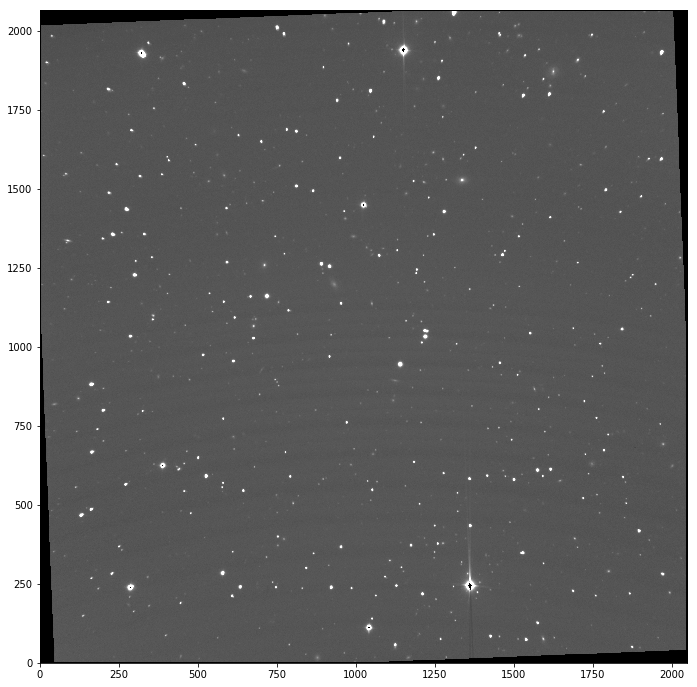

In [4]:
Raw_Datacube.display(Raw_Datacube.raw_stack_field)

In [10]:
Raw_Datacube.save_mask_edge(save_path='/home/qliu/data/A2390F/')

In [5]:
Raw_Datacube.remove_background(save_path='./A2390SE/fig/bkg/', plot=False)

Removing background...Frame: 10
Removing background...Frame: 20
Removing background...Frame: 30
Removing background...Frame: 40
Removing background...Frame: 50
Removing background...Frame: 60


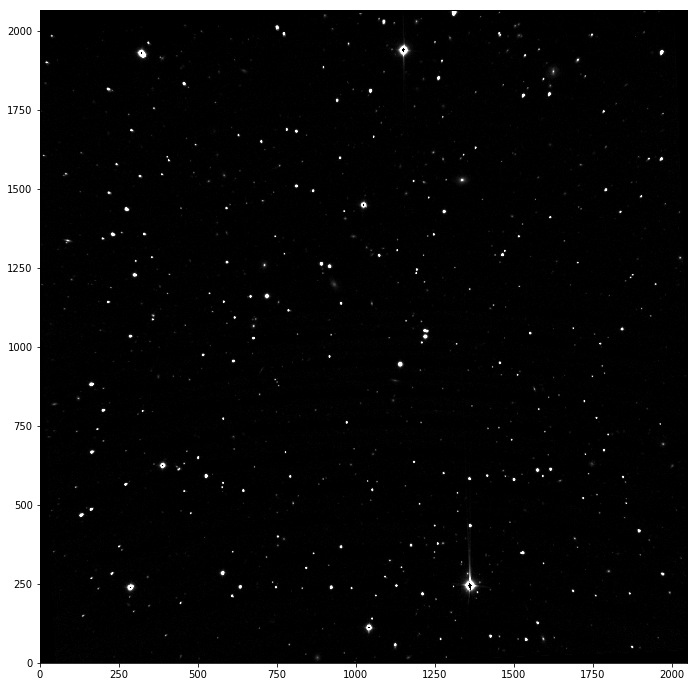

In [6]:
Raw_Datacube.display(Raw_Datacube.stack_field)

In [8]:
Raw_Datacube.wavl.shape

(69,)

In [9]:
Raw_Datacube.remove_fringe(skip_frames=range(7,61), save_path='./A2390SE/fig/fringe/', plot=False)

Removing fringe...Frame: 10
Removing fringe...Frame: 20
Removing fringe...Frame: 30
Removing fringe...Frame: 40
Removing fringe...Frame: 50
Removing fringe...Frame: 60


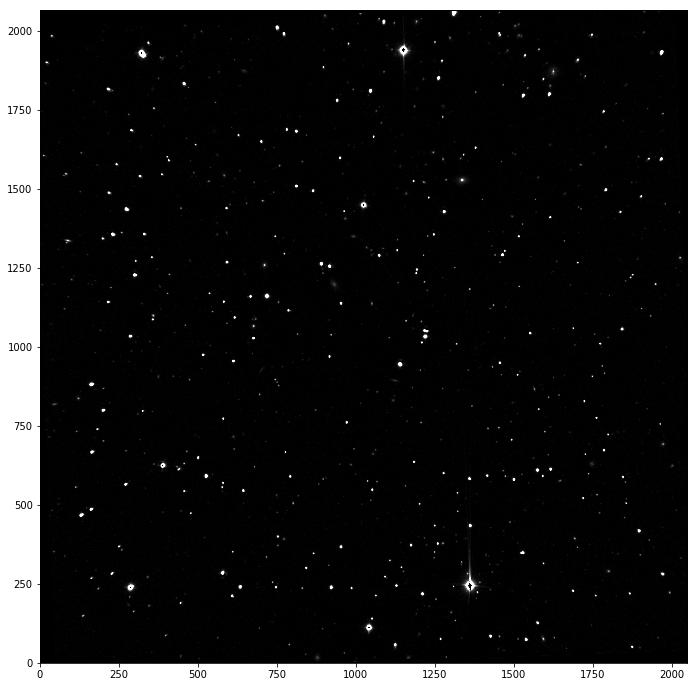

In [17]:
Raw_Datacube.display(Raw_Datacube.stack_field)

In [10]:
Raw_Datacube.save_fits(save_path='/home/qliu/data/A2390F/',suffix="nofringe")

Saving background & fringe subtracted datacube and stacked field...


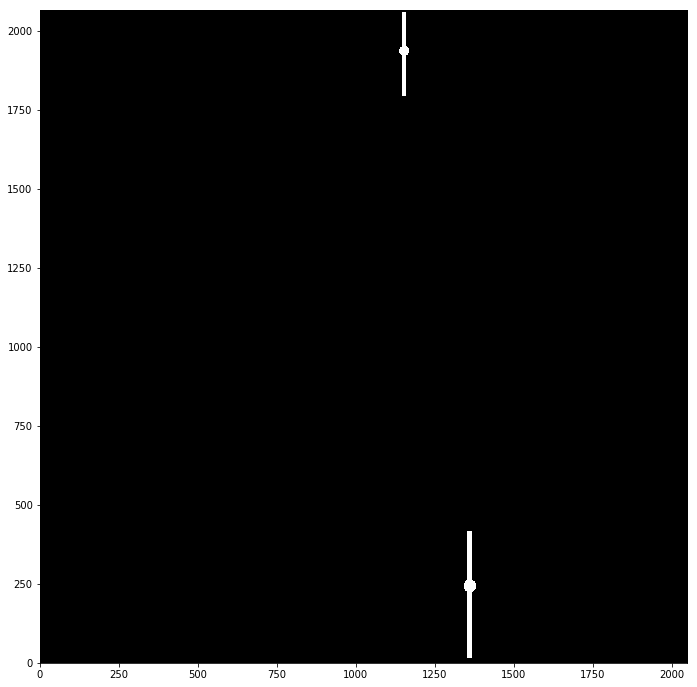

In [23]:
Raw_Datacube.save_weight_map(region_path="./A2390SE/SE/A2390SE.reg", weight=0.01, 
                             save_path = './A2390SE/SE/')
Raw_Datacube.display(Raw_Datacube.mymask,vmax=None)

## 2. Calculate seeing FWHM

In [3]:
Datacube = Read_Datacube("/home/qliu/data/A2390F/A2390SE_cube.fits",name="A2390SE",SE_catalog="./A2390SE/SE/A2390SE_run1.cat")

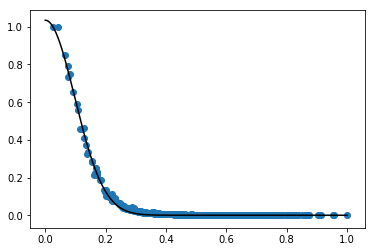

1.1250771032048312


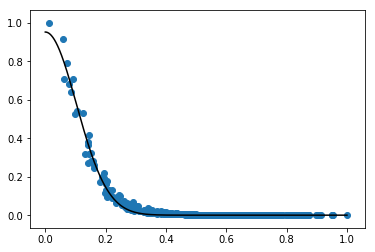

1.159184477587542


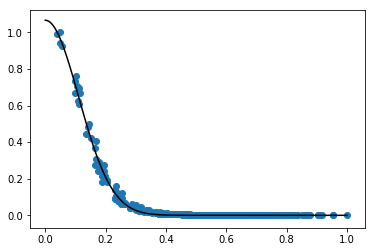

1.245761704099261


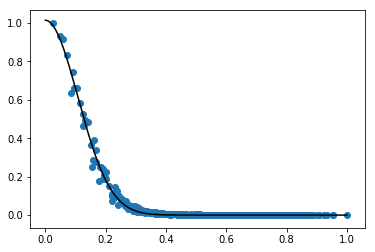

1.1891127645132291


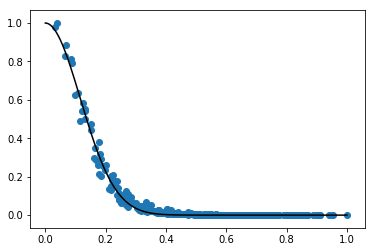

1.2830543244674204


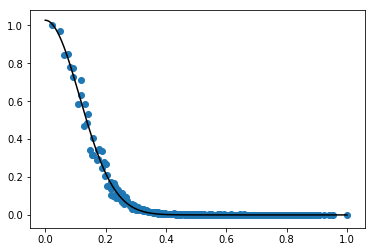

1.2492773885270685


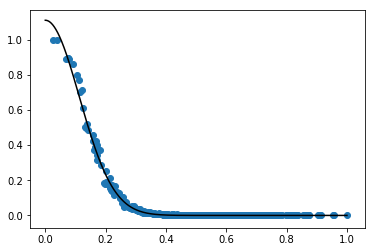

1.306901104105892
Median seeing FWHM in arcsec: 1.246


In [5]:
Datacube.calculate_seeing(mag_cut=0.25, plot=True)

## 3. Spectra Extraction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import SigmaClip
from photutils import Background2D, SExtractorBackground
from pipeline import *
from utils import *
Datacube = Read_Datacube("/home/qliu/data/A2390F/A2390SE_cube.fits",name="A2390SE",SE_catalog="./A2390SE/SE/A2390SE_run2.cat")
Datacube.read_mask('/home/qliu/data/A2390F/Raw_stack_A2390SE_mask.fits')
Datacube.read_seg('./A2390SE/SE/segment_run2.fits')

In [2]:
Datacube.wavl.shape

(69,)

Optimal Aperture: 1.2 Rp, SNR = 16.2067


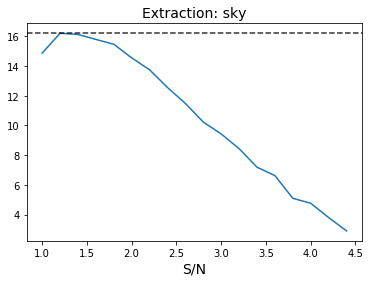

Optimal Aperture: 2.0 Rp, SNR = 6.0087


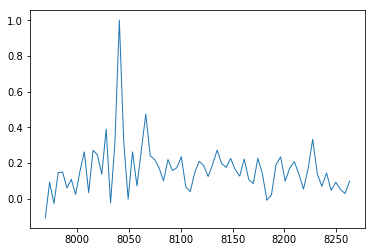

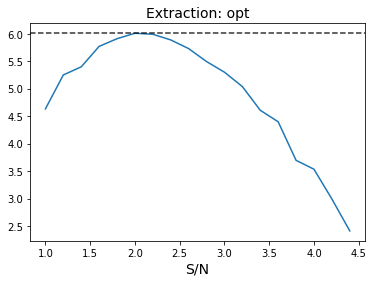

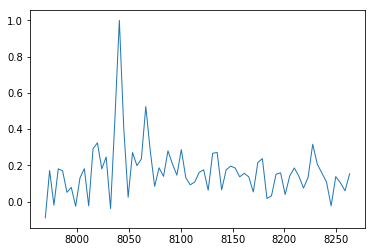

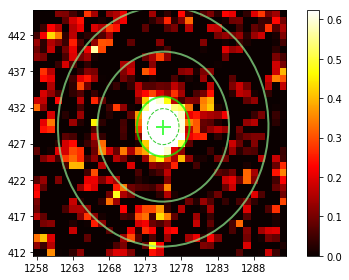

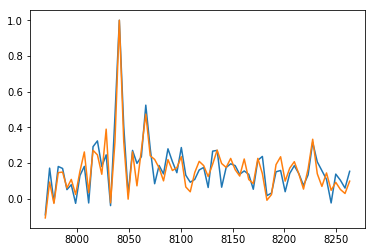

In [9]:
# Example
spec_sky, k_sky, snr_sky, apers_sky = Datacube.spec_extraction(num=438, ext_type='sky', k1=5., k2=8, 
                                                               print_out=True, plot=True, display=False)
spec_opt, k_opt, snr_opt, apers_opt = Datacube.spec_extraction(num=438, ext_type='opt', k1=5., k2=8,
                                                               print_out=True, plot=True, display=True)
apers_sky[0].plot(color='limegreen',ls='--')
plt.show()
plt.plot(Datacube.wavl, spec_opt/spec_opt.max())
plt.plot(Datacube.wavl, spec_sky/spec_sky.max())

Optimal Aperture: 1.4 Rp, SNR = 16.1769


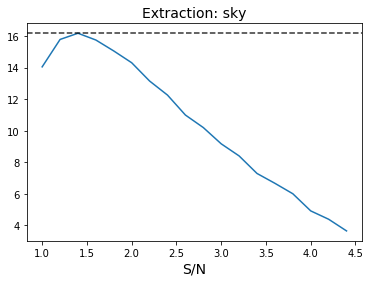

Optimal Aperture: 2.0 Rp, SNR = 5.7200


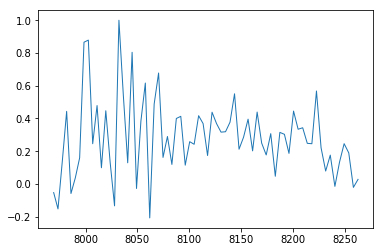

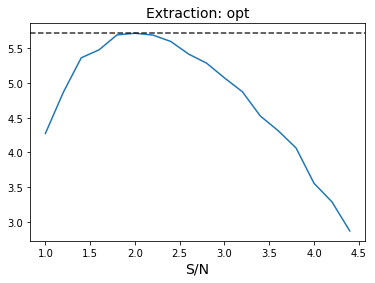

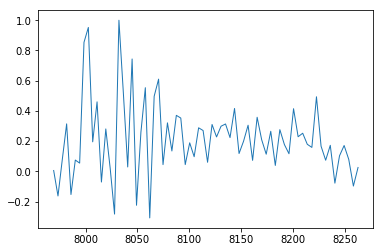

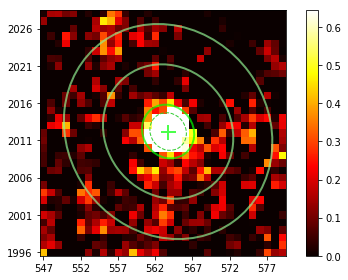

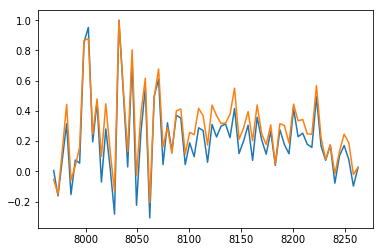

In [10]:
spec_sky, k_sky, snr_sky, apers_sky = Datacube.spec_extraction(num=2136, ext_type='sky', k1=5., k2=8, 
                                                               print_out=True, plot=True, display=False)
spec_opt, k_opt, snr_opt, apers_opt = Datacube.spec_extraction(num=2136, ext_type='opt', k1=5., k2=8,
                                                               print_out=True, plot=True, display=True)
apers_sky[0].plot(color='limegreen',ls='--')
plt.show()
plt.plot(Datacube.wavl, spec_opt/spec_opt.max())
plt.plot(Datacube.wavl, spec_sky/spec_sky.max())

Optimal Aperture: 1.0 Rp, SNR = 262.8639


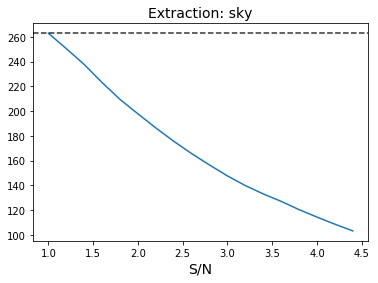

Optimal Aperture: 2.8 Rp, SNR = 42.8801


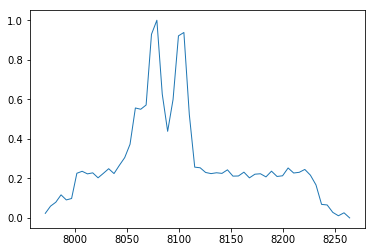

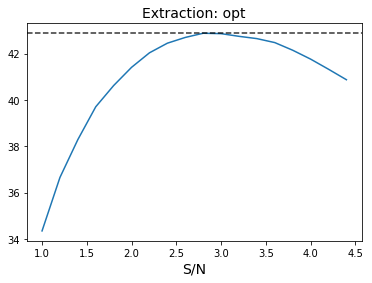

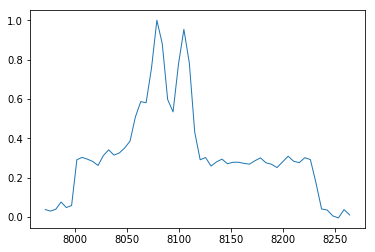

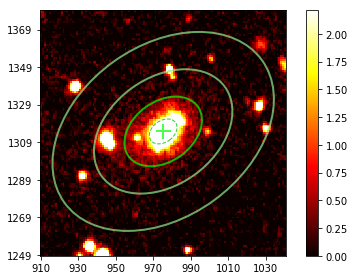

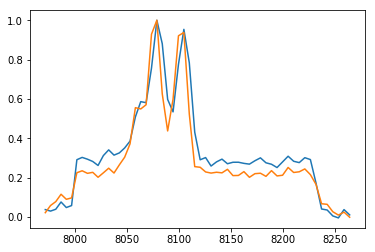

In [28]:
id_BCG = np.argmin((Datacube.Tab_SE["X_IMAGE"]-980)**2 + (Datacube.Tab_SE["Y_IMAGE"]-1315)**2) + 1
spec_sky, k_sky, snr_sky, apers_sky = Datacube.spec_extraction(num=id_BCG, ext_type='sky', k1=5., k2=8, 
                                                               print_out=True, plot=True, display=False)
spec_opt, k_opt, snr_opt, apers_opt = Datacube.spec_extraction(num=id_BCG, ext_type='opt', k1=5., k2=8,
                                                               print_out=True, plot=True, display=True)
apers_sky[0].plot(color='limegreen',ls='--')
plt.show()
plt.plot(Datacube.wavl, spec_opt/spec_opt.max())
plt.plot(Datacube.wavl, spec_sky/spec_sky.max())

2136
Optimal Aperture: 2.0 Rp, SNR = 2.0266


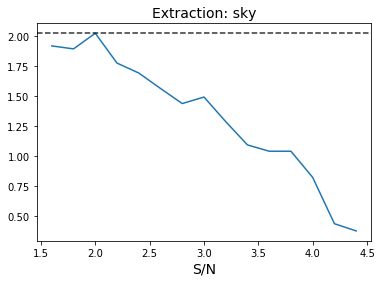

Optimal Aperture: 2.0 Rp, SNR = 1.2603


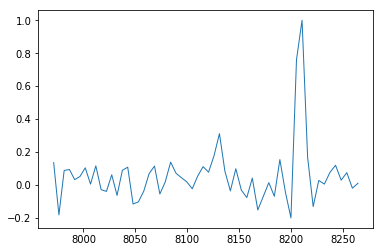

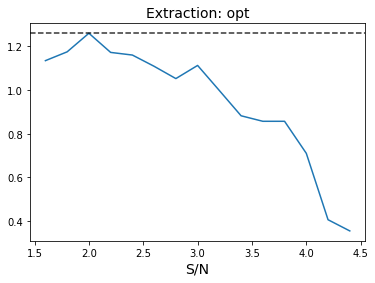

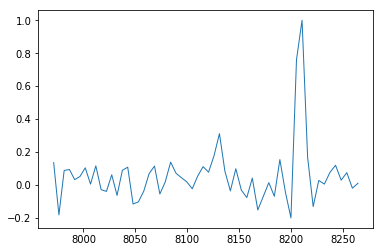

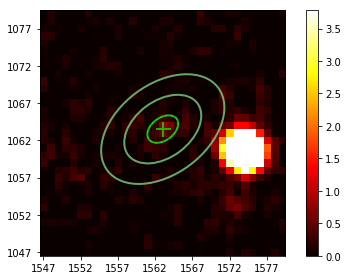

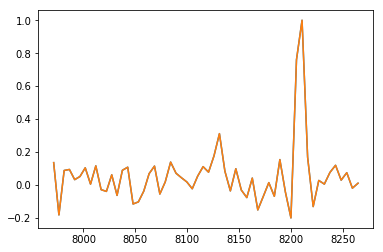

In [6]:
ind = np.argmin((Datacube.Tab_SE["X_IMAGE"]-1564)**2 + (Datacube.Tab_SE["Y_IMAGE"]-1064)**2) + 1
print(ind)
spec_sky, k_sky, snr_sky, apers_sky = Datacube.spec_extraction(num=ind, ext_type='sky', k1=5., k2=8, 
                                                               print_out=True, plot=True, display=False)
spec_opt, k_opt, snr_opt, apers_opt = Datacube.spec_extraction(num=ind, ext_type='opt', k1=5., k2=8,
                                                               print_out=True, plot=True, display=True)
apers_sky[0].plot(color='limegreen',ls='--')
plt.show()
plt.plot(Datacube.wavl, spec_opt/spec_opt.max())
plt.plot(Datacube.wavl, spec_sky/spec_sky.max())

In [2]:
# Pipe
Datacube.spec_extraction_all(ks = np.arange(1.,4.6,0.1), k1=5., k2=8., save_path='./A2390SE/fig/img_thumb/', display=True)

#1 spectra extracted
#2 spectra extracted
#3 spectra extracted
#4 spectra extracted
#5 spectra extracted
#6 spectra extracted
#7 spectra extracted
#8 spectra extracted
#9 spectra extracted
#10 spectra extracted
#11 spectra extracted
#12 spectra extracted
#13 spectra extracted
#14 spectra extracted
#15 spectra extracted
#16 spectra extracted
#17 spectra extracted
#18 spectra extracted
#19 spectra extracted
#20 spectra extracted
#21 spectra extracted
#22 spectra extracted
#23 spectra extracted
#24 spectra extracted
#25 spectra extracted
#26 spectra extracted
#27 spectra extracted
#28 spectra extracted
#29 spectra extracted
#30 spectra extracted
#31 spectra extracted
#32 spectra extracted
#33 spectra extracted
#34 spectra extracted
#35 spectra extracted
#36 spectra extracted
#37 spectra extracted
#38 spectra extracted
#39 spectra extracted
#40 spectra extracted
#41 spectra extracted
#42 spectra extracted
#43 spectra extracted
#44 spectra extracted
#45 spectra extracted
#46 spectra extract

#362 spectra extracted
#363 spectra extracted
#364 spectra extracted
#365 spectra extracted
#366 spectra extracted
#367 spectra extracted
#368 spectra extracted
#369 spectra extracted
#370 spectra extracted
#371 spectra extracted
#372 spectra extracted
#373 spectra extracted
#374 spectra extracted
#375 spectra extracted
#376 spectra extracted
#377 spectra extracted
#378 spectra extracted
#379 spectra extracted
#380 spectra extracted
#381 spectra extracted
#382 spectra extracted
#383 spectra extracted
#384 spectra extracted
#385 spectra extracted
#386 spectra extracted
#387 spectra extracted
#388 spectra extracted
#389 spectra extracted
#390 spectra extracted
#391 spectra extracted
#392 spectra extracted
#393 spectra extracted
#394 spectra extracted
#395 spectra extracted
#396 spectra extracted
#397 spectra extracted
#398 spectra extracted
#399 spectra extracted
#400 spectra extracted
#401 spectra extracted
#402 spectra extracted
#403 spectra extracted
#404 spectra extracted
#405 spectr

#719 spectra extracted
#720 spectra extracted
#721 spectra extracted
#722 spectra extracted
#723 spectra extracted
#724 spectra extracted
#725 spectra extracted
#726 spectra extracted
#727 spectra extracted
#728 spectra extracted
#729 spectra extracted
#730 spectra extracted
#731 spectra extracted
#732 spectra extracted
#733 spectra extracted
#734 spectra extracted
#735 spectra extracted
#736 spectra extracted
#737 spectra extracted
#738 spectra extracted
#739 spectra extracted
#740 spectra extracted
#741 spectra extracted
#742 spectra extracted
#743 spectra extracted
#744 spectra extracted
#745 spectra extracted
#746 spectra extracted
#747 spectra extracted
#748 spectra extracted
#749 spectra extracted
#750 spectra extracted
#751 spectra extracted
#752 spectra extracted
#753 spectra extracted
#754 spectra extracted
#755 spectra extracted
#756 spectra extracted
#757 spectra extracted
#758 spectra extracted
#759 spectra extracted
#760 spectra extracted
#761 spectra extracted
#762 spectr

#1073 spectra extracted
#1074 spectra extracted
#1075 spectra extracted
#1076 spectra extracted
#1077 spectra extracted
#1078 spectra extracted
#1079 spectra extracted
#1080 spectra extracted
#1081 spectra extracted
#1082 spectra extracted
#1083 spectra extracted
#1084 spectra extracted
#1085 spectra extracted
#1086 spectra extracted
#1087 spectra extracted
#1088 spectra extracted
#1089 spectra extracted
#1090 spectra extracted
#1091 spectra extracted
#1092 spectra extracted
#1093 spectra extracted
#1094 spectra extracted
#1095 spectra extracted
#1096 spectra extracted
#1097 spectra extracted
#1098 spectra extracted
#1099 spectra extracted
#1100 spectra extracted
#1101 spectra extracted
#1102 spectra extracted
#1103 spectra extracted
#1104 spectra extracted
#1105 spectra extracted
#1106 spectra extracted
#1107 spectra extracted
#1108 spectra extracted
#1109 spectra extracted
#1110 spectra extracted
#1111 spectra extracted
#1112 spectra extracted
#1113 spectra extracted
#1114 spectra ex

#1415 spectra extracted
#1416 spectra extracted
#1417 spectra extracted
#1418 spectra extracted
#1419 spectra extracted
#1420 spectra extracted
#1421 spectra extracted
#1422 spectra extracted
#1423 spectra extracted
#1424 spectra extracted
#1425 spectra extracted
#1426 spectra extracted
#1427 spectra extracted
#1428 spectra extracted
#1429 spectra extracted
#1430 spectra extracted
#1431 spectra extracted
#1432 spectra extracted
#1433 spectra extracted
#1434 spectra extracted
#1435 spectra extracted
#1436 spectra extracted
#1437 spectra extracted
#1438 spectra extracted
#1439 spectra extracted
#1440 spectra extracted
#1441 spectra extracted
#1442 spectra extracted
#1443 spectra extracted
#1444 spectra extracted
#1445 spectra extracted
#1446 spectra extracted
#1447 spectra extracted
#1448 spectra extracted
#1449 spectra extracted
#1450 spectra extracted
#1451 spectra extracted
#1452 spectra extracted
#1453 spectra extracted
#1454 spectra extracted
#1455 spectra extracted
#1456 spectra ex

#1757 spectra extracted
#1758 spectra extracted
#1759 spectra extracted
#1760 spectra extracted
#1761 spectra extracted
#1762 spectra extracted
#1763 spectra extracted
#1764 spectra extracted
#1765 spectra extracted
#1766 spectra extracted
#1767 spectra extracted
#1768 spectra extracted
#1769 spectra extracted
#1770 spectra extracted
#1771 spectra extracted
#1772 spectra extracted
#1773 spectra extracted
#1774 spectra extracted
#1775 spectra extracted
#1776 spectra extracted
#1777 spectra extracted
#1778 spectra extracted
#1779 spectra extracted
#1780 spectra extracted
#1781 spectra extracted
#1782 spectra extracted
#1783 spectra extracted
#1784 spectra extracted
#1785 spectra extracted
#1786 spectra extracted
#1787 spectra extracted
#1788 spectra extracted
#1789 spectra extracted
#1790 spectra extracted
#1791 spectra extracted
#1792 spectra extracted
#1793 spectra extracted
#1794 spectra extracted
#1795 spectra extracted
#1796 spectra extracted
#1797 spectra extracted
#1798 spectra ex

#2099 spectra extracted
#2100 spectra extracted
#2101 spectra extracted
#2102 spectra extracted
#2103 spectra extracted
#2104 spectra extracted
#2105 spectra extracted
#2106 spectra extracted
#2107 spectra extracted
#2108 spectra extracted
#2109 spectra extracted
#2110 spectra extracted
#2111 spectra extracted
#2112 spectra extracted
#2113 spectra extracted
#2114 spectra extracted
#2115 spectra extracted
#2116 spectra extracted
#2117 spectra extracted
#2118 spectra extracted
#2119 spectra extracted
#2120 spectra extracted
#2121 spectra extracted
#2122 spectra extracted
#2123 spectra extracted
#2124 spectra extracted
#2125 spectra extracted
#2126 spectra extracted
#2127 spectra extracted
#2128 spectra extracted
#2129 spectra extracted
#2130 spectra extracted
#2131 spectra extracted
#2132 spectra extracted
#2133 spectra extracted
#2134 spectra extracted
#2135 spectra extracted
#2136 spectra extracted
#2137 spectra extracted
#2138 spectra extracted
#2139 spectra extracted
#2140 spectra ex

In [3]:
# Pipe
Datacube.fit_continuum_all(model='GP', plot=True, save_path='./A2390SE/fig/fit_cont/')

#1 spectra continuum fitted
#2 spectra continuum fitted
#3 spectra continuum fitted
#4 spectra continuum fitted
#5 spectra continuum fitted
#6 spectra continuum fitted
#7 spectra continuum fitted
#8 spectra continuum fitted
#9 spectra continuum fitted
#10 spectra continuum fitted
#11 spectra continuum fitted
#12 spectra continuum fitted
#13 spectra continuum fitted
#14 spectra continuum fitted
#15 spectra continuum fitted
#16 spectra continuum fitted
#17 spectra continuum fitted
#18 spectra continuum fitted
#19 spectra continuum fitted
#20 spectra continuum fitted
#21 spectra continuum fitted
#22 spectra continuum fitted
#23 spectra continuum fitted
#24 spectra continuum fitted
#25 spectra continuum fitted
#26 spectra continuum fitted
#27 spectra continuum fitted
#28 spectra continuum fitted
#29 spectra continuum fitted
#30 spectra continuum fitted
#31 spectra continuum fitted
#32 spectra continuum fitted
#33 spectra continuum fitted
#34 spectra continuum fitted
#35 spectra continuum f

#279 spectra continuum fitted
#280 spectra continuum fitted
#281 spectra continuum fitted
#282 spectra continuum fitted
#283 spectra continuum fitted
#284 spectra continuum fitted
#285 spectra continuum fitted
#286 spectra continuum fitted
#287 spectra continuum fitted
#288 spectra continuum fitted
#289 spectra continuum fitted
#290 spectra continuum fitted
#291 spectra continuum fitted
#292 spectra continuum fitted
#293 spectra continuum fitted
#294 spectra continuum fitted
#295 spectra continuum fitted
#296 spectra continuum fitted
#297 spectra continuum fitted
#298 spectra continuum fitted
#299 spectra continuum fitted
#300 spectra continuum fitted
#301 spectra continuum fitted
#302 spectra continuum fitted
#303 spectra continuum fitted
#304 spectra continuum fitted
#305 spectra continuum fitted
#306 spectra continuum fitted
#307 spectra continuum fitted
#308 spectra continuum fitted
#309 spectra continuum fitted
#310 spectra continuum fitted
#311 spectra continuum fitted
#312 spect

#554 spectra continuum fitted
#555 spectra continuum fitted
#556 spectra continuum fitted
#557 spectra continuum fitted
#558 spectra continuum fitted
#559 spectra continuum fitted
#560 spectra continuum fitted
#561 spectra continuum fitted
#562 spectra continuum fitted
#563 spectra continuum fitted
#564 spectra continuum fitted
#565 spectra continuum fitted
#566 spectra continuum fitted
#567 spectra continuum fitted
#568 spectra continuum fitted
#569 spectra continuum fitted
#570 spectra continuum fitted
#571 spectra continuum fitted
#572 spectra continuum fitted
#573 spectra continuum fitted
#574 spectra continuum fitted
#575 spectra continuum fitted
#576 spectra continuum fitted
#577 spectra continuum fitted
#578 spectra continuum fitted
#579 spectra continuum fitted
#580 spectra continuum fitted
#581 spectra continuum fitted
#582 spectra continuum fitted
#583 spectra continuum fitted
#584 spectra continuum fitted
#585 spectra continuum fitted
#586 spectra continuum fitted
#587 spect

#828 spectra continuum fitted
#829 spectra continuum fitted
#830 spectra continuum fitted
#831 spectra continuum fitted
#832 spectra continuum fitted
#833 spectra continuum fitted
#834 spectra continuum fitted
#835 spectra continuum fitted
#836 spectra continuum fitted
#837 spectra continuum fitted
#838 spectra continuum fitted
#839 spectra continuum fitted
#840 spectra continuum fitted
#841 spectra continuum fitted
#842 spectra continuum fitted
#843 spectra continuum fitted
#844 spectra continuum fitted
#845 spectra continuum fitted
#846 spectra continuum fitted
#847 spectra continuum fitted
#848 spectra continuum fitted
#849 spectra continuum fitted
#850 spectra continuum fitted
#851 spectra continuum fitted
#852 spectra continuum fitted
#853 spectra continuum fitted
#854 spectra continuum fitted
#855 spectra continuum fitted
#856 spectra continuum fitted
#857 spectra continuum fitted
#858 spectra continuum fitted
#859 spectra continuum fitted
#860 spectra continuum fitted
#861 spect

#1098 spectra continuum fitted
#1099 spectra continuum fitted
#1100 spectra continuum fitted
#1101 spectra continuum fitted
#1102 spectra continuum fitted
#1103 spectra continuum fitted
#1104 spectra continuum fitted
#1105 spectra continuum fitted
#1106 spectra continuum fitted
#1107 spectra continuum fitted
#1108 spectra continuum fitted
#1109 spectra continuum fitted
#1110 spectra continuum fitted
#1111 spectra continuum fitted
#1112 spectra continuum fitted
#1113 spectra continuum fitted
#1114 spectra continuum fitted
#1115 spectra continuum fitted
#1116 spectra continuum fitted
#1117 spectra continuum fitted
#1118 spectra continuum fitted
#1119 spectra continuum fitted
#1120 spectra continuum fitted
#1121 spectra continuum fitted
#1122 spectra continuum fitted
#1123 spectra continuum fitted
#1124 spectra continuum fitted
#1125 spectra continuum fitted
#1126 spectra continuum fitted
#1127 spectra continuum fitted
#1128 spectra continuum fitted
#1129 spectra continuum fitted
#1130 sp

#1363 spectra continuum fitted
#1364 spectra continuum fitted
#1365 spectra continuum fitted
#1366 spectra continuum fitted
#1367 spectra continuum fitted
#1368 spectra continuum fitted
#1369 spectra continuum fitted
#1370 spectra continuum fitted
#1371 spectra continuum fitted
#1372 spectra continuum fitted
#1373 spectra continuum fitted
#1374 spectra continuum fitted
#1375 spectra continuum fitted
#1376 spectra continuum fitted
#1377 spectra continuum fitted
#1378 spectra continuum fitted
#1379 spectra continuum fitted
#1380 spectra continuum fitted
#1381 spectra continuum fitted
#1382 spectra continuum fitted
#1383 spectra continuum fitted
#1384 spectra continuum fitted
#1385 spectra continuum fitted
#1386 spectra continuum fitted
#1387 spectra continuum fitted
#1388 spectra continuum fitted
#1389 spectra continuum fitted
#1390 spectra continuum fitted
#1391 spectra continuum fitted
#1392 spectra continuum fitted
#1393 spectra continuum fitted
#1394 spectra continuum fitted
#1395 sp

#1629 spectra continuum fitted
#1630 spectra continuum fitted
#1631 spectra continuum fitted
#1632 spectra continuum fitted
#1633 spectra continuum fitted
#1634 spectra continuum fitted
#1635 spectra continuum fitted
#1636 spectra continuum fitted
#1637 spectra continuum fitted
#1638 spectra continuum fitted
#1639 spectra continuum fitted
#1640 spectra continuum fitted
#1641 spectra continuum fitted
#1642 spectra continuum fitted
#1643 spectra continuum fitted
#1644 spectra continuum fitted
#1645 spectra continuum fitted
#1646 spectra continuum fitted
#1647 spectra continuum fitted
#1648 spectra continuum fitted
#1649 spectra continuum fitted
#1650 spectra continuum fitted
#1651 spectra continuum fitted
#1652 spectra continuum fitted
#1653 spectra continuum fitted
#1654 spectra continuum fitted
#1655 spectra continuum fitted
#1656 spectra continuum fitted
#1657 spectra continuum fitted
#1658 spectra continuum fitted
#1659 spectra continuum fitted
#1660 spectra continuum fitted
#1661 sp

#1894 spectra continuum fitted
#1895 spectra continuum fitted
#1896 spectra continuum fitted
#1897 spectra continuum fitted
#1898 spectra continuum fitted
#1899 spectra continuum fitted
#1900 spectra continuum fitted
#1901 spectra continuum fitted
#1902 spectra continuum fitted
#1903 spectra continuum fitted
#1904 spectra continuum fitted
#1905 spectra continuum fitted
#1906 spectra continuum fitted
#1907 spectra continuum fitted
#1908 spectra continuum fitted
#1909 spectra continuum fitted
#1910 spectra continuum fitted
#1911 spectra continuum fitted
#1912 spectra continuum fitted
#1913 spectra continuum fitted
#1914 spectra continuum fitted
#1915 spectra continuum fitted
#1916 spectra continuum fitted
#1917 spectra continuum fitted
#1918 spectra continuum fitted
#1919 spectra continuum fitted
#1920 spectra continuum fitted
#1921 spectra continuum fitted
#1922 spectra continuum fitted
#1923 spectra continuum fitted
#1924 spectra continuum fitted
#1925 spectra continuum fitted
#1926 sp

#2159 spectra continuum fitted


In [4]:
Datacube.save_spec_plot(save_path='./A2390SE/fig/spec/')
Datacube.save_spec_fits(save_path='./A2390SE/', suffix="")

## Cross-correlation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import SigmaClip
from photutils import Background2D, SExtractorBackground
from pipeline import *
from utils import *

Datacube = Read_Datacube("/home/qliu/data/A2390F/A2390SE_cube.fits", name="A2390SE", z0=0.228, 
                         SE_catalog="./A2390SE/SE/A2390SE_run2.cat")
Datacube.read_mask('/home/qliu/data/A2390F/Raw_stack_A2390SE_mask.fits')
Datacube.read_seg('./A2390SE/SE/segment_run2.fits')
Datacube.read_spec('./A2390SE/A2390SE-spec.fits')

In [2]:
Datacube.generate_template(n_ratio=20, n_stddev=15, n_intp=2, sigma=4, ratio_range = (1.2, 9),
                           temp_type="Ha-NII", ratio_prior="uniform", temp_model='gauss')
Datacube.generate_template(n_ratio=8, n_stddev=15, n_intp=2, sigma=4, ratio_range = (2., 4.),
                           temp_type="Hb-OIII", ratio_prior="uniform", temp_model='gauss')
Datacube.generate_template(n_ratio=8, n_stddev=15, n_intp=2, sigma=4,
                           temp_type="OII", ratio_prior="uniform", temp_model='gauss')

Template: Ha-NII_gauss  Total Number: 300
Template: Hb-OIII_gauss  Total Number: 120
Template: OII_gauss  Total Number: 15


Best z: 0.23040088428191322 Best sigma: 1.8341303394555193
SE Object #87  z: 0.230  Peak R: 2.520  Detction S/N: 5.752 Peak S/N: 5.869


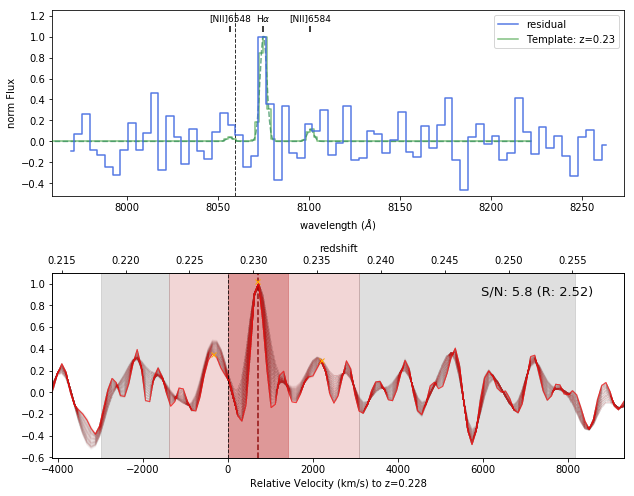

In [16]:
ccs, rv, z_ccs, Rs, SNRs, SNR_ps, Contrast = Datacube.cross_correlation(87, temp_type="Ha-NII", temp_model="gauss")

Best z: 0.23302390852871155 Best sigma: 3.6440643075213535
SE Object #1334  z: 0.233  Peak R: 3.269  Detction S/N: 5.765 Peak S/N: 6.066


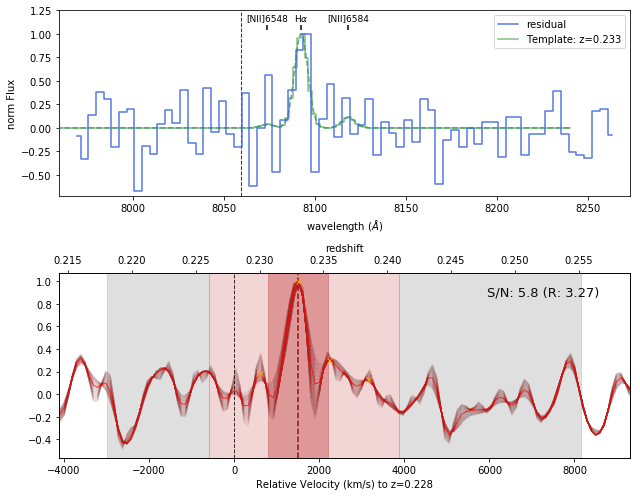

In [18]:
ccs, rv, z_ccs, Rs, SNRs, SNR_ps, Contrast = Datacube.cross_correlation(1334, temp_type="Ha-NII", temp_model="gauss")

Best z: 0.6158422279858297 Best sigma: 3.8703060535295823
SE Object #1334  z: 0.616  Peak R: 1.001  Detction S/N: 7.456 Peak S/N: 7.456


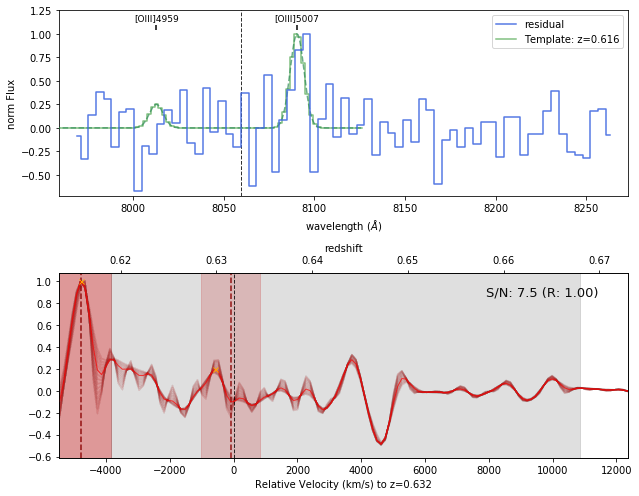

In [3]:
ccs, rv, z_ccs, Rs, SNRs, SNR_ps, Contrast = Datacube.cross_correlation(1334, temp_type="Hb-OIII", temp_model="gauss")

Best z: 0.23007300625106342 Best sigma: 2.286613831471978
SE Object #1922  z: 0.230  Peak R: 4.579  Detction S/N: 5.816 Peak S/N: 6.015


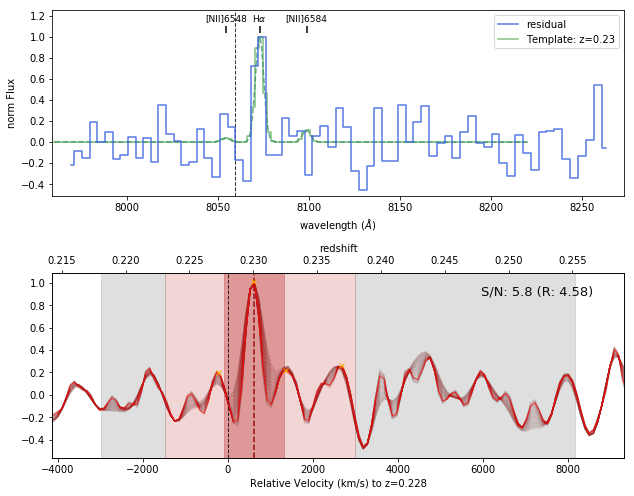

In [19]:
ccs, rv, z_ccs, Rs, SNRs, SNR_ps, Contrast = Datacube.cross_correlation(1922, temp_type="Ha-NII", temp_model="gauss")

Best z: 1.1660770432051861 Best sigma: 1.8341303394555193
SE Object #1922  z: 1.166  Peak R: 1.000  Detction S/N: 5.960 Peak S/N: 5.960


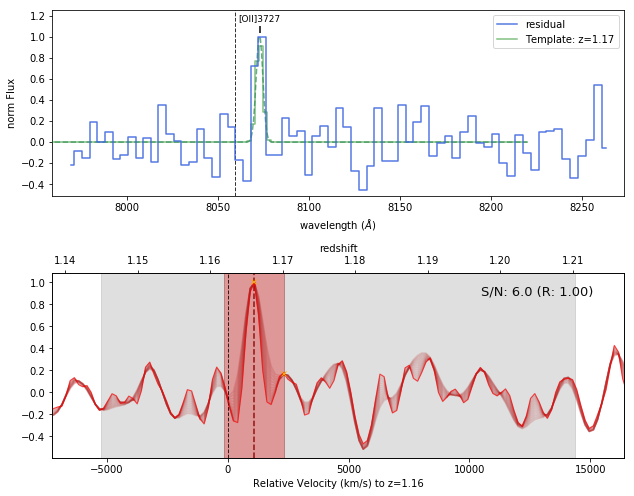

In [21]:
ccs, rv, z_ccs, Rs, SNRs, SNR_ps, Contrast = Datacube.cross_correlation(1922, temp_type="OII", temp_model="gauss")

In [4]:
Datacube.cross_correlation_all(temp_type="Ha-NII", temp_model="gauss")  #new library

SE Object #1  z: 0.249  Peak R: 1.000  Detction S/N: 4.992 Peak S/N: 3.712
SE Object #2  z: 0.249  Peak R: 1.000  Detction S/N: 4.707 Peak S/N: 3.545
SE Object #3  z: 0.218  Peak R: 7.891  Detction S/N: 4.131 Peak S/N: 4.151
SE Object #4  z: 0.222  Peak R: 2.145  Detction S/N: 4.774 Peak S/N: 4.968
SE Object #5  z: 0.221  Peak R: 1.967  Detction S/N: 5.162 Peak S/N: 4.170
SE Object #6  z: 0.220  Peak R: 1.366  Detction S/N: 7.596 Peak S/N: 5.394
SE Object #7  z: 0.221  Peak R: 3.503  Detction S/N: 15.946 Peak S/N: 12.201
SE Object #8  z: 0.234  Peak R: 3.631  Detction S/N: 12.909 Peak S/N: 10.596
SE Object #9  z: 0.223  Peak R: 2.363  Detction S/N: 4.959 Peak S/N: 4.500
SE Object #10  z: 0.227  Peak R: 2.081  Detction S/N: 2.977 Peak S/N: 2.560
SE Object #11  z: 0.229  Peak R: 1.298  Detction S/N: 4.853 Peak S/N: 3.965
SE Object #12  z: 0.228  Peak R: 3.013  Detction S/N: 7.041 Peak S/N: 5.647
SE Object #13  z: 0.220  Peak R: 1.735  Detction S/N: 4.212 Peak S/N: 4.057
SE Object #14  z:

SE Object #110  z: 0.245  Peak R: 8.153  Detction S/N: 2.527 Peak S/N: 2.689
SE Object #111  z: 0.222  Peak R: 2.769  Detction S/N: 4.338 Peak S/N: 4.215
SE Object #112  z: 0.231  Peak R: 1.199  Detction S/N: 2.569 Peak S/N: 2.612
SE Object #113  z: 0.233  Peak R: 3.550  Detction S/N: 7.909 Peak S/N: 8.011
SE Object #114  z: 0.229  Peak R: 3.130  Detction S/N: 22.931 Peak S/N: 12.297
SE Object #115  z: 0.216  Peak R: 8.290  Detction S/N: 3.046 Peak S/N: 3.102
SE Object #116  z: 0.254  Peak R: 9.742  Detction S/N: 2.736 Peak S/N: 2.777
SE Object #117  z: 0.218  Peak R: 1.287  Detction S/N: 1.846 Peak S/N: 1.914
SE Object #118  z: 0.216  Peak R: 8.234  Detction S/N: 4.650 Peak S/N: 4.787
SE Object #119  z: 0.230  Peak R: 1.898  Detction S/N: 2.464 Peak S/N: 2.544
SE Object #120  z: 0.216  Peak R: 7.772  Detction S/N: 2.478 Peak S/N: 2.566
SE Object #121  z: 0.219  Peak R: 2.014  Detction S/N: 2.914 Peak S/N: 3.002
SE Object #122  z: 0.222  Peak R: 6.426  Detction S/N: 3.174 Peak S/N: 2.9

SE Object #217  z: 0.222  Peak R: 1.616  Detction S/N: 5.331 Peak S/N: 4.102
SE Object #218  z: 0.221  Peak R: 1.146  Detction S/N: 6.055 Peak S/N: 3.479
SE Object #219  z: 0.222  Peak R: 5.214  Detction S/N: 6.830 Peak S/N: 7.274
SE Object #220  z: 0.216  Peak R: 4.082  Detction S/N: 7.278 Peak S/N: 7.193
SE Object #221  z: 0.226  Peak R: 2.341  Detction S/N: 3.494 Peak S/N: 3.563
SE Object #222  z: 0.221  Peak R: 5.859  Detction S/N: 2.179 Peak S/N: 2.315
SE Object #223  z: 0.221  Peak R: 6.824  Detction S/N: 4.056 Peak S/N: 4.095
SE Object #224  z: 0.216  Peak R: 8.799  Detction S/N: 4.911 Peak S/N: 4.955
SE Object #225  z: 0.223  Peak R: 1.348  Detction S/N: 3.314 Peak S/N: 3.304
SE Object #226  z: 0.220  Peak R: 3.637  Detction S/N: 3.455 Peak S/N: 3.113
SE Object #227  z: 0.225  Peak R: 2.240  Detction S/N: 3.518 Peak S/N: 3.352
SE Object #228  z: 0.227  Peak R: 1.642  Detction S/N: 2.966 Peak S/N: 2.540
SE Object #229  z: 0.254  Peak R: 5.068  Detction S/N: 2.226 Peak S/N: 2.379

SE Object #324  z: 0.255  Peak R: 9.309  Detction S/N: 2.418 Peak S/N: 2.500
SE Object #325  z: 0.223  Peak R: 5.297  Detction S/N: 14.246 Peak S/N: 12.113
SE Object #326  z: 0.233  Peak R: 1.468  Detction S/N: 2.760 Peak S/N: 2.357
SE Object #327  z: 0.220  Peak R: 1.345  Detction S/N: 7.296 Peak S/N: 4.104
SE Object #328  z: 0.247  Peak R: 2.686  Detction S/N: 4.467 Peak S/N: 4.276
SE Object #329  z: 0.233  Peak R: 2.466  Detction S/N: 4.745 Peak S/N: 3.826
SE Object #330  z: 0.239  Peak R: 1.606  Detction S/N: 3.661 Peak S/N: 2.995
SE Object #331  z: 0.230  Peak R: 1.956  Detction S/N: 2.792 Peak S/N: 2.869
SE Object #332  z: 0.220  Peak R: 3.650  Detction S/N: 2.327 Peak S/N: 2.396
SE Object #333  z: 0.216  Peak R: 1.161  Detction S/N: 3.338 Peak S/N: 3.010
SE Object #334  z: 0.218  Peak R: 1.453  Detction S/N: 2.888 Peak S/N: 2.905
SE Object #335  z: 0.223  Peak R: 1.163  Detction S/N: 4.006 Peak S/N: 3.271
SE Object #336  z: 0.226  Peak R: 1.421  Detction S/N: 2.882 Peak S/N: 2.7

SE Object #431  z: 0.242  Peak R: 3.446  Detction S/N: 5.777 Peak S/N: 4.659
SE Object #432  z: 0.233  Peak R: 8.110  Detction S/N: 3.582 Peak S/N: 3.664
SE Object #433  z: 0.229  Peak R: 1.435  Detction S/N: 3.953 Peak S/N: 3.599
SE Object #434  z: 0.237  Peak R: 7.283  Detction S/N: 2.660 Peak S/N: 2.777
SE Object #435  z: 0.224  Peak R: 2.065  Detction S/N: 2.884 Peak S/N: 2.665
SE Object #436  z: 0.243  Peak R: 1.671  Detction S/N: 2.574 Peak S/N: 2.643
SE Object #437  z: 0.236  Peak R: 6.709  Detction S/N: 3.394 Peak S/N: 3.817
SE Object #438  z: 0.225  Peak R: 2.587  Detction S/N: 14.563 Peak S/N: 8.578
SE Object #439  z: 0.237  Peak R: 5.107  Detction S/N: 3.248 Peak S/N: 3.570
SE Object #440  z: 0.251  Peak R: 5.299  Detction S/N: 5.252 Peak S/N: 5.361
SE Object #441  z: 0.255  Peak R: 4.750  Detction S/N: 2.274 Peak S/N: 2.322
SE Object #442  z: 0.217  Peak R: 1.759  Detction S/N: 2.430 Peak S/N: 2.520
SE Object #443  z: 0.216  Peak R: 1.785  Detction S/N: 3.161 Peak S/N: 3.08

SE Object #538  z: 0.216  Peak R: 9.915  Detction S/N: 3.762 Peak S/N: 3.581
SE Object #539  z: 0.225  Peak R: 2.332  Detction S/N: 2.747 Peak S/N: 2.803
SE Object #540  z: 0.217  Peak R: 2.526  Detction S/N: 7.446 Peak S/N: 7.247
SE Object #541  z: 0.222  Peak R: 1.876  Detction S/N: 1.947 Peak S/N: 2.004
SE Object #542  z: 0.215  Peak R: 2.378  Detction S/N: 4.004 Peak S/N: 4.049
SE Object #543  z: 0.249  Peak R: 2.254  Detction S/N: 4.247 Peak S/N: 4.447
SE Object #544  z: 0.241  Peak R: 2.012  Detction S/N: 2.698 Peak S/N: 2.577
SE Object #545  z: 0.221  Peak R: 1.486  Detction S/N: 4.599 Peak S/N: 4.595
SE Object #546  z: 0.222  Peak R: 2.432  Detction S/N: 10.587 Peak S/N: 7.426
SE Object #547  z: 0.220  Peak R: 1.211  Detction S/N: 3.241 Peak S/N: 3.129
SE Object #548  z: 0.216  Peak R: 2.831  Detction S/N: 3.322 Peak S/N: 3.247
SE Object #549  z: 0.216  Peak R: 2.452  Detction S/N: 3.057 Peak S/N: 3.093
SE Object #550  z: 0.219  Peak R: 1.796  Detction S/N: 4.152 Peak S/N: 4.07

SE Object #645  z: 0.229  Peak R: 5.057  Detction S/N: 3.808 Peak S/N: 3.416
SE Object #646  z: 0.249  Peak R: 1.675  Detction S/N: 2.640 Peak S/N: 2.541
SE Object #647  z: 0.218  Peak R: 1.233  Detction S/N: 3.101 Peak S/N: 2.750
SE Object #648  z: 0.238  Peak R: 3.144  Detction S/N: 2.449 Peak S/N: 2.611
SE Object #649  z: 0.218  Peak R: 1.721  Detction S/N: 2.726 Peak S/N: 2.783
SE Object #650  z: 0.234  Peak R: 1.267  Detction S/N: 13.438 Peak S/N: 7.058
SE Object #651  z: 0.253  Peak R: 7.261  Detction S/N: 2.612 Peak S/N: 2.322
SE Object #652  z: 0.255  Peak R: 1.111  Detction S/N: 3.342 Peak S/N: 3.363
SE Object #653  z: 0.222  Peak R: 3.346  Detction S/N: 2.553 Peak S/N: 2.584
SE Object #654  z: 0.220  Peak R: 1.780  Detction S/N: 4.247 Peak S/N: 4.068
SE Object #655  z: 0.220  Peak R: 2.785  Detction S/N: 22.526 Peak S/N: 13.799
SE Object #656  z: 0.238  Peak R: 2.230  Detction S/N: 2.198 Peak S/N: 2.376
SE Object #657  z: 0.216  Peak R: 6.639  Detction S/N: 2.130 Peak S/N: 2.

SE Object #752  z: 0.218  Peak R: 1.939  Detction S/N: 2.834 Peak S/N: 3.071
SE Object #753  z: 0.233  Peak R: 5.070  Detction S/N: 3.716 Peak S/N: 3.639
SE Object #754  z: 0.238  Peak R: 2.451  Detction S/N: 2.853 Peak S/N: 2.930
SE Object #755  z: 0.218  Peak R: 2.250  Detction S/N: 3.427 Peak S/N: 3.525
SE Object #756  z: 0.220  Peak R: 1.964  Detction S/N: 2.281 Peak S/N: 2.396
SE Object #757  z: 0.239  Peak R: 1.360  Detction S/N: 1.878 Peak S/N: 1.879
SE Object #758  z: 0.219  Peak R: 4.582  Detction S/N: 2.983 Peak S/N: 3.228
SE Object #759  z: 0.220  Peak R: 1.814  Detction S/N: 4.749 Peak S/N: 4.625
SE Object #760  z: 0.218  Peak R: 3.473  Detction S/N: 3.105 Peak S/N: 3.165
SE Object #761  z: 0.234  Peak R: 1.700  Detction S/N: 3.561 Peak S/N: 2.654
SE Object #762  z: 0.257  Peak R: 9.629  Detction S/N: 3.691 Peak S/N: 3.447
SE Object #763  z: 0.241  Peak R: 1.264  Detction S/N: 2.641 Peak S/N: 2.592
SE Object #764  z: 0.233  Peak R: 9.441  Detction S/N: 3.389 Peak S/N: 3.565

SE Object #859  z: 0.224  Peak R: 1.212  Detction S/N: 3.606 Peak S/N: 3.238
SE Object #860  z: 0.224  Peak R: 2.337  Detction S/N: 2.659 Peak S/N: 2.246
SE Object #861  z: 0.219  Peak R: 9.328  Detction S/N: 3.539 Peak S/N: 3.755
SE Object #862  z: 0.220  Peak R: 8.014  Detction S/N: 2.072 Peak S/N: 2.054
SE Object #863  z: 0.216  Peak R: 3.900  Detction S/N: 3.833 Peak S/N: 3.988
SE Object #864  z: 0.218  Peak R: 9.332  Detction S/N: 4.265 Peak S/N: 4.301
SE Object #865  z: 0.219  Peak R: 1.073  Detction S/N: 3.467 Peak S/N: 3.181
SE Object #866  z: 0.222  Peak R: 8.880  Detction S/N: 2.754 Peak S/N: 2.654
SE Object #867  z: 0.245  Peak R: 1.521  Detction S/N: 2.395 Peak S/N: 2.429
SE Object #868  z: 0.234  Peak R: 8.496  Detction S/N: 2.486 Peak S/N: 2.631
SE Object #869  z: 0.238  Peak R: 1.698  Detction S/N: 3.084 Peak S/N: 3.457
SE Object #870  z: 0.231  Peak R: 1.531  Detction S/N: 4.054 Peak S/N: 3.922
SE Object #871  z: 0.220  Peak R: 8.809  Detction S/N: 2.629 Peak S/N: 2.662

SE Object #966  z: 0.246  Peak R: 3.414  Detction S/N: 1.768 Peak S/N: 1.893
SE Object #967  z: 0.221  Peak R: 1.636  Detction S/N: 3.301 Peak S/N: 3.318
SE Object #968  z: 0.218  Peak R: 2.477  Detction S/N: 3.068 Peak S/N: 2.760
SE Object #969  z: 0.236  Peak R: 5.225  Detction S/N: 2.592 Peak S/N: 2.966
SE Object #970  z: 0.216  Peak R: 8.608  Detction S/N: 12.638 Peak S/N: 12.996
SE Object #971  z: 0.216  Peak R: 8.642  Detction S/N: 11.419 Peak S/N: 11.816
SE Object #972  z: 0.218  Peak R: 1.962  Detction S/N: 8.553 Peak S/N: 5.494
SE Object #973  z: 0.221  Peak R: 1.546  Detction S/N: 6.199 Peak S/N: 4.460
SE Object #974  z: 0.216  Peak R: 1.635  Detction S/N: 3.982 Peak S/N: 4.007
SE Object #975  z: 0.218  Peak R: 2.211  Detction S/N: 1.962 Peak S/N: 2.032
SE Object #976  z: 0.218  Peak R: 6.724  Detction S/N: 3.182 Peak S/N: 3.352
SE Object #977  z: 0.216  Peak R: 6.426  Detction S/N: 1.757 Peak S/N: 1.677
SE Object #978  z: 0.220  Peak R: 7.364  Detction S/N: 1.996 Peak S/N: 2

SE Object #1072  z: 0.251  Peak R: 1.358  Detction S/N: 3.055 Peak S/N: 3.095
SE Object #1073  z: 0.224  Peak R: 1.054  Detction S/N: 3.849 Peak S/N: 2.843
SE Object #1074  z: 0.248  Peak R: 2.455  Detction S/N: 3.323 Peak S/N: 2.955
SE Object #1075  z: 0.235  Peak R: 2.249  Detction S/N: 3.567 Peak S/N: 3.611
SE Object #1076  z: 0.224  Peak R: 1.259  Detction S/N: 3.383 Peak S/N: 3.186
SE Object #1077  z: 0.216  Peak R: 8.616  Detction S/N: 12.025 Peak S/N: 10.552
SE Object #1078  z: 0.229  Peak R: 6.411  Detction S/N: 3.181 Peak S/N: 3.061
SE Object #1079  z: 0.229  Peak R: 1.223  Detction S/N: 3.735 Peak S/N: 3.161
SE Object #1080  z: 0.217  Peak R: 1.533  Detction S/N: 4.517 Peak S/N: 4.302
SE Object #1081  z: 0.218  Peak R: 3.211  Detction S/N: 4.561 Peak S/N: 4.371
SE Object #1082  z: 0.220  Peak R: 1.023  Detction S/N: 2.058 Peak S/N: 2.043
SE Object #1083  z: 0.227  Peak R: 1.411  Detction S/N: 2.952 Peak S/N: 2.628
SE Object #1084  z: 0.218  Peak R: 1.690  Detction S/N: 2.929 

SE Object #1177  z: 0.252  Peak R: 3.085  Detction S/N: 4.287 Peak S/N: 4.509
SE Object #1178  z: 0.218  Peak R: 4.339  Detction S/N: 5.836 Peak S/N: 4.611
SE Object #1179  z: 0.251  Peak R: 9.775  Detction S/N: 4.082 Peak S/N: 4.412
SE Object #1180  z: 0.220  Peak R: 2.650  Detction S/N: 2.464 Peak S/N: 2.450
SE Object #1181  z: 0.218  Peak R: 8.918  Detction S/N: 3.345 Peak S/N: 3.362
SE Object #1182  z: 0.219  Peak R: 4.332  Detction S/N: 4.359 Peak S/N: 4.481
SE Object #1183  z: 0.249  Peak R: 4.858  Detction S/N: 7.688 Peak S/N: 7.561
SE Object #1184  z: 0.219  Peak R: 9.012  Detction S/N: 6.101 Peak S/N: 5.878
SE Object #1185  z: 0.255  Peak R: 7.661  Detction S/N: 4.223 Peak S/N: 4.075
SE Object #1186  z: 0.231  Peak R: 2.237  Detction S/N: 2.718 Peak S/N: 2.483
SE Object #1187  z: 0.230  Peak R: 1.158  Detction S/N: 4.748 Peak S/N: 3.011
SE Object #1188  z: 0.252  Peak R: 3.679  Detction S/N: 3.088 Peak S/N: 3.106
SE Object #1189  z: 0.252  Peak R: 5.936  Detction S/N: 2.115 Pe

SE Object #1282  z: 0.239  Peak R: 7.807  Detction S/N: 2.368 Peak S/N: 2.490
SE Object #1283  z: 0.229  Peak R: 2.202  Detction S/N: 3.243 Peak S/N: 3.309
SE Object #1284  z: 0.241  Peak R: 7.662  Detction S/N: 3.090 Peak S/N: 3.455
SE Object #1285  z: 0.216  Peak R: 2.284  Detction S/N: 3.196 Peak S/N: 3.344
SE Object #1286  z: 0.233  Peak R: 1.365  Detction S/N: 4.055 Peak S/N: 4.070
SE Object #1287  z: 0.224  Peak R: 1.643  Detction S/N: 3.403 Peak S/N: 2.624
SE Object #1288  z: 0.219  Peak R: 9.100  Detction S/N: 4.109 Peak S/N: 4.047
SE Object #1289  z: 0.225  Peak R: 2.773  Detction S/N: 3.792 Peak S/N: 4.033
SE Object #1290  z: 0.258  Peak R: 2.511  Detction S/N: 2.489 Peak S/N: 2.501
SE Object #1291  z: 0.238  Peak R: 2.206  Detction S/N: 3.785 Peak S/N: 3.640
SE Object #1292  z: 0.218  Peak R: 1.716  Detction S/N: 3.311 Peak S/N: 3.190
SE Object #1293  z: 0.224  Peak R: 8.716  Detction S/N: 2.112 Peak S/N: 2.222
SE Object #1294  z: 0.252  Peak R: 2.053  Detction S/N: 2.440 Pe

SE Object #1388  z: 0.228  Peak R: 1.048  Detction S/N: 3.616 Peak S/N: 3.532
SE Object #1389  z: 0.251  Peak R: 8.737  Detction S/N: 2.339 Peak S/N: 2.209
SE Object #1390  z: 0.240  Peak R: 9.477  Detction S/N: 2.680 Peak S/N: 2.697
SE Object #1391  z: 0.252  Peak R: 9.044  Detction S/N: 1.880 Peak S/N: 1.677
SE Object #1392  z: 0.238  Peak R: 3.333  Detction S/N: 2.320 Peak S/N: 2.527
SE Object #1393  z: 0.223  Peak R: 1.304  Detction S/N: 2.040 Peak S/N: 2.012
SE Object #1394  z: 0.242  Peak R: 2.553  Detction S/N: 2.872 Peak S/N: 2.793
SE Object #1395  z: 0.230  Peak R: 3.333  Detction S/N: 2.847 Peak S/N: 2.900
SE Object #1396  z: 0.220  Peak R: 8.006  Detction S/N: 2.451 Peak S/N: 2.444
SE Object #1397  z: 0.249  Peak R: 2.702  Detction S/N: 3.939 Peak S/N: 4.038
SE Object #1398  z: 0.231  Peak R: 2.526  Detction S/N: 2.581 Peak S/N: 2.990
SE Object #1399  z: 0.235  Peak R: 1.601  Detction S/N: 3.751 Peak S/N: 3.600
SE Object #1400  z: 0.243  Peak R: 3.833  Detction S/N: 6.074 Pe

SE Object #1494  z: 0.250  Peak R: 2.581  Detction S/N: 2.894 Peak S/N: 3.031
SE Object #1495  z: 0.221  Peak R: 2.571  Detction S/N: 2.237 Peak S/N: 2.240
SE Object #1496  z: 0.227  Peak R: 1.231  Detction S/N: 4.034 Peak S/N: 3.367
SE Object #1497  z: 0.248  Peak R: 1.267  Detction S/N: 2.699 Peak S/N: 2.595
SE Object #1498  z: 0.228  Peak R: 4.124  Detction S/N: 3.414 Peak S/N: 3.652
SE Object #1499  z: 0.222  Peak R: 2.749  Detction S/N: 3.546 Peak S/N: 3.217
SE Object #1500  z: 0.253  Peak R: 3.532  Detction S/N: 4.698 Peak S/N: 4.631
SE Object #1501  z: 0.256  Peak R: 5.810  Detction S/N: 2.750 Peak S/N: 2.905
SE Object #1502  z: 0.216  Peak R: 1.945  Detction S/N: 2.189 Peak S/N: 2.249
SE Object #1503  z: 0.240  Peak R: 8.359  Detction S/N: 2.423 Peak S/N: 2.282
SE Object #1504  z: 0.239  Peak R: 8.263  Detction S/N: 4.123 Peak S/N: 3.711
SE Object #1505  z: 0.220  Peak R: 4.768  Detction S/N: 2.577 Peak S/N: 2.419
SE Object #1506  z: 0.218  Peak R: 9.464  Detction S/N: 12.286 P

SE Object #1599  z: 0.246  Peak R: 9.842  Detction S/N: 3.038 Peak S/N: 3.003
SE Object #1600  z: 0.220  Peak R: 3.314  Detction S/N: 4.472 Peak S/N: 4.404
SE Object #1601  z: 0.242  Peak R: 1.624  Detction S/N: 2.695 Peak S/N: 2.489
SE Object #1602  z: 0.250  Peak R: 4.816  Detction S/N: 27.922 Peak S/N: 19.180
SE Object #1603  z: 0.252  Peak R: 4.901  Detction S/N: 2.288 Peak S/N: 2.464
SE Object #1604  z: 0.244  Peak R: 2.463  Detction S/N: 2.510 Peak S/N: 2.349
SE Object #1605  z: 0.253  Peak R: 8.344  Detction S/N: 2.019 Peak S/N: 2.098
SE Object #1606  z: 0.223  Peak R: 2.625  Detction S/N: 0.987 Peak S/N: 1.097
SE Object #1607  z: 0.224  Peak R: 6.330  Detction S/N: 3.380 Peak S/N: 2.686
SE Object #1608  z: 0.219  Peak R: 3.876  Detction S/N: 2.959 Peak S/N: 2.891
SE Object #1609  z: 0.221  Peak R: 2.499  Detction S/N: 4.999 Peak S/N: 4.702
SE Object #1610  z: 0.230  Peak R: 7.279  Detction S/N: 1.870 Peak S/N: 2.172
SE Object #1611  z: 0.220  Peak R: 1.437  Detction S/N: 2.718 

SE Object #1704  z: 0.247  Peak R: 2.159  Detction S/N: 2.865 Peak S/N: 2.945
SE Object #1705  z: 0.220  Peak R: 2.570  Detction S/N: 5.242 Peak S/N: 4.846
SE Object #1706  z: 0.252  Peak R: 3.556  Detction S/N: 3.387 Peak S/N: 3.561
SE Object #1707  z: 0.222  Peak R: 2.011  Detction S/N: 2.656 Peak S/N: 2.633
SE Object #1708  z: 0.223  Peak R: 4.345  Detction S/N: 8.241 Peak S/N: 8.222
SE Object #1709  z: 0.251  Peak R: 1.304  Detction S/N: 2.159 Peak S/N: 2.174
SE Object #1710  z: 0.220  Peak R: 2.008  Detction S/N: 2.631 Peak S/N: 2.557
SE Object #1711  z: 0.219  Peak R: 1.358  Detction S/N: 2.751 Peak S/N: 2.696
SE Object #1712  z: 0.219  Peak R: 1.876  Detction S/N: 3.521 Peak S/N: 3.671
SE Object #1713  z: 0.222  Peak R: 1.749  Detction S/N: 4.728 Peak S/N: 4.336
SE Object #1714  z: 0.219  Peak R: 8.979  Detction S/N: 2.974 Peak S/N: 2.867
SE Object #1715  z: 0.224  Peak R: 1.242  Detction S/N: 2.957 Peak S/N: 2.649
SE Object #1716  z: 0.228  Peak R: 1.339  Detction S/N: 3.088 Pe

SE Object #1809  z: 0.218  Peak R: 8.954  Detction S/N: 5.649 Peak S/N: 4.845
SE Object #1810  z: 0.222  Peak R: 1.744  Detction S/N: 3.357 Peak S/N: 3.258
SE Object #1811  z: 0.249  Peak R: 2.543  Detction S/N: 2.412 Peak S/N: 2.487
SE Object #1812  z: 0.218  Peak R: 1.304  Detction S/N: 3.530 Peak S/N: 3.368
SE Object #1813  z: 0.242  Peak R: 1.715  Detction S/N: 3.833 Peak S/N: 4.005
SE Object #1814  z: 0.244  Peak R: 2.082  Detction S/N: 4.069 Peak S/N: 3.236
SE Object #1815  z: 0.224  Peak R: 1.818  Detction S/N: 3.229 Peak S/N: 3.429
SE Object #1816  z: 0.220  Peak R: 2.281  Detction S/N: 4.284 Peak S/N: 4.434
SE Object #1817  z: 0.221  Peak R: 3.588  Detction S/N: 4.259 Peak S/N: 3.769
SE Object #1818  z: 0.218  Peak R: 9.073  Detction S/N: 3.581 Peak S/N: 3.075
SE Object #1819  z: 0.226  Peak R: 1.710  Detction S/N: 3.630 Peak S/N: 3.295
SE Object #1820  z: 0.245  Peak R: 7.614  Detction S/N: 2.520 Peak S/N: 2.416
SE Object #1821  z: 0.247  Peak R: 3.514  Detction S/N: 2.745 Pe

SE Object #1914  z: 0.217  Peak R: 8.696  Detction S/N: 2.721 Peak S/N: 2.879
SE Object #1915  z: 0.219  Peak R: 2.268  Detction S/N: 3.615 Peak S/N: 3.767
SE Object #1916  z: 0.229  Peak R: 2.389  Detction S/N: 1.633 Peak S/N: 1.782
SE Object #1917  z: 0.222  Peak R: 2.348  Detction S/N: 3.315 Peak S/N: 3.524
SE Object #1918  z: 0.221  Peak R: 1.382  Detction S/N: 2.902 Peak S/N: 2.491
SE Object #1919  z: 0.219  Peak R: 7.942  Detction S/N: 2.642 Peak S/N: 2.541
SE Object #1920  z: 0.240  Peak R: 1.596  Detction S/N: 2.679 Peak S/N: 2.838
SE Object #1921  z: 0.224  Peak R: 1.453  Detction S/N: 4.119 Peak S/N: 3.991
SE Object #1922  z: 0.230  Peak R: 4.579  Detction S/N: 5.816 Peak S/N: 6.015
SE Object #1923  z: 0.230  Peak R: 1.631  Detction S/N: 3.056 Peak S/N: 2.864
SE Object #1924  z: 0.216  Peak R: 5.228  Detction S/N: 3.438 Peak S/N: 3.530
SE Object #1925  z: 0.222  Peak R: 1.625  Detction S/N: 4.373 Peak S/N: 3.974
SE Object #1926  z: 0.254  Peak R: 6.772  Detction S/N: 3.230 Pe

SE Object #2020  z: 0.246  Peak R: 3.756  Detction S/N: 2.295 Peak S/N: 2.342
SE Object #2021  z: 0.219  Peak R: 7.735  Detction S/N: 7.380 Peak S/N: 5.613
SE Object #2022  z: 0.241  Peak R: 2.474  Detction S/N: 1.576 Peak S/N: 1.728
SE Object #2023  z: 0.222  Peak R: 1.265  Detction S/N: 3.870 Peak S/N: 3.961
SE Object #2024  z: 0.250  Peak R: 1.949  Detction S/N: 2.470 Peak S/N: 2.493
SE Object #2025  z: 0.218  Peak R: 8.517  Detction S/N: 3.116 Peak S/N: 3.131
SE Object #2026  z: 0.218  Peak R: 2.159  Detction S/N: 3.549 Peak S/N: 3.182
SE Object #2027  z: 0.235  Peak R: 1.546  Detction S/N: 2.865 Peak S/N: 2.876
SE Object #2028  z: 0.215  Peak R: 8.725  Detction S/N: 2.511 Peak S/N: 2.614
SE Object #2029  z: 0.230  Peak R: 1.518  Detction S/N: 2.672 Peak S/N: 2.653
SE Object #2030  z: 0.221  Peak R: 1.262  Detction S/N: 4.244 Peak S/N: 3.290
SE Object #2031  z: 0.237  Peak R: 1.000  Detction S/N: 4.044 Peak S/N: 4.381
SE Object #2032  z: 0.218  Peak R: 2.011  Detction S/N: 3.154 Pe

SE Object #2126  z: 0.219  Peak R: 9.820  Detction S/N: 9.649 Peak S/N: 5.787
SE Object #2127  z: 0.218  Peak R: 3.015  Detction S/N: 11.844 Peak S/N: 10.031
SE Object #2128  z: 0.219  Peak R: 1.300  Detction S/N: 8.205 Peak S/N: 5.547
SE Object #2129  z: 0.219  Peak R: 1.367  Detction S/N: 3.529 Peak S/N: 3.753
SE Object #2130  z: 0.227  Peak R: 1.763  Detction S/N: 14.616 Peak S/N: 6.980
SE Object #2131  z: 0.219  Peak R: 6.475  Detction S/N: 12.681 Peak S/N: 5.163
SE Object #2132  z: 0.219  Peak R: 2.316  Detction S/N: 4.842 Peak S/N: 3.843
SE Object #2133  z: 0.224  Peak R: 1.997  Detction S/N: 17.648 Peak S/N: 5.544
SE Object #2134  z: 0.224  Peak R: 1.584  Detction S/N: 2.762 Peak S/N: 2.916
SE Object #2135  z: 0.219  Peak R: 9.246  Detction S/N: 3.766 Peak S/N: 3.788
SE Object #2136  z: 0.219  Peak R: 9.432  Detction S/N: 7.513 Peak S/N: 5.154
SE Object #2137  z: 0.217  Peak R: 1.358  Detction S/N: 3.070 Peak S/N: 2.898
SE Object #2138  z: 0.229  Peak R: 1.628  Detction S/N: 3.8

In [5]:
Datacube.save_cc_fits(save_path='./A2390SE/', suffix="v1")

Saving cross-correlation results for A2390SE using Ha-NII_gauss templates


In [4]:
Datacube.cross_correlation_all(temp_type="Hb-OIII", temp_model="gauss")  #new library

SE Object #1  z: 0.638  Peak R: 1.625  Detction S/N: 3.822 Peak S/N: 3.822
SE Object #2  z: 0.638  Peak R: 1.669  Detction S/N: 3.590 Peak S/N: 3.590
SE Object #3  z: 0.647  Peak R: 1.000  Detction S/N: 4.398 Peak S/N: 4.398
SE Object #4  z: 0.617  Peak R: 1.000  Detction S/N: 9.414 Peak S/N: 9.414
SE Object #5  z: 0.616  Peak R: 1.000  Detction S/N: 4.715 Peak S/N: 4.715
SE Object #6  z: 0.609  Peak R: 1.973  Detction S/N: 4.572 Peak S/N: 4.572
SE Object #7  z: 0.616  Peak R: 1.002  Detction S/N: 5.641 Peak S/N: 5.641
SE Object #8  z: 0.617  Peak R: 1.001  Detction S/N: 13.914 Peak S/N: 13.914
SE Object #9  z: 0.616  Peak R: 1.001  Detction S/N: 8.794 Peak S/N: 8.794
SE Object #10  z: 0.623  Peak R: 1.086  Detction S/N: 3.824 Peak S/N: 3.824
SE Object #11  z: 0.617  Peak R: 1.000  Detction S/N: 7.566 Peak S/N: 7.566
SE Object #12  z: 0.610  Peak R: 7.387  Detction S/N: 9.558 Peak S/N: 9.558
SE Object #13  z: 0.618  Peak R: 1.000  Detction S/N: 3.934 Peak S/N: 3.934
SE Object #14  z: 0

SE Object #110  z: 0.632  Peak R: 2.379  Detction S/N: 4.431 Peak S/N: 4.431
SE Object #111  z: 0.635  Peak R: 1.477  Detction S/N: 4.937 Peak S/N: 4.937
SE Object #112  z: 0.619  Peak R: 1.002  Detction S/N: 2.865 Peak S/N: 2.865
SE Object #113  z: 0.615  Peak R: 1.002  Detction S/N: 14.169 Peak S/N: 14.169
SE Object #114  z: 0.611  Peak R: 1.000  Detction S/N: 19.014 Peak S/N: 19.014
SE Object #115  z: 0.627  Peak R: 1.072  Detction S/N: 2.717 Peak S/N: 2.717
SE Object #116  z: 0.644  Peak R: 1.202  Detction S/N: 4.528 Peak S/N: 4.528
SE Object #117  z: 0.612  Peak R: 1.162  Detction S/N: 2.785 Peak S/N: 2.785
SE Object #118  z: 0.633  Peak R: 5.332  Detction S/N: 3.838 Peak S/N: 3.838
SE Object #119  z: 0.645  Peak R: 1.000  Detction S/N: 1.910 Peak S/N: 1.910
SE Object #120  z: 0.609  Peak R: 1.000  Detction S/N: 2.861 Peak S/N: 2.861
SE Object #121  z: 0.632  Peak R: 2.515  Detction S/N: 5.264 Peak S/N: 5.264
SE Object #122  z: 0.615  Peak R: 1.003  Detction S/N: 3.233 Peak S/N: 3

SE Object #218  z: 0.627  Peak R: 1.245  Detction S/N: 4.087 Peak S/N: 4.087
SE Object #219  z: 0.618  Peak R: 1.001  Detction S/N: 3.791 Peak S/N: 3.791
SE Object #220  z: 0.646  Peak R: 1.002  Detction S/N: 6.336 Peak S/N: 6.336
SE Object #221  z: 0.625  Peak R: 1.364  Detction S/N: 3.193 Peak S/N: 3.193
SE Object #222  z: 0.641  Peak R: 3.294  Detction S/N: 2.814 Peak S/N: 2.814
SE Object #223  z: 0.624  Peak R: 2.168  Detction S/N: 3.469 Peak S/N: 3.469
SE Object #224  z: 0.638  Peak R: 1.213  Detction S/N: 3.094 Peak S/N: 3.094
SE Object #225  z: 0.624  Peak R: 1.220  Detction S/N: 3.374 Peak S/N: 3.374
SE Object #226  z: 0.613  Peak R: 2.048  Detction S/N: 2.161 Peak S/N: 2.161
SE Object #227  z: 0.622  Peak R: 2.238  Detction S/N: 3.598 Peak S/N: 3.598
SE Object #228  z: 0.624  Peak R: 1.149  Detction S/N: 2.973 Peak S/N: 2.973
SE Object #229  z: 0.644  Peak R: 1.347  Detction S/N: 3.568 Peak S/N: 3.568
SE Object #230  z: 0.621  Peak R: 7.316  Detction S/N: 3.430 Peak S/N: 3.430

SE Object #326  z: 0.624  Peak R: 1.081  Detction S/N: 2.261 Peak S/N: 2.261
SE Object #327  z: 0.623  Peak R: 1.304  Detction S/N: 3.735 Peak S/N: 3.735
SE Object #328  z: 0.634  Peak R: 1.950  Detction S/N: 5.780 Peak S/N: 5.780
SE Object #329  z: 0.616  Peak R: 1.001  Detction S/N: 4.943 Peak S/N: 4.943
SE Object #330  z: 0.624  Peak R: 1.553  Detction S/N: 3.916 Peak S/N: 3.916
SE Object #331  z: 0.628  Peak R: 2.111  Detction S/N: 3.310 Peak S/N: 3.310
SE Object #332  z: 0.642  Peak R: 2.151  Detction S/N: 2.954 Peak S/N: 2.954
SE Object #333  z: 0.618  Peak R: 1.000  Detction S/N: 4.919 Peak S/N: 4.919
SE Object #334  z: 0.613  Peak R: 3.495  Detction S/N: 2.663 Peak S/N: 2.663
SE Object #335  z: 0.621  Peak R: 1.430  Detction S/N: 3.907 Peak S/N: 3.907
SE Object #336  z: 0.648  Peak R: 1.000  Detction S/N: 3.158 Peak S/N: 3.158
SE Object #337  z: 0.643  Peak R: 2.057  Detction S/N: 4.453 Peak S/N: 4.453
SE Object #338  z: 0.648  Peak R: 1.000  Detction S/N: 3.037 Peak S/N: 3.037

SE Object #433  z: 0.611  Peak R: 1.505  Detction S/N: 4.171 Peak S/N: 4.171
SE Object #434  z: 0.620  Peak R: 1.445  Detction S/N: 4.059 Peak S/N: 4.059
SE Object #435  z: 0.646  Peak R: 1.001  Detction S/N: 2.998 Peak S/N: 2.998
SE Object #436  z: 0.616  Peak R: 1.001  Detction S/N: 4.020 Peak S/N: 4.020
SE Object #437  z: 0.620  Peak R: 5.587  Detction S/N: 7.303 Peak S/N: 7.303
SE Object #438  z: 0.621  Peak R: 2.188  Detction S/N: 3.103 Peak S/N: 3.103
SE Object #439  z: 0.622  Peak R: 1.291  Detction S/N: 4.191 Peak S/N: 4.191
SE Object #440  z: 0.640  Peak R: 4.955  Detction S/N: 6.609 Peak S/N: 6.609
SE Object #441  z: 0.646  Peak R: 1.006  Detction S/N: 3.357 Peak S/N: 3.357
SE Object #442  z: 0.642  Peak R: 1.108  Detction S/N: 3.039 Peak S/N: 3.039
SE Object #443  z: 0.642  Peak R: 1.060  Detction S/N: 3.830 Peak S/N: 3.830
SE Object #444  z: 0.623  Peak R: 1.798  Detction S/N: 4.260 Peak S/N: 4.260
SE Object #445  z: 0.623  Peak R: 1.189  Detction S/N: 3.559 Peak S/N: 3.559

SE Object #542  z: 0.633  Peak R: 1.534  Detction S/N: 3.882 Peak S/N: 3.882
SE Object #543  z: 0.637  Peak R: 3.059  Detction S/N: 5.314 Peak S/N: 5.314
SE Object #544  z: 0.626  Peak R: 1.765  Detction S/N: 2.504 Peak S/N: 2.504
SE Object #545  z: 0.618  Peak R: 1.000  Detction S/N: 4.233 Peak S/N: 4.233
SE Object #546  z: 0.616  Peak R: 1.001  Detction S/N: 4.628 Peak S/N: 4.628
SE Object #547  z: 0.615  Peak R: 1.000  Detction S/N: 4.892 Peak S/N: 4.892
SE Object #548  z: 0.627  Peak R: 1.526  Detction S/N: 2.187 Peak S/N: 2.187
SE Object #549  z: 0.620  Peak R: 2.511  Detction S/N: 3.227 Peak S/N: 3.227
SE Object #550  z: 0.620  Peak R: 1.415  Detction S/N: 3.403 Peak S/N: 3.403
SE Object #551  z: 0.621  Peak R: 2.124  Detction S/N: 1.128 Peak S/N: 1.128
SE Object #552  z: 0.617  Peak R: 1.000  Detction S/N: 7.562 Peak S/N: 7.562
SE Object #553  z: 0.609  Peak R: 3.225  Detction S/N: 3.496 Peak S/N: 3.496
SE Object #554  z: 0.640  Peak R: 1.136  Detction S/N: 3.681 Peak S/N: 3.681

SE Object #649  z: 0.616  Peak R: 1.002  Detction S/N: 3.252 Peak S/N: 3.252
SE Object #650  z: 0.618  Peak R: 1.000  Detction S/N: 7.952 Peak S/N: 7.952
SE Object #651  z: 0.642  Peak R: 1.244  Detction S/N: 3.127 Peak S/N: 3.127
SE Object #652  z: 0.645  Peak R: 1.002  Detction S/N: 4.606 Peak S/N: 4.606
SE Object #653  z: 0.638  Peak R: 1.724  Detction S/N: 3.758 Peak S/N: 3.758
SE Object #654  z: 0.643  Peak R: 1.578  Detction S/N: 2.493 Peak S/N: 2.493
SE Object #655  z: 0.614  Peak R: 1.001  Detction S/N: 5.567 Peak S/N: 5.567
SE Object #656  z: 0.622  Peak R: 2.814  Detction S/N: 3.017 Peak S/N: 3.017
SE Object #657  z: 0.637  Peak R: 2.347  Detction S/N: 3.173 Peak S/N: 3.173
SE Object #658  z: 0.622  Peak R: 2.007  Detction S/N: 5.444 Peak S/N: 5.444
SE Object #659  z: 0.625  Peak R: 2.063  Detction S/N: 3.095 Peak S/N: 3.095
SE Object #660  z: 0.639  Peak R: 1.269  Detction S/N: 4.402 Peak S/N: 4.402
SE Object #661  z: 0.619  Peak R: 1.060  Detction S/N: 1.715 Peak S/N: 1.715

SE Object #757  z: 0.625  Peak R: 3.461  Detction S/N: 2.140 Peak S/N: 2.140
SE Object #758  z: 0.619  Peak R: 1.005  Detction S/N: 2.841 Peak S/N: 2.841
SE Object #759  z: 0.614  Peak R: 1.004  Detction S/N: 4.133 Peak S/N: 4.133
SE Object #760  z: 0.618  Peak R: 1.002  Detction S/N: 3.454 Peak S/N: 3.454
SE Object #761  z: 0.618  Peak R: 1.000  Detction S/N: 3.823 Peak S/N: 3.823
SE Object #762  z: 0.647  Peak R: 1.003  Detction S/N: 3.802 Peak S/N: 3.802
SE Object #763  z: 0.627  Peak R: 2.121  Detction S/N: 3.813 Peak S/N: 3.813
SE Object #764  z: 0.642  Peak R: 1.146  Detction S/N: 4.941 Peak S/N: 4.941
SE Object #765  z: 0.624  Peak R: 1.674  Detction S/N: 4.005 Peak S/N: 4.005
SE Object #766  z: 0.628  Peak R: 1.461  Detction S/N: 2.201 Peak S/N: 2.201
SE Object #767  z: 0.612  Peak R: 1.742  Detction S/N: 2.985 Peak S/N: 2.985
SE Object #768  z: 0.616  Peak R: 1.000  Detction S/N: 2.845 Peak S/N: 2.845
SE Object #769  z: 0.616  Peak R: 1.001  Detction S/N: 5.351 Peak S/N: 5.351

SE Object #864  z: 0.616  Peak R: 1.002  Detction S/N: 3.705 Peak S/N: 3.705
SE Object #865  z: 0.627  Peak R: 2.218  Detction S/N: 3.131 Peak S/N: 3.131
SE Object #866  z: 0.629  Peak R: 1.436  Detction S/N: 2.974 Peak S/N: 2.974
SE Object #867  z: 0.632  Peak R: 2.019  Detction S/N: 3.816 Peak S/N: 3.816
SE Object #868  z: 0.643  Peak R: 1.101  Detction S/N: 3.187 Peak S/N: 3.187
SE Object #869  z: 0.622  Peak R: 1.671  Detction S/N: 4.262 Peak S/N: 4.262
SE Object #870  z: 0.613  Peak R: 5.684  Detction S/N: 2.758 Peak S/N: 2.758
SE Object #871  z: 0.623  Peak R: 1.923  Detction S/N: 3.668 Peak S/N: 3.668
SE Object #872  z: 0.618  Peak R: 1.000  Detction S/N: 3.937 Peak S/N: 3.937
SE Object #873  z: 0.642  Peak R: 1.298  Detction S/N: 3.735 Peak S/N: 3.735
SE Object #874  z: 0.619  Peak R: 1.004  Detction S/N: 3.682 Peak S/N: 3.682
SE Object #875  z: 0.624  Peak R: 1.806  Detction S/N: 3.549 Peak S/N: 3.549
SE Object #876  z: 0.635  Peak R: 1.319  Detction S/N: 2.169 Peak S/N: 2.169

SE Object #972  z: 0.619  Peak R: 1.001  Detction S/N: 3.701 Peak S/N: 3.701
SE Object #973  z: 0.619  Peak R: 1.002  Detction S/N: 4.822 Peak S/N: 4.822
SE Object #974  z: 0.622  Peak R: 1.561  Detction S/N: 3.521 Peak S/N: 3.521
SE Object #975  z: 0.625  Peak R: 1.243  Detction S/N: 2.518 Peak S/N: 2.518
SE Object #976  z: 0.611  Peak R: 1.621  Detction S/N: 3.668 Peak S/N: 3.668
SE Object #977  z: 0.637  Peak R: 1.857  Detction S/N: 2.714 Peak S/N: 2.714
SE Object #978  z: 0.630  Peak R: 1.451  Detction S/N: 2.751 Peak S/N: 2.751
SE Object #979  z: 0.620  Peak R: 1.642  Detction S/N: 4.803 Peak S/N: 4.803
SE Object #980  z: 0.643  Peak R: 3.028  Detction S/N: 3.708 Peak S/N: 3.708
SE Object #981  z: 0.644  Peak R: 1.207  Detction S/N: 4.713 Peak S/N: 4.713
SE Object #982  z: 0.621  Peak R: 2.003  Detction S/N: 4.576 Peak S/N: 4.576
SE Object #983  z: 0.617  Peak R: 4.104  Detction S/N: 3.967 Peak S/N: 3.967
SE Object #984  z: 0.640  Peak R: 3.170  Detction S/N: 3.417 Peak S/N: 3.417

SE Object #1079  z: 0.611  Peak R: 2.948  Detction S/N: 3.370 Peak S/N: 3.370
SE Object #1080  z: 0.642  Peak R: 2.595  Detction S/N: 4.038 Peak S/N: 4.038
SE Object #1081  z: 0.639  Peak R: 1.121  Detction S/N: 2.625 Peak S/N: 2.625
SE Object #1082  z: 0.638  Peak R: 1.126  Detction S/N: 2.400 Peak S/N: 2.400
SE Object #1083  z: 0.641  Peak R: 3.444  Detction S/N: 2.465 Peak S/N: 2.465
SE Object #1084  z: 0.626  Peak R: 2.345  Detction S/N: 4.087 Peak S/N: 4.087
SE Object #1085  z: 0.627  Peak R: 2.293  Detction S/N: 3.336 Peak S/N: 3.336
SE Object #1086  z: 0.626  Peak R: 1.923  Detction S/N: 2.796 Peak S/N: 2.796
SE Object #1087  z: 0.625  Peak R: 1.957  Detction S/N: 1.124 Peak S/N: 1.124
SE Object #1088  z: 0.621  Peak R: 1.174  Detction S/N: 2.680 Peak S/N: 2.680
SE Object #1089  z: 0.623  Peak R: 1.122  Detction S/N: 5.437 Peak S/N: 5.437
SE Object #1090  z: 0.614  Peak R: 1.000  Detction S/N: 3.940 Peak S/N: 3.940
SE Object #1091  z: 0.623  Peak R: 1.799  Detction S/N: 3.862 Pe

SE Object #1185  z: 0.645  Peak R: 1.002  Detction S/N: 5.774 Peak S/N: 5.774
SE Object #1186  z: 0.629  Peak R: 1.841  Detction S/N: 3.261 Peak S/N: 3.261
SE Object #1187  z: 0.613  Peak R: 3.821  Detction S/N: 4.060 Peak S/N: 4.060
SE Object #1188  z: 0.642  Peak R: 1.855  Detction S/N: 2.733 Peak S/N: 2.733
SE Object #1189  z: 0.641  Peak R: 1.434  Detction S/N: 3.258 Peak S/N: 3.258
SE Object #1190  z: 0.623  Peak R: 1.477  Detction S/N: 3.220 Peak S/N: 3.220
SE Object #1191  z: 0.621  Peak R: 1.671  Detction S/N: 3.251 Peak S/N: 3.251
SE Object #1192  z: 0.627  Peak R: 1.483  Detction S/N: 1.853 Peak S/N: 1.853
SE Object #1193  z: 0.620  Peak R: 1.146  Detction S/N: 4.165 Peak S/N: 4.165
SE Object #1194  z: 0.612  Peak R: 1.000  Detction S/N: 5.289 Peak S/N: 5.289
SE Object #1195  z: 0.613  Peak R: 2.447  Detction S/N: 3.857 Peak S/N: 3.857
SE Object #1196  z: 0.620  Peak R: 1.893  Detction S/N: 2.045 Peak S/N: 2.045
SE Object #1197  z: 0.615  Peak R: 1.005  Detction S/N: 4.012 Pe

SE Object #1290  z: 0.649  Peak R: 1.005  Detction S/N: 3.514 Peak S/N: 3.514
SE Object #1291  z: 0.622  Peak R: 2.410  Detction S/N: 6.867 Peak S/N: 6.867
SE Object #1292  z: 0.622  Peak R: 1.623  Detction S/N: 4.980 Peak S/N: 4.980
SE Object #1293  z: 0.626  Peak R: 1.024  Detction S/N: 3.568 Peak S/N: 3.568
SE Object #1294  z: 0.641  Peak R: 2.173  Detction S/N: 3.806 Peak S/N: 3.806
SE Object #1295  z: 0.640  Peak R: 1.254  Detction S/N: 3.702 Peak S/N: 3.702
SE Object #1296  z: 0.618  Peak R: 1.000  Detction S/N: 4.078 Peak S/N: 4.078
SE Object #1297  z: 0.642  Peak R: 3.213  Detction S/N: 5.101 Peak S/N: 5.101
SE Object #1298  z: 0.647  Peak R: 1.006  Detction S/N: 4.076 Peak S/N: 4.076
SE Object #1299  z: 0.618  Peak R: 1.000  Detction S/N: 4.190 Peak S/N: 4.190
SE Object #1300  z: 0.639  Peak R: 1.296  Detction S/N: 4.318 Peak S/N: 4.318
SE Object #1301  z: 0.640  Peak R: 1.308  Detction S/N: 3.936 Peak S/N: 3.936
SE Object #1302  z: 0.631  Peak R: 1.241  Detction S/N: 3.047 Pe

SE Object #1397  z: 0.637  Peak R: 2.130  Detction S/N: 3.630 Peak S/N: 3.630
SE Object #1398  z: 0.638  Peak R: 1.142  Detction S/N: 2.998 Peak S/N: 2.998
SE Object #1399  z: 0.619  Peak R: 1.004  Detction S/N: 3.671 Peak S/N: 3.671
SE Object #1400  z: 0.628  Peak R: 2.117  Detction S/N: 8.612 Peak S/N: 8.612
SE Object #1401  z: 0.615  Peak R: 1.074  Detction S/N: 2.210 Peak S/N: 2.210
SE Object #1402  z: 0.642  Peak R: 1.633  Detction S/N: 3.685 Peak S/N: 3.685
SE Object #1403  z: 0.638  Peak R: 1.526  Detction S/N: 2.998 Peak S/N: 2.998
SE Object #1404  z: 0.608  Peak R: 1.789  Detction S/N: 5.049 Peak S/N: 5.049
SE Object #1405  z: 0.641  Peak R: 1.347  Detction S/N: 3.334 Peak S/N: 3.334
SE Object #1406  z: 0.639  Peak R: 1.518  Detction S/N: 3.582 Peak S/N: 3.582
SE Object #1407  z: 0.640  Peak R: 1.149  Detction S/N: 2.954 Peak S/N: 2.954
SE Object #1408  z: 0.642  Peak R: 8.714  Detction S/N: 3.305 Peak S/N: 3.305
SE Object #1409  z: 0.643  Peak R: 1.846  Detction S/N: 3.306 Pe

SE Object #1503  z: 0.625  Peak R: 2.242  Detction S/N: 3.041 Peak S/N: 3.041
SE Object #1504  z: 0.623  Peak R: 1.424  Detction S/N: 4.496 Peak S/N: 4.496
SE Object #1505  z: 0.629  Peak R: 1.410  Detction S/N: 2.952 Peak S/N: 2.952
SE Object #1506  z: 0.618  Peak R: 1.000  Detction S/N: 9.613 Peak S/N: 9.613
SE Object #1507  z: 0.625  Peak R: 1.468  Detction S/N: 3.769 Peak S/N: 3.769
SE Object #1508  z: 0.623  Peak R: 1.743  Detction S/N: 3.571 Peak S/N: 3.571
SE Object #1509  z: 0.617  Peak R: 1.000  Detction S/N: 6.627 Peak S/N: 6.627
SE Object #1510  z: 0.629  Peak R: 3.528  Detction S/N: 4.592 Peak S/N: 4.592
SE Object #1511  z: 0.621  Peak R: 1.132  Detction S/N: 2.667 Peak S/N: 2.667
SE Object #1512  z: 0.625  Peak R: 1.794  Detction S/N: 3.154 Peak S/N: 3.154
SE Object #1513  z: 0.630  Peak R: 2.407  Detction S/N: 3.538 Peak S/N: 3.538
SE Object #1514  z: 0.628  Peak R: 1.660  Detction S/N: 1.476 Peak S/N: 1.476
SE Object #1515  z: 0.624  Peak R: 1.748  Detction S/N: 4.344 Pe

SE Object #1609  z: 0.626  Peak R: 1.983  Detction S/N: 7.077 Peak S/N: 7.077
SE Object #1610  z: 0.625  Peak R: 2.219  Detction S/N: 2.233 Peak S/N: 2.233
SE Object #1611  z: 0.630  Peak R: 1.404  Detction S/N: 4.067 Peak S/N: 4.067
SE Object #1612  z: 0.646  Peak R: 1.001  Detction S/N: 5.134 Peak S/N: 5.134
SE Object #1613  z: 0.620  Peak R: 1.160  Detction S/N: 9.962 Peak S/N: 9.962
SE Object #1614  z: 0.616  Peak R: 1.001  Detction S/N: 2.903 Peak S/N: 2.903
SE Object #1615  z: 0.628  Peak R: 1.108  Detction S/N: 4.075 Peak S/N: 4.075
SE Object #1616  z: 0.628  Peak R: 3.770  Detction S/N: 4.877 Peak S/N: 4.877
SE Object #1617  z: 0.620  Peak R: 1.407  Detction S/N: 5.328 Peak S/N: 5.328
SE Object #1618  z: 0.635  Peak R: 1.181  Detction S/N: 3.913 Peak S/N: 3.913
SE Object #1619  z: 0.617  Peak R: 1.000  Detction S/N: 3.776 Peak S/N: 3.776
SE Object #1620  z: 0.622  Peak R: 7.740  Detction S/N: 2.709 Peak S/N: 2.709
SE Object #1621  z: 0.634  Peak R: 1.191  Detction S/N: 2.857 Pe

SE Object #1715  z: 0.640  Peak R: 1.441  Detction S/N: 3.438 Peak S/N: 3.438
SE Object #1716  z: 0.625  Peak R: 1.048  Detction S/N: 2.808 Peak S/N: 2.808
SE Object #1717  z: 0.607  Peak R: 7.293  Detction S/N: 3.221 Peak S/N: 3.221
SE Object #1718  z: 0.612  Peak R: 1.948  Detction S/N: 3.277 Peak S/N: 3.277
SE Object #1719  z: 0.615  Peak R: 1.004  Detction S/N: 2.388 Peak S/N: 2.388
SE Object #1720  z: 0.621  Peak R: 1.187  Detction S/N: 2.986 Peak S/N: 2.986
SE Object #1721  z: 0.632  Peak R: 1.555  Detction S/N: 3.856 Peak S/N: 3.856
SE Object #1722  z: 0.631  Peak R: 1.411  Detction S/N: 2.431 Peak S/N: 2.431
SE Object #1723  z: 0.629  Peak R: 3.120  Detction S/N: 2.668 Peak S/N: 2.668
SE Object #1724  z: 0.636  Peak R: 1.164  Detction S/N: 3.751 Peak S/N: 3.751
SE Object #1725  z: 0.625  Peak R: 1.074  Detction S/N: 4.012 Peak S/N: 4.012
SE Object #1726  z: 0.640  Peak R: 3.526  Detction S/N: 4.273 Peak S/N: 4.273
SE Object #1727  z: 0.614  Peak R: 1.003  Detction S/N: 5.118 Pe

SE Object #1820  z: 0.632  Peak R: 2.178  Detction S/N: 2.524 Peak S/N: 2.524
SE Object #1821  z: 0.635  Peak R: 2.931  Detction S/N: 4.737 Peak S/N: 4.737
SE Object #1822  z: 0.631  Peak R: 2.475  Detction S/N: 3.841 Peak S/N: 3.841
SE Object #1823  z: 0.624  Peak R: 1.534  Detction S/N: 3.232 Peak S/N: 3.232
SE Object #1824  z: 0.635  Peak R: 3.040  Detction S/N: 2.841 Peak S/N: 2.841
SE Object #1825  z: 0.611  Peak R: 2.770  Detction S/N: 4.512 Peak S/N: 4.512
SE Object #1826  z: 0.646  Peak R: 1.001  Detction S/N: 3.920 Peak S/N: 3.920
SE Object #1827  z: 0.610  Peak R: 1.742  Detction S/N: 2.353 Peak S/N: 2.353
SE Object #1828  z: 0.642  Peak R: 3.299  Detction S/N: 3.309 Peak S/N: 3.309
SE Object #1829  z: 0.635  Peak R: 2.484  Detction S/N: 3.222 Peak S/N: 3.222
SE Object #1830  z: 0.621  Peak R: 1.680  Detction S/N: 2.888 Peak S/N: 2.888
SE Object #1831  z: 0.620  Peak R: 2.139  Detction S/N: 5.364 Peak S/N: 5.364
SE Object #1832  z: 0.622  Peak R: 1.414  Detction S/N: 7.788 Pe

SE Object #1927  z: 0.640  Peak R: 6.325  Detction S/N: 3.469 Peak S/N: 3.469
SE Object #1928  z: 0.620  Peak R: 1.076  Detction S/N: 3.117 Peak S/N: 3.117
SE Object #1929  z: 0.621  Peak R: 2.134  Detction S/N: 3.497 Peak S/N: 3.497
SE Object #1930  z: 0.629  Peak R: 4.602  Detction S/N: 5.761 Peak S/N: 5.761
SE Object #1931  z: 0.628  Peak R: 2.802  Detction S/N: 3.368 Peak S/N: 3.368
SE Object #1932  z: 0.620  Peak R: 2.343  Detction S/N: 3.486 Peak S/N: 3.486
SE Object #1933  z: 0.612  Peak R: 6.034  Detction S/N: 4.533 Peak S/N: 4.533
SE Object #1934  z: 0.624  Peak R: 1.573  Detction S/N: 4.121 Peak S/N: 4.121
SE Object #1935  z: 0.641  Peak R: 3.025  Detction S/N: 1.991 Peak S/N: 1.991
SE Object #1936  z: 0.641  Peak R: 2.286  Detction S/N: 3.645 Peak S/N: 3.645
SE Object #1937  z: 0.614  Peak R: 1.002  Detction S/N: 4.192 Peak S/N: 4.192
SE Object #1938  z: 0.623  Peak R: 1.147  Detction S/N: 3.923 Peak S/N: 3.923
SE Object #1939  z: 0.618  Peak R: 1.000  Detction S/N: 5.242 Pe

SE Object #2033  z: 0.642  Peak R: 1.545  Detction S/N: 4.662 Peak S/N: 4.662
SE Object #2034  z: 0.627  Peak R: 4.628  Detction S/N: 3.745 Peak S/N: 3.745
SE Object #2035  z: 0.613  Peak R: 1.378  Detction S/N: 4.288 Peak S/N: 4.288
SE Object #2036  z: 0.615  Peak R: 1.001  Detction S/N: 3.751 Peak S/N: 3.751
SE Object #2037  z: 0.644  Peak R: 1.172  Detction S/N: 3.194 Peak S/N: 3.194
SE Object #2038  z: 0.649  Peak R: 1.007  Detction S/N: 3.457 Peak S/N: 3.457
SE Object #2039  z: 0.636  Peak R: 1.273  Detction S/N: 2.505 Peak S/N: 2.505
SE Object #2040  z: 0.626  Peak R: 1.917  Detction S/N: 5.508 Peak S/N: 5.508
SE Object #2041  z: 0.627  Peak R: 5.467  Detction S/N: 2.683 Peak S/N: 2.683
SE Object #2042  z: 0.640  Peak R: 2.236  Detction S/N: 4.395 Peak S/N: 4.395
SE Object #2043  z: 0.621  Peak R: 1.431  Detction S/N: 5.409 Peak S/N: 5.409
SE Object #2044  z: 0.621  Peak R: 1.863  Detction S/N: 4.711 Peak S/N: 4.711
SE Object #2045  z: 0.615  Peak R: 1.002  Detction S/N: 4.281 Pe

SE Object #2139  z: 0.612  Peak R: 3.554  Detction S/N: 4.700 Peak S/N: 4.700
SE Object #2140  z: 0.630  Peak R: 1.416  Detction S/N: 2.855 Peak S/N: 2.855
SE Object #2141  z: 0.634  Peak R: 1.352  Detction S/N: 3.085 Peak S/N: 3.085
SE Object #2142  z: 0.612  Peak R: 1.942  Detction S/N: 5.407 Peak S/N: 5.407
SE Object #2143  z: 0.613  Peak R: 1.506  Detction S/N: 4.484 Peak S/N: 4.484
SE Object #2144  z: 0.611  Peak R: 2.227  Detction S/N: 6.071 Peak S/N: 6.071
SE Object #2145  z: 0.627  Peak R: 1.154  Detction S/N: 3.829 Peak S/N: 3.829
SE Object #2146  z: 0.620  Peak R: 2.810  Detction S/N: 7.181 Peak S/N: 7.181
SE Object #2147  z: 0.612  Peak R: 3.742  Detction S/N: 6.489 Peak S/N: 6.489
SE Object #2148  z: 0.628  Peak R: 1.823  Detction S/N: 2.763 Peak S/N: 2.763
SE Object #2149  z: 0.643  Peak R: 1.293  Detction S/N: 3.242 Peak S/N: 3.242
SE Object #2150  z: 0.637  Peak R: 1.838  Detction S/N: 4.043 Peak S/N: 4.043
SE Object #2151  z: 0.612  Peak R: 1.000  Detction S/N: 6.952 Pe

In [5]:
Datacube.save_cc_fits(save_path='./A2390SE/', suffix="v1")

Saving cross-correlation results for A2390SE using Hb-OIII_gauss templates


In [8]:
Datacube.cross_correlation_all(temp_type="OII", temp_model="gauss")  #new library

SE Object #1  z: 1.200  Peak R: 1.000  Detction S/N: 4.041 Peak S/N: 4.041
SE Object #2  z: 1.200  Peak R: 1.000  Detction S/N: 3.843 Peak S/N: 3.843
SE Object #3  z: 1.145  Peak R: 1.000  Detction S/N: 4.842 Peak S/N: 4.842
SE Object #4  z: 1.153  Peak R: 1.000  Detction S/N: 4.879 Peak S/N: 4.879
SE Object #5  z: 1.151  Peak R: 1.000  Detction S/N: 4.340 Peak S/N: 4.340
SE Object #6  z: 1.149  Peak R: 1.000  Detction S/N: 6.135 Peak S/N: 6.135
SE Object #7  z: 1.150  Peak R: 1.000  Detction S/N: 15.476 Peak S/N: 15.476
SE Object #8  z: 1.172  Peak R: 1.000  Detction S/N: 13.501 Peak S/N: 13.501
SE Object #9  z: 1.153  Peak R: 1.000  Detction S/N: 4.245 Peak S/N: 4.245
SE Object #10  z: 1.160  Peak R: 1.000  Detction S/N: 2.506 Peak S/N: 2.506
SE Object #11  z: 1.165  Peak R: 1.000  Detction S/N: 3.704 Peak S/N: 3.704
SE Object #12  z: 1.163  Peak R: 1.000  Detction S/N: 5.609 Peak S/N: 5.609
SE Object #13  z: 1.149  Peak R: 1.000  Detction S/N: 4.227 Peak S/N: 4.227
SE Object #14  z:

SE Object #129  z: 1.150  Peak R: 1.000  Detction S/N: 4.664 Peak S/N: 4.664
SE Object #130  z: 1.149  Peak R: 1.000  Detction S/N: 2.145 Peak S/N: 2.145
SE Object #131  z: 1.159  Peak R: 1.000  Detction S/N: 2.704 Peak S/N: 2.704
SE Object #132  z: 1.154  Peak R: 1.000  Detction S/N: 3.563 Peak S/N: 3.563
SE Object #133  z: 1.151  Peak R: 1.000  Detction S/N: 4.775 Peak S/N: 4.775
SE Object #134  z: 1.141  Peak R: 1.000  Detction S/N: 3.924 Peak S/N: 3.924
SE Object #135  z: 1.149  Peak R: 1.000  Detction S/N: 4.300 Peak S/N: 4.300
SE Object #136  z: 1.179  Peak R: 1.000  Detction S/N: 3.045 Peak S/N: 3.045
SE Object #137  z: 1.141  Peak R: 1.000  Detction S/N: 3.868 Peak S/N: 3.868
SE Object #138  z: 1.204  Peak R: 1.000  Detction S/N: 3.604 Peak S/N: 3.604
SE Object #139  z: 1.145  Peak R: 1.000  Detction S/N: 4.420 Peak S/N: 4.420
SE Object #140  z: 1.162  Peak R: 1.000  Detction S/N: 2.453 Peak S/N: 2.453
SE Object #141  z: 1.146  Peak R: 1.000  Detction S/N: 2.645 Peak S/N: 2.645

SE Object #260  z: 1.168  Peak R: 1.000  Detction S/N: 6.778 Peak S/N: 6.778
SE Object #261  z: 1.182  Peak R: 1.000  Detction S/N: 2.821 Peak S/N: 2.821
SE Object #262  z: 1.151  Peak R: 1.000  Detction S/N: 2.932 Peak S/N: 2.932
SE Object #263  z: 1.162  Peak R: 1.000  Detction S/N: 3.186 Peak S/N: 3.186
SE Object #264  z: 1.141  Peak R: 1.000  Detction S/N: 3.337 Peak S/N: 3.337
SE Object #265  z: 1.212  Peak R: 1.000  Detction S/N: 3.986 Peak S/N: 3.986
SE Object #266  z: 1.179  Peak R: 1.000  Detction S/N: 3.812 Peak S/N: 3.812
SE Object #267  z: 1.167  Peak R: 1.000  Detction S/N: 3.949 Peak S/N: 3.949
SE Object #268  z: 1.179  Peak R: 1.000  Detction S/N: 2.686 Peak S/N: 2.686
SE Object #269  z: 1.142  Peak R: 1.000  Detction S/N: 3.516 Peak S/N: 3.516
SE Object #270  z: 1.141  Peak R: 1.000  Detction S/N: 6.395 Peak S/N: 6.395
SE Object #271  z: 1.189  Peak R: 1.000  Detction S/N: 3.769 Peak S/N: 3.769
SE Object #272  z: 1.149  Peak R: 1.000  Detction S/N: 2.742 Peak S/N: 2.742

SE Object #369  z: 1.184  Peak R: 1.000  Detction S/N: 3.324 Peak S/N: 3.324
SE Object #370  z: 1.160  Peak R: 1.000  Detction S/N: 3.743 Peak S/N: 3.743
SE Object #371  z: 1.160  Peak R: 1.000  Detction S/N: 5.390 Peak S/N: 5.390
SE Object #372  z: 1.145  Peak R: 1.000  Detction S/N: 3.003 Peak S/N: 3.003
SE Object #373  z: 1.159  Peak R: 1.000  Detction S/N: 2.546 Peak S/N: 2.546
SE Object #374  z: 1.141  Peak R: 1.000  Detction S/N: 3.411 Peak S/N: 3.411
SE Object #375  z: 1.148  Peak R: 1.000  Detction S/N: 2.798 Peak S/N: 2.798
SE Object #376  z: 1.148  Peak R: 1.000  Detction S/N: 2.809 Peak S/N: 2.809
SE Object #377  z: 1.182  Peak R: 1.000  Detction S/N: 3.810 Peak S/N: 3.810
SE Object #378  z: 1.165  Peak R: 1.000  Detction S/N: 18.290 Peak S/N: 18.290
SE Object #379  z: 1.209  Peak R: 1.000  Detction S/N: 2.568 Peak S/N: 2.568
SE Object #380  z: 1.163  Peak R: 1.000  Detction S/N: 2.225 Peak S/N: 2.225
SE Object #381  z: 1.148  Peak R: 1.000  Detction S/N: 5.496 Peak S/N: 5.4

SE Object #485  z: 1.141  Peak R: 1.000  Detction S/N: 7.989 Peak S/N: 7.989
SE Object #486  z: 1.141  Peak R: 1.000  Detction S/N: 4.497 Peak S/N: 4.497
SE Object #487  z: 1.148  Peak R: 1.000  Detction S/N: 4.305 Peak S/N: 4.305
SE Object #488  z: 1.142  Peak R: 1.000  Detction S/N: 11.396 Peak S/N: 11.396
SE Object #489  z: 1.148  Peak R: 1.000  Detction S/N: 2.781 Peak S/N: 2.781
SE Object #490  z: 1.149  Peak R: 1.000  Detction S/N: 3.938 Peak S/N: 3.938
SE Object #491  z: 1.211  Peak R: 1.000  Detction S/N: 4.134 Peak S/N: 4.134
SE Object #492  z: 1.149  Peak R: 1.000  Detction S/N: 3.152 Peak S/N: 3.152
SE Object #493  z: 1.166  Peak R: 1.000  Detction S/N: 2.762 Peak S/N: 2.762
SE Object #494  z: 1.159  Peak R: 1.000  Detction S/N: 2.540 Peak S/N: 2.540
SE Object #495  z: 1.143  Peak R: 1.000  Detction S/N: 7.421 Peak S/N: 7.421
SE Object #496  z: 1.214  Peak R: 1.000  Detction S/N: 3.118 Peak S/N: 3.118
SE Object #497  z: 1.147  Peak R: 1.000  Detction S/N: 3.879 Peak S/N: 3.8

SE Object #602  z: 1.161  Peak R: 1.000  Detction S/N: 3.236 Peak S/N: 3.236
SE Object #603  z: 1.148  Peak R: 1.000  Detction S/N: 4.885 Peak S/N: 4.885
SE Object #604  z: 1.197  Peak R: 1.000  Detction S/N: 2.613 Peak S/N: 2.613
SE Object #605  z: 1.153  Peak R: 1.000  Detction S/N: 2.512 Peak S/N: 2.512
SE Object #606  z: 1.146  Peak R: 1.000  Detction S/N: 3.952 Peak S/N: 3.952
SE Object #607  z: 1.205  Peak R: 1.000  Detction S/N: 2.910 Peak S/N: 2.910
SE Object #608  z: 1.188  Peak R: 1.000  Detction S/N: 5.063 Peak S/N: 5.063
SE Object #609  z: 1.165  Peak R: 1.000  Detction S/N: 3.063 Peak S/N: 3.063
SE Object #610  z: 1.167  Peak R: 1.000  Detction S/N: 2.305 Peak S/N: 2.305
SE Object #611  z: 1.150  Peak R: 1.000  Detction S/N: 2.675 Peak S/N: 2.675
SE Object #612  z: 1.157  Peak R: 1.000  Detction S/N: 3.200 Peak S/N: 3.200
SE Object #613  z: 1.146  Peak R: 1.000  Detction S/N: 3.050 Peak S/N: 3.050
SE Object #614  z: 1.141  Peak R: 1.000  Detction S/N: 3.885 Peak S/N: 3.885

SE Object #729  z: 1.141  Peak R: 1.000  Detction S/N: 3.129 Peak S/N: 3.129
SE Object #730  z: 1.141  Peak R: 1.000  Detction S/N: 7.397 Peak S/N: 7.397
SE Object #731  z: 1.184  Peak R: 1.000  Detction S/N: 2.542 Peak S/N: 2.542
SE Object #732  z: 1.212  Peak R: 1.000  Detction S/N: 3.216 Peak S/N: 3.216
SE Object #733  z: 1.165  Peak R: 1.000  Detction S/N: 3.475 Peak S/N: 3.475
SE Object #734  z: 1.163  Peak R: 1.000  Detction S/N: 3.126 Peak S/N: 3.126
SE Object #735  z: 1.141  Peak R: 1.000  Detction S/N: 4.603 Peak S/N: 4.603
SE Object #736  z: 1.160  Peak R: 1.000  Detction S/N: 3.277 Peak S/N: 3.277
SE Object #737  z: 1.164  Peak R: 1.000  Detction S/N: 3.744 Peak S/N: 3.744
SE Object #738  z: 1.141  Peak R: 1.000  Detction S/N: 3.180 Peak S/N: 3.180
SE Object #739  z: 1.138  Peak R: 1.000  Detction S/N: 3.019 Peak S/N: 3.019
SE Object #740  z: 1.148  Peak R: 1.000  Detction S/N: 4.238 Peak S/N: 4.238
SE Object #741  z: 1.142  Peak R: 1.000  Detction S/N: 6.636 Peak S/N: 6.636

SE Object #853  z: 1.145  Peak R: 1.000  Detction S/N: 3.758 Peak S/N: 3.758
SE Object #854  z: 1.141  Peak R: 1.000  Detction S/N: 3.463 Peak S/N: 3.463
SE Object #855  z: 1.181  Peak R: 1.000  Detction S/N: 2.940 Peak S/N: 2.940
SE Object #856  z: 1.157  Peak R: 1.000  Detction S/N: 3.277 Peak S/N: 3.277
SE Object #857  z: 1.181  Peak R: 1.000  Detction S/N: 1.902 Peak S/N: 1.902
SE Object #858  z: 1.164  Peak R: 1.000  Detction S/N: 3.809 Peak S/N: 3.809
SE Object #859  z: 1.156  Peak R: 1.000  Detction S/N: 3.039 Peak S/N: 3.039
SE Object #860  z: 1.166  Peak R: 1.000  Detction S/N: 2.631 Peak S/N: 2.631
SE Object #861  z: 1.147  Peak R: 1.000  Detction S/N: 3.910 Peak S/N: 3.910
SE Object #862  z: 1.148  Peak R: 1.000  Detction S/N: 2.381 Peak S/N: 2.381
SE Object #863  z: 1.142  Peak R: 1.000  Detction S/N: 3.868 Peak S/N: 3.868
SE Object #864  z: 1.145  Peak R: 1.000  Detction S/N: 4.593 Peak S/N: 4.593
SE Object #865  z: 1.147  Peak R: 1.000  Detction S/N: 3.540 Peak S/N: 3.540

SE Object #973  z: 1.150  Peak R: 1.000  Detction S/N: 6.004 Peak S/N: 6.004
SE Object #974  z: 1.142  Peak R: 1.000  Detction S/N: 4.020 Peak S/N: 4.020
SE Object #975  z: 1.145  Peak R: 1.000  Detction S/N: 2.656 Peak S/N: 2.656
SE Object #976  z: 1.145  Peak R: 1.000  Detction S/N: 3.396 Peak S/N: 3.396
SE Object #977  z: 1.158  Peak R: 1.000  Detction S/N: 2.317 Peak S/N: 2.317
SE Object #978  z: 1.148  Peak R: 1.000  Detction S/N: 2.442 Peak S/N: 2.442
SE Object #979  z: 1.177  Peak R: 1.000  Detction S/N: 2.802 Peak S/N: 2.802
SE Object #980  z: 1.142  Peak R: 1.000  Detction S/N: 6.466 Peak S/N: 6.466
SE Object #981  z: 1.208  Peak R: 1.000  Detction S/N: 3.289 Peak S/N: 3.289
SE Object #982  z: 1.158  Peak R: 1.000  Detction S/N: 4.885 Peak S/N: 4.885
SE Object #983  z: 1.173  Peak R: 1.000  Detction S/N: 3.652 Peak S/N: 3.652
SE Object #984  z: 1.203  Peak R: 1.000  Detction S/N: 2.680 Peak S/N: 2.680
SE Object #985  z: 1.149  Peak R: 1.000  Detction S/N: 3.585 Peak S/N: 3.585

SE Object #1080  z: 1.144  Peak R: 1.000  Detction S/N: 4.508 Peak S/N: 4.508
SE Object #1081  z: 1.144  Peak R: 1.000  Detction S/N: 4.056 Peak S/N: 4.056
SE Object #1082  z: 1.201  Peak R: 1.000  Detction S/N: 2.403 Peak S/N: 2.403
SE Object #1083  z: 1.160  Peak R: 1.000  Detction S/N: 3.413 Peak S/N: 3.413
SE Object #1084  z: 1.186  Peak R: 1.000  Detction S/N: 2.972 Peak S/N: 2.972
SE Object #1085  z: 1.186  Peak R: 1.000  Detction S/N: 3.615 Peak S/N: 3.615
SE Object #1086  z: 1.153  Peak R: 1.000  Detction S/N: 2.717 Peak S/N: 2.717
SE Object #1087  z: 1.152  Peak R: 1.000  Detction S/N: 2.402 Peak S/N: 2.402
SE Object #1088  z: 1.166  Peak R: 1.000  Detction S/N: 2.631 Peak S/N: 2.631
SE Object #1089  z: 1.181  Peak R: 1.000  Detction S/N: 3.091 Peak S/N: 3.091
SE Object #1090  z: 1.168  Peak R: 1.000  Detction S/N: 3.591 Peak S/N: 3.591
SE Object #1091  z: 1.181  Peak R: 1.000  Detction S/N: 2.987 Peak S/N: 2.987
SE Object #1092  z: 1.152  Peak R: 1.000  Detction S/N: 4.543 Pe

SE Object #1196  z: 1.149  Peak R: 1.000  Detction S/N: 2.723 Peak S/N: 2.723
SE Object #1197  z: 1.147  Peak R: 1.000  Detction S/N: 2.502 Peak S/N: 2.502
SE Object #1198  z: 1.187  Peak R: 1.000  Detction S/N: 2.375 Peak S/N: 2.375
SE Object #1199  z: 1.164  Peak R: 1.000  Detction S/N: 3.031 Peak S/N: 3.031
SE Object #1200  z: 1.174  Peak R: 1.000  Detction S/N: 3.898 Peak S/N: 3.898
SE Object #1201  z: 1.202  Peak R: 1.000  Detction S/N: 2.581 Peak S/N: 2.581
SE Object #1202  z: 1.147  Peak R: 1.000  Detction S/N: 3.016 Peak S/N: 3.016
SE Object #1203  z: 1.145  Peak R: 1.000  Detction S/N: 8.170 Peak S/N: 8.170
SE Object #1204  z: 1.146  Peak R: 1.000  Detction S/N: 3.428 Peak S/N: 3.428
SE Object #1205  z: 1.155  Peak R: 1.000  Detction S/N: 5.374 Peak S/N: 5.374
SE Object #1206  z: 1.166  Peak R: 1.000  Detction S/N: 2.334 Peak S/N: 2.334
SE Object #1207  z: 1.145  Peak R: 1.000  Detction S/N: 3.640 Peak S/N: 3.640
SE Object #1208  z: 1.146  Peak R: 1.000  Detction S/N: 4.928 Pe

SE Object #1312  z: 1.206  Peak R: 1.000  Detction S/N: 3.328 Peak S/N: 3.328
SE Object #1313  z: 1.162  Peak R: 1.000  Detction S/N: 4.844 Peak S/N: 4.844
SE Object #1314  z: 1.205  Peak R: 1.000  Detction S/N: 4.219 Peak S/N: 4.219
SE Object #1315  z: 1.194  Peak R: 1.000  Detction S/N: 2.679 Peak S/N: 2.679
SE Object #1316  z: 1.152  Peak R: 1.000  Detction S/N: 2.614 Peak S/N: 2.614
SE Object #1317  z: 1.144  Peak R: 1.000  Detction S/N: 3.905 Peak S/N: 3.905
SE Object #1318  z: 1.161  Peak R: 1.000  Detction S/N: 2.423 Peak S/N: 2.423
SE Object #1319  z: 1.173  Peak R: 1.000  Detction S/N: 2.915 Peak S/N: 2.915
SE Object #1320  z: 1.147  Peak R: 1.000  Detction S/N: 3.643 Peak S/N: 3.643
SE Object #1321  z: 1.185  Peak R: 1.000  Detction S/N: 3.222 Peak S/N: 3.222
SE Object #1322  z: 1.188  Peak R: 1.000  Detction S/N: 5.104 Peak S/N: 5.104
SE Object #1323  z: 1.178  Peak R: 1.000  Detction S/N: 2.517 Peak S/N: 2.517
SE Object #1324  z: 1.172  Peak R: 1.000  Detction S/N: 3.980 Pe

SE Object #1427  z: 1.160  Peak R: 1.000  Detction S/N: 2.297 Peak S/N: 2.297
SE Object #1428  z: 1.178  Peak R: 1.000  Detction S/N: 2.320 Peak S/N: 2.320
SE Object #1429  z: 1.171  Peak R: 1.000  Detction S/N: 2.799 Peak S/N: 2.799
SE Object #1430  z: 1.182  Peak R: 1.000  Detction S/N: 3.003 Peak S/N: 3.003
SE Object #1431  z: 1.208  Peak R: 1.000  Detction S/N: 4.594 Peak S/N: 4.594
SE Object #1432  z: 1.183  Peak R: 1.000  Detction S/N: 3.668 Peak S/N: 3.668
SE Object #1433  z: 1.188  Peak R: 1.000  Detction S/N: 2.166 Peak S/N: 2.166
SE Object #1434  z: 1.159  Peak R: 1.000  Detction S/N: 3.250 Peak S/N: 3.250
SE Object #1435  z: 1.190  Peak R: 1.000  Detction S/N: 2.955 Peak S/N: 2.955
SE Object #1436  z: 1.163  Peak R: 1.000  Detction S/N: 2.076 Peak S/N: 2.076
SE Object #1437  z: 1.201  Peak R: 1.000  Detction S/N: 3.456 Peak S/N: 3.456
SE Object #1438  z: 1.152  Peak R: 1.000  Detction S/N: 3.419 Peak S/N: 3.419
SE Object #1439  z: 1.175  Peak R: 1.000  Detction S/N: 3.056 Pe

SE Object #1536  z: 1.201  Peak R: 1.000  Detction S/N: 2.710 Peak S/N: 2.710
SE Object #1537  z: 1.159  Peak R: 1.000  Detction S/N: 37.492 Peak S/N: 37.492
SE Object #1538  z: 1.203  Peak R: 1.000  Detction S/N: 3.112 Peak S/N: 3.112
SE Object #1539  z: 1.205  Peak R: 1.000  Detction S/N: 4.247 Peak S/N: 4.247
SE Object #1540  z: 1.214  Peak R: 1.000  Detction S/N: 3.007 Peak S/N: 3.007
SE Object #1541  z: 1.168  Peak R: 1.000  Detction S/N: 2.807 Peak S/N: 2.807
SE Object #1542  z: 1.148  Peak R: 1.000  Detction S/N: 3.120 Peak S/N: 3.120
SE Object #1543  z: 1.148  Peak R: 1.000  Detction S/N: 2.913 Peak S/N: 2.913
SE Object #1544  z: 1.168  Peak R: 1.000  Detction S/N: 2.925 Peak S/N: 2.925
SE Object #1545  z: 1.160  Peak R: 1.000  Detction S/N: 4.644 Peak S/N: 4.644
SE Object #1546  z: 1.160  Peak R: 1.000  Detction S/N: 2.900 Peak S/N: 2.900
SE Object #1547  z: 1.213  Peak R: 1.000  Detction S/N: 4.971 Peak S/N: 4.971
SE Object #1548  z: 1.183  Peak R: 1.000  Detction S/N: 3.722 

SE Object #1647  z: 1.179  Peak R: 1.000  Detction S/N: 2.645 Peak S/N: 2.645
SE Object #1648  z: 1.205  Peak R: 1.000  Detction S/N: 2.880 Peak S/N: 2.880
SE Object #1649  z: 1.209  Peak R: 1.000  Detction S/N: 2.615 Peak S/N: 2.615
SE Object #1650  z: 1.179  Peak R: 1.000  Detction S/N: 3.643 Peak S/N: 3.643
SE Object #1651  z: 1.155  Peak R: 1.000  Detction S/N: 2.966 Peak S/N: 2.966
SE Object #1652  z: 1.146  Peak R: 1.000  Detction S/N: 5.956 Peak S/N: 5.956
SE Object #1653  z: 1.180  Peak R: 1.000  Detction S/N: 2.068 Peak S/N: 2.068
SE Object #1654  z: 1.142  Peak R: 1.000  Detction S/N: 3.850 Peak S/N: 3.850
SE Object #1655  z: 1.200  Peak R: 1.000  Detction S/N: 3.414 Peak S/N: 3.414
SE Object #1656  z: 1.205  Peak R: 1.000  Detction S/N: 2.259 Peak S/N: 2.259
SE Object #1657  z: 1.209  Peak R: 1.000  Detction S/N: 2.970 Peak S/N: 2.970
SE Object #1658  z: 1.164  Peak R: 1.000  Detction S/N: 3.984 Peak S/N: 3.984
SE Object #1659  z: 1.152  Peak R: 1.000  Detction S/N: 3.131 Pe

SE Object #1753  z: 1.180  Peak R: 1.000  Detction S/N: 4.504 Peak S/N: 4.504
SE Object #1754  z: 1.168  Peak R: 1.000  Detction S/N: 2.191 Peak S/N: 2.191
SE Object #1755  z: 1.216  Peak R: 1.000  Detction S/N: 2.236 Peak S/N: 2.236
SE Object #1756  z: 1.155  Peak R: 1.000  Detction S/N: 2.782 Peak S/N: 2.782
SE Object #1757  z: 1.148  Peak R: 1.000  Detction S/N: 2.685 Peak S/N: 2.685
SE Object #1758  z: 1.187  Peak R: 1.000  Detction S/N: 2.060 Peak S/N: 2.060
SE Object #1759  z: 1.146  Peak R: 1.000  Detction S/N: 2.948 Peak S/N: 2.948
SE Object #1760  z: 1.184  Peak R: 1.000  Detction S/N: 2.977 Peak S/N: 2.977
SE Object #1761  z: 1.150  Peak R: 1.000  Detction S/N: 2.300 Peak S/N: 2.300
SE Object #1762  z: 1.155  Peak R: 1.000  Detction S/N: 4.259 Peak S/N: 4.259
SE Object #1763  z: 1.193  Peak R: 1.000  Detction S/N: 2.604 Peak S/N: 2.604
SE Object #1764  z: 1.138  Peak R: 1.000  Detction S/N: 2.516 Peak S/N: 2.516
SE Object #1765  z: 1.200  Peak R: 1.000  Detction S/N: 3.008 Pe

SE Object #1871  z: 1.207  Peak R: 1.000  Detction S/N: 2.577 Peak S/N: 2.577
SE Object #1872  z: 1.156  Peak R: 1.000  Detction S/N: 4.968 Peak S/N: 4.968
SE Object #1873  z: 1.163  Peak R: 1.000  Detction S/N: 3.425 Peak S/N: 3.425
SE Object #1874  z: 1.213  Peak R: 1.000  Detction S/N: 2.680 Peak S/N: 2.680
SE Object #1875  z: 1.152  Peak R: 1.000  Detction S/N: 4.975 Peak S/N: 4.975
SE Object #1876  z: 1.145  Peak R: 1.000  Detction S/N: 3.394 Peak S/N: 3.394
SE Object #1877  z: 1.149  Peak R: 1.000  Detction S/N: 3.483 Peak S/N: 3.483
SE Object #1878  z: 1.146  Peak R: 1.000  Detction S/N: 5.201 Peak S/N: 5.201
SE Object #1879  z: 1.149  Peak R: 1.000  Detction S/N: 4.101 Peak S/N: 4.101
SE Object #1880  z: 1.189  Peak R: 1.000  Detction S/N: 2.726 Peak S/N: 2.726
SE Object #1881  z: 1.164  Peak R: 1.000  Detction S/N: 3.243 Peak S/N: 3.243
SE Object #1882  z: 1.177  Peak R: 1.000  Detction S/N: 3.096 Peak S/N: 3.096
SE Object #1883  z: 1.165  Peak R: 1.000  Detction S/N: 2.749 Pe

SE Object #1983  z: 1.206  Peak R: 1.000  Detction S/N: 2.702 Peak S/N: 2.702
SE Object #1984  z: 1.149  Peak R: 1.000  Detction S/N: 3.572 Peak S/N: 3.572
SE Object #1985  z: 1.176  Peak R: 1.000  Detction S/N: 2.806 Peak S/N: 2.806
SE Object #1986  z: 1.149  Peak R: 1.000  Detction S/N: 1.897 Peak S/N: 1.897
SE Object #1987  z: 1.201  Peak R: 1.000  Detction S/N: 2.569 Peak S/N: 2.569
SE Object #1988  z: 1.158  Peak R: 1.000  Detction S/N: 3.706 Peak S/N: 3.706
SE Object #1989  z: 1.152  Peak R: 1.000  Detction S/N: 6.338 Peak S/N: 6.338
SE Object #1990  z: 1.205  Peak R: 1.000  Detction S/N: 3.621 Peak S/N: 3.621
SE Object #1991  z: 1.148  Peak R: 1.000  Detction S/N: 4.700 Peak S/N: 4.700
SE Object #1992  z: 1.167  Peak R: 1.000  Detction S/N: 2.682 Peak S/N: 2.682
SE Object #1993  z: 1.161  Peak R: 1.000  Detction S/N: 2.810 Peak S/N: 2.810
SE Object #1994  z: 1.177  Peak R: 1.000  Detction S/N: 2.512 Peak S/N: 2.512
SE Object #1995  z: 1.161  Peak R: 1.000  Detction S/N: 2.889 Pe

SE Object #2091  z: 1.171  Peak R: 1.000  Detction S/N: 3.587 Peak S/N: 3.587
SE Object #2092  z: 1.186  Peak R: 1.000  Detction S/N: 2.776 Peak S/N: 2.776
SE Object #2093  z: 1.165  Peak R: 1.000  Detction S/N: 2.126 Peak S/N: 2.126
SE Object #2094  z: 1.142  Peak R: 1.000  Detction S/N: 3.931 Peak S/N: 3.931
SE Object #2095  z: 1.160  Peak R: 1.000  Detction S/N: 2.630 Peak S/N: 2.630
SE Object #2096  z: 1.162  Peak R: 1.000  Detction S/N: 2.493 Peak S/N: 2.493
SE Object #2097  z: 1.147  Peak R: 1.000  Detction S/N: 3.501 Peak S/N: 3.501
SE Object #2098  z: 1.155  Peak R: 1.000  Detction S/N: 5.323 Peak S/N: 5.323
SE Object #2099  z: 1.189  Peak R: 1.000  Detction S/N: 6.056 Peak S/N: 6.056
SE Object #2100  z: 1.181  Peak R: 1.000  Detction S/N: 4.857 Peak S/N: 4.857
SE Object #2101  z: 1.178  Peak R: 1.000  Detction S/N: 2.845 Peak S/N: 2.845
SE Object #2102  z: 1.146  Peak R: 1.000  Detction S/N: 5.430 Peak S/N: 5.430
SE Object #2103  z: 1.146  Peak R: 1.000  Detction S/N: 5.513 Pe

In [9]:
Datacube.save_cc_fits(save_path='./A2390C/', suffix="v3")

Saving cross-correlation results for A2390SE using OII_gauss templates


603

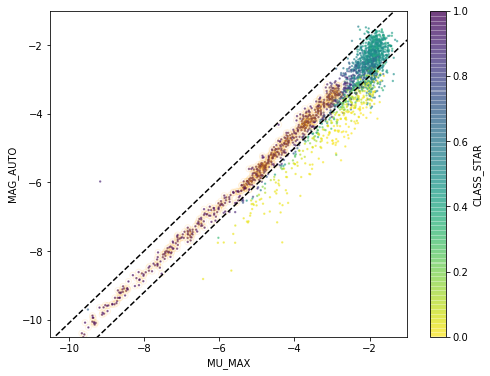

In [8]:
# Star cond
plt.figure(figsize=(8,6))
mag_auto = -2.5*np.log10(Datacube.Tab_SE["FLUX_AUTO"])
plt.scatter(Datacube.Tab_SE["MU_MAX"], mag_auto,
            c = Datacube.Tab_SE["CLASS_STAR"], s=2, cmap='viridis_r', alpha=0.5)

xx = np.linspace(-10.5,-1,100)
plt.plot(xx, 1.05*xx-0.8, 'k--', xx, 1.05*xx+0.4, 'k--')
plt.xlabel("MU_MAX")
plt.ylabel("MAG_AUTO")
plt.xlim(-10.5,-1.)
plt.ylim(-10.5,-1.)
cb = plt.colorbar()
cb.set_label("CLASS_STAR")

star_cond = ((abs(mag_auto-1.05*Datacube.Tab_SE["MU_MAX"]  + 0.2))<0.6) & (Datacube.Tab_SE['CLASS_STAR']>0.9)
plt.scatter(Datacube.Tab_SE["MU_MAX"][star_cond], mag_auto[star_cond],facecolors='none',color='orange',alpha=0.1)
np.sum(star_cond)

In [9]:
Y_pix, X_pix = np.indices(Datacube.mask_edge.shape)
dist_edge = np.array([np.sqrt((X_pix[~Datacube.mask_edge]-gal["X_IMAGE"])**2 + \
                              (Y_pix[~Datacube.mask_edge]-gal["Y_IMAGE"])**2).min() \
                      for gal in Datacube.Tab_SE])

84
88
8.705078263080582
6.025024506612361


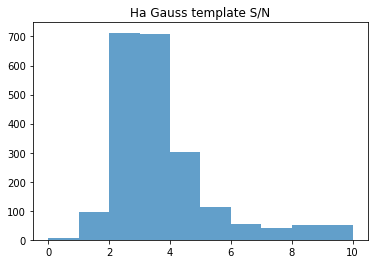

In [21]:
# Gaussian library Ha template (New CC method)
inds_best_Ha = np.argmax(Datacube.CC_Rs_Temps['Ha-NII_gauss'], axis=1)
SNR_best_Ha = np.array([Datacube.CC_SNRs_Temps['Ha-NII_gauss'][i,j] for i,j in enumerate(inds_best_Ha)])
SNRp_best_Ha = np.array([Datacube.CC_SNR_ps_Temps['Ha-NII_gauss'][i,j] for i,j in enumerate(inds_best_Ha)])

plt.hist(SNR_best_Ha,range=[0,10],bins=np.array([0,1,2,3,4,5,6,7,8,10]),alpha=0.7)
plt.title("Ha Gauss template S/N")

cond0 = (SNR_best_Ha>8) & (dist_edge>5) & (SNRp_best_Ha>5) 
cond2 = (SNR_best_Ha>5.5) & (SNR_best_Ha<8) & (SNRp_best_Ha>4) & (dist_edge>5) & (~star_cond)  

print(np.sum(cond0))
print(np.sum(cond2))

print(np.percentile(SNR_best_Ha, 95))
print(np.percentile(SNR_best_Ha, 90))

19
Best z: 0.2281370888513329 Best sigma: 3.191580815504895
SE Object #80  z: 0.228  Peak R: 6.429  Detction S/N: 36.179 Peak S/N: 18.856


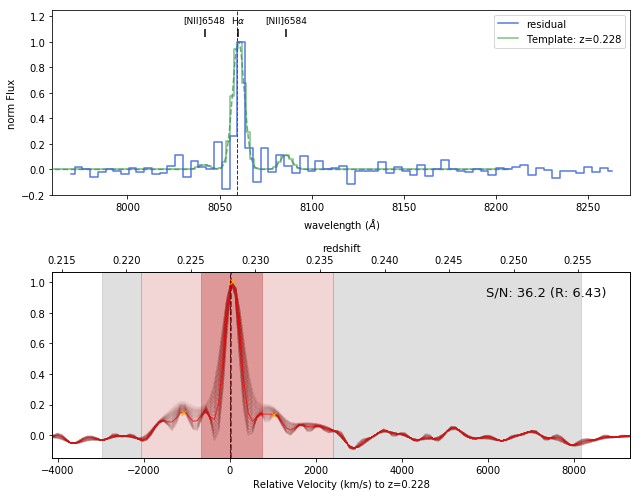

Best z: 0.22908937215851405 Best sigma: 1.8341303394555193
SE Object #114  z: 0.229  Peak R: 3.130  Detction S/N: 22.931 Peak S/N: 12.297


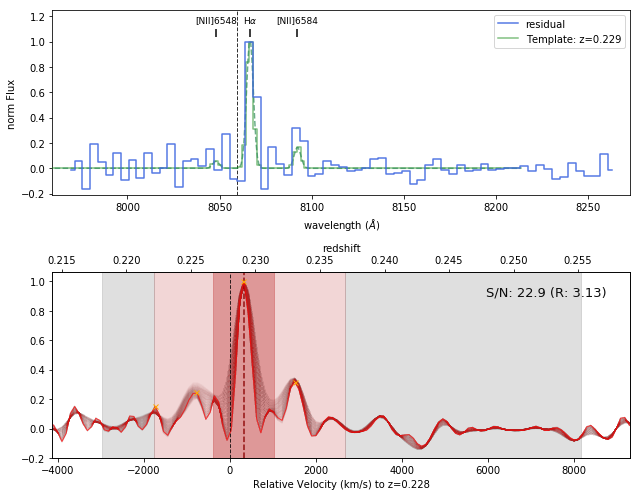

Best z: 0.2209237721726375 Best sigma: 5.0015147835707285
SE Object #240  z: 0.221  Peak R: 1.321  Detction S/N: 9.066 Peak S/N: 4.394


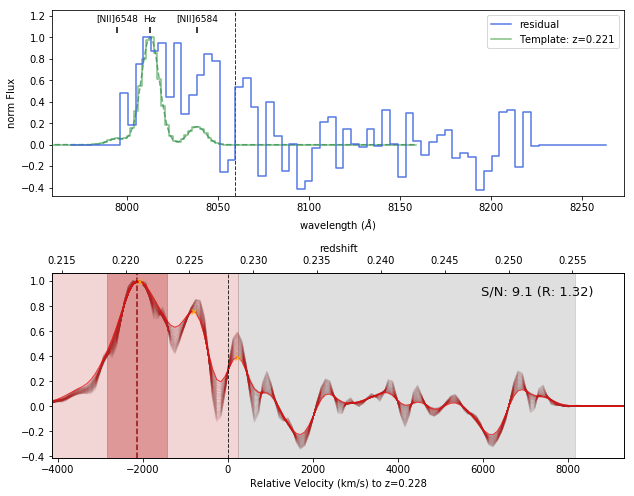

Best z: 0.21666135777159024 Best sigma: 1.8341303394555193
SE Object #300  z: 0.217  Peak R: 2.721  Detction S/N: 9.395 Peak S/N: 8.932


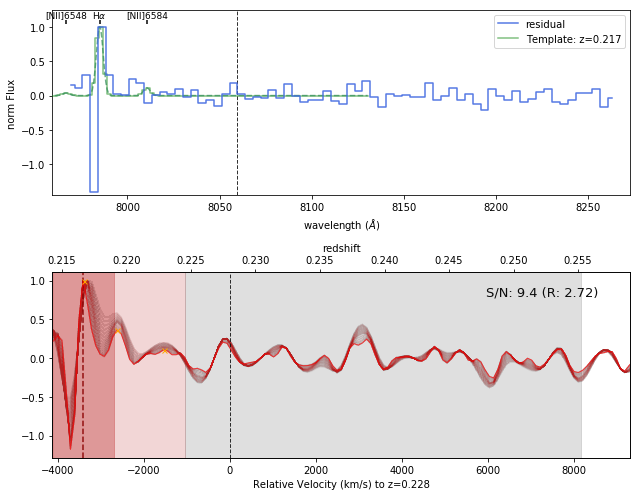

Best z: 0.224858308542835 Best sigma: 2.9653390694966655
SE Object #438  z: 0.225  Peak R: 2.587  Detction S/N: 14.563 Peak S/N: 8.578


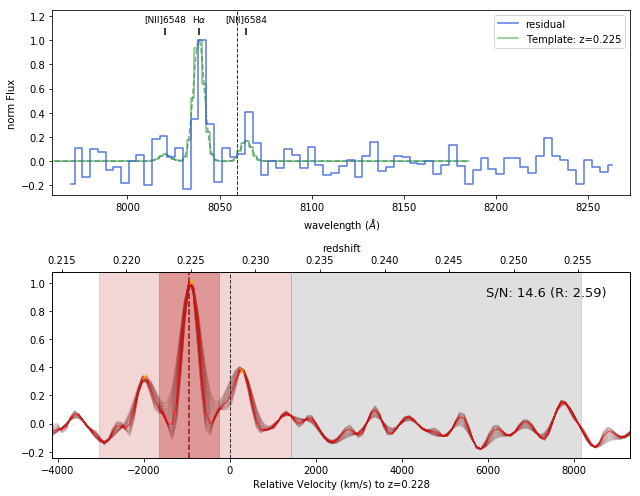

Best z: 0.21961226004923834 Best sigma: 4.775273037562499
SE Object #459  z: 0.220  Peak R: 1.312  Detction S/N: 9.284 Peak S/N: 4.366


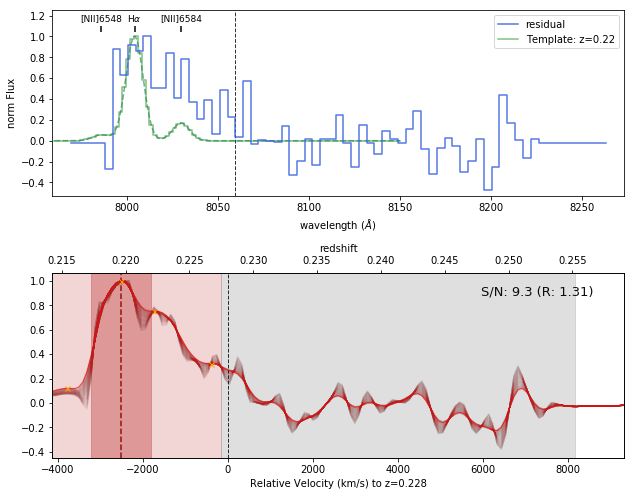

Best z: 0.21698923580244 Best sigma: 4.775273037562499
SE Object #495  z: 0.217  Peak R: 9.673  Detction S/N: 8.252 Peak S/N: 5.376


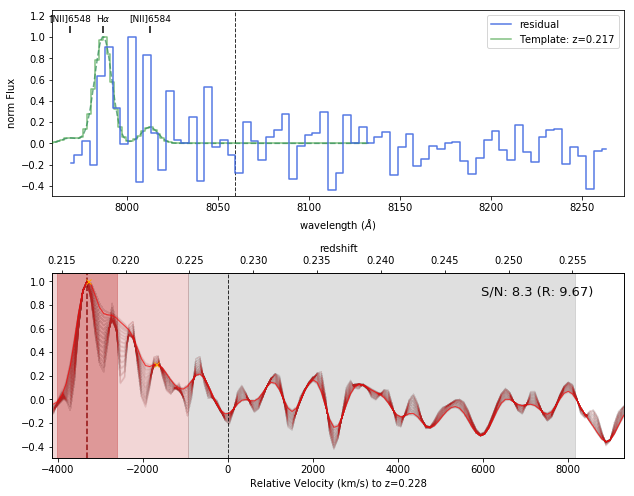

Best z: 0.22354679641943584 Best sigma: 1.8341303394555193
SE Object #566  z: 0.224  Peak R: 3.406  Detction S/N: 12.167 Peak S/N: 10.838


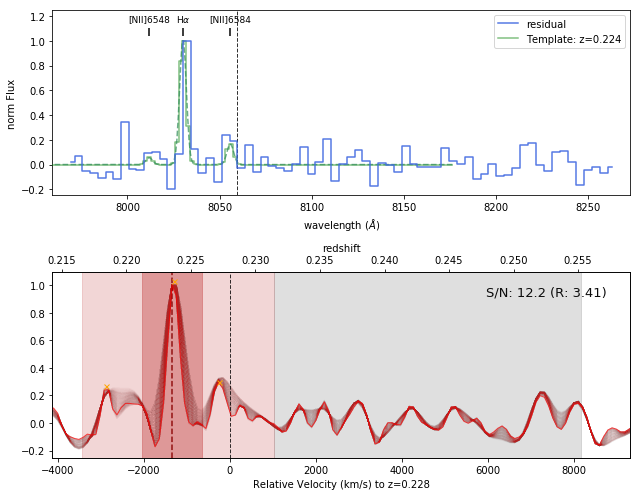

Best z: 0.21994013808008814 Best sigma: 5.0015147835707285
SE Object #833  z: 0.220  Peak R: 1.825  Detction S/N: 10.468 Peak S/N: 5.706


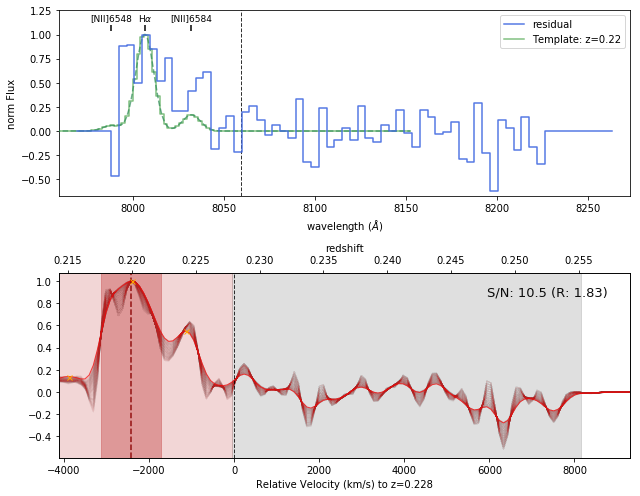

Best z: 0.22285968957236799 Best sigma: 5.0015147835707285
SE Object #897  z: 0.223  Peak R: 1.755  Detction S/N: 9.208 Peak S/N: 4.480


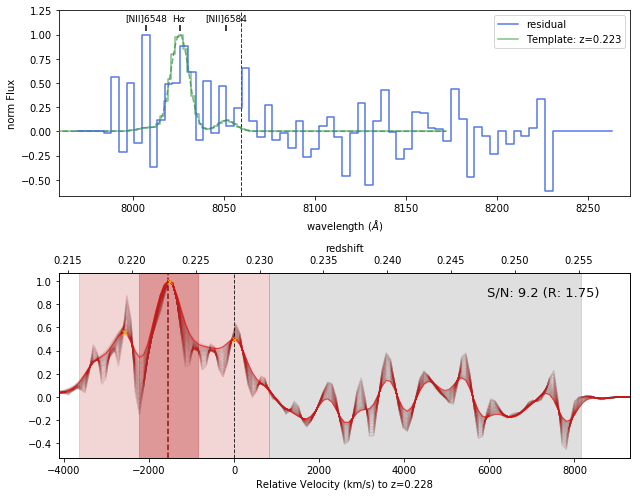

Best z: 0.21663000698622195 Best sigma: 1.8341303394555193
SE Object #1095  z: 0.217  Peak R: 2.703  Detction S/N: 9.475 Peak S/N: 8.114


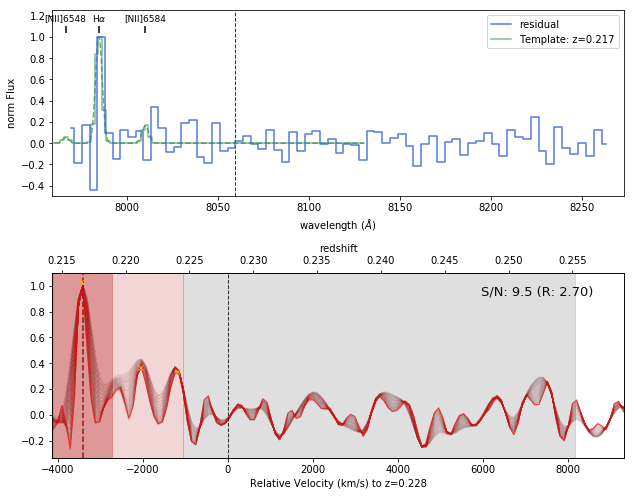

Best z: 0.22384332366491738 Best sigma: 3.8703060535295823
SE Object #1579  z: 0.224  Peak R: 7.741  Detction S/N: 8.330 Peak S/N: 6.149


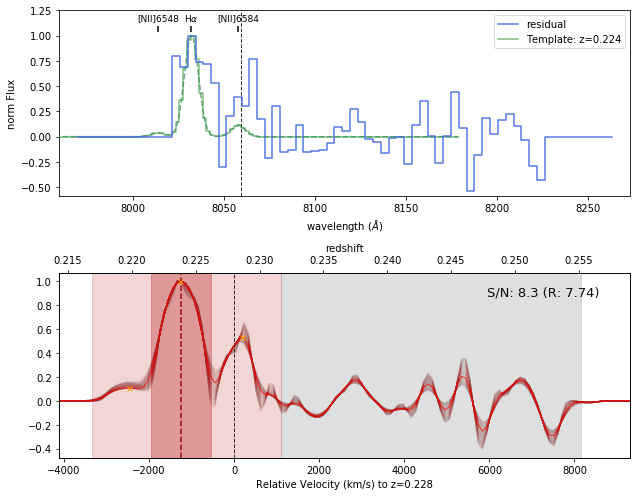

Best z: 0.21862862595668897 Best sigma: 5.0015147835707285
SE Object #1588  z: 0.219  Peak R: 9.404  Detction S/N: 10.439 Peak S/N: 6.217


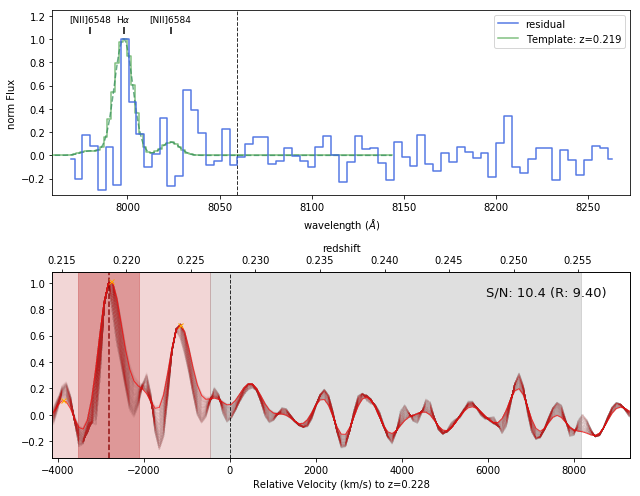

Best z: 0.21925303123302028 Best sigma: 4.096547799537811
SE Object #1613  z: 0.219  Peak R: 9.729  Detction S/N: 8.899 Peak S/N: 4.479


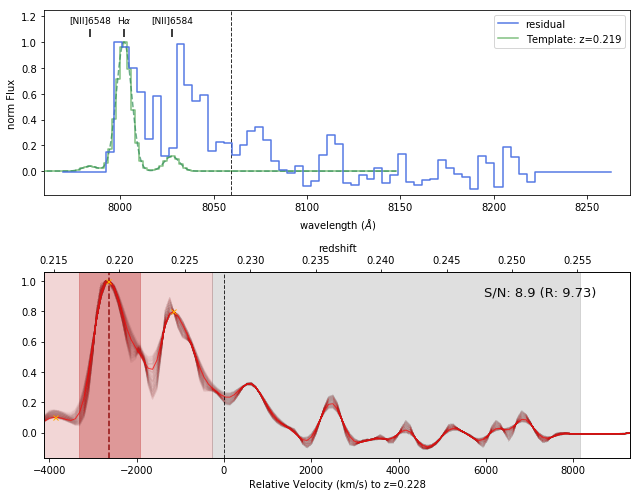

Best z: 0.224858308542835 Best sigma: 5.0015147835707285
SE Object #1963  z: 0.225  Peak R: 1.450  Detction S/N: 10.569 Peak S/N: 3.939


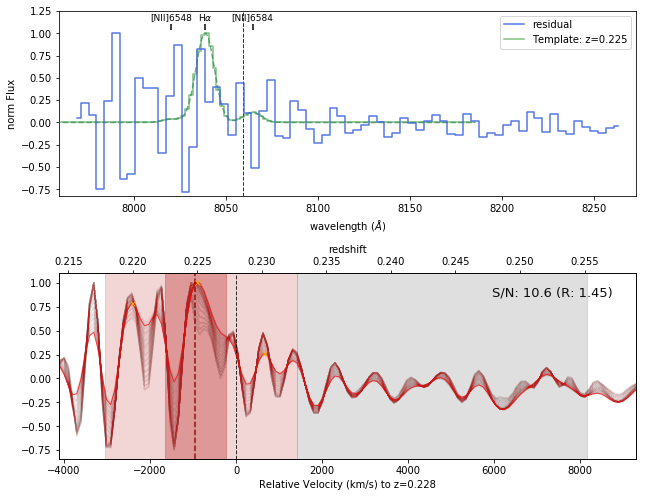

Best z: 0.22420255248113544 Best sigma: 5.0015147835707285
SE Object #2133  z: 0.224  Peak R: 1.997  Detction S/N: 17.648 Peak S/N: 5.544


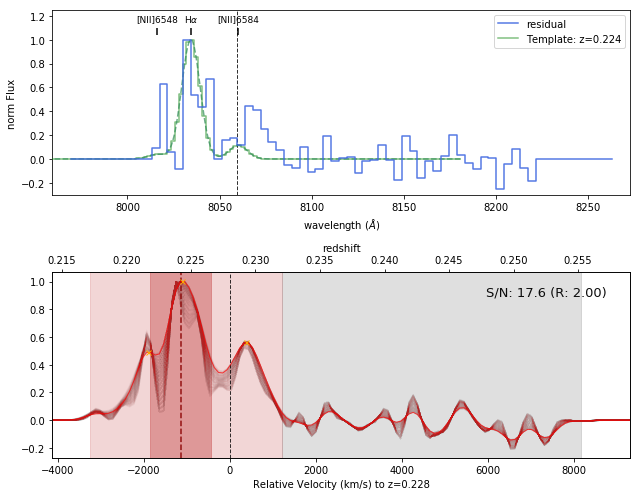

Best z: 0.21892515320217049 Best sigma: 3.6440643075213535
SE Object #2142  z: 0.219  Peak R: 9.063  Detction S/N: 10.277 Peak S/N: 6.209


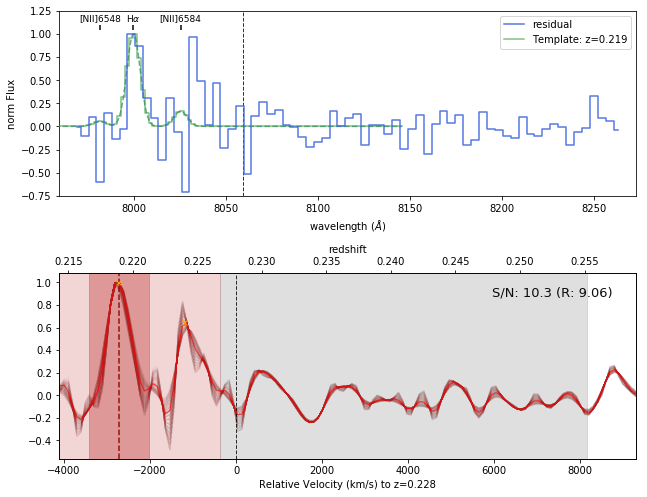

Best z: 0.21895650398753874 Best sigma: 5.0015147835707285
SE Object #2143  z: 0.219  Peak R: 2.312  Detction S/N: 9.974 Peak S/N: 6.052


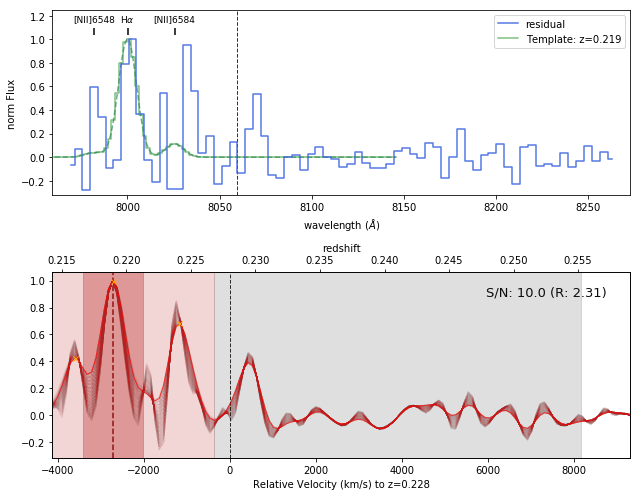

Best z: 0.21892515320217049 Best sigma: 5.0015147835707285
SE Object #2151  z: 0.219  Peak R: 7.162  Detction S/N: 8.405 Peak S/N: 4.952


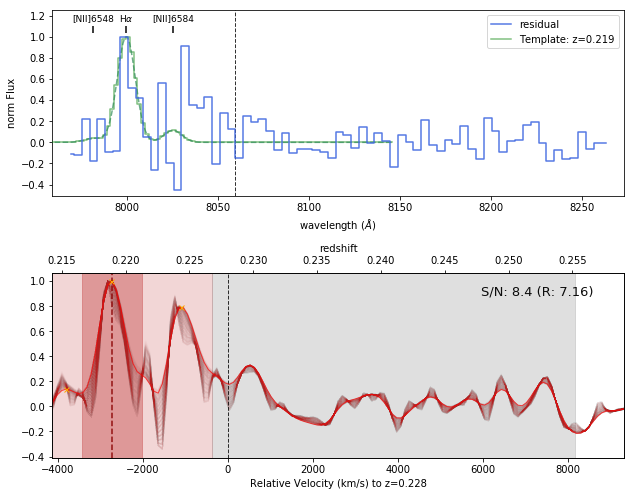

In [17]:
cond = cond0 & star_cond
print(np.sum(cond))
for j, (cc_num) in enumerate(Datacube.cc_nums[cond]):
    ccs, rv, z_ccs, Rs, Contrasts, SNRs, SNR_ps = Datacube.cross_correlation(cc_num, 
                                                                             temp_type="Ha-NII", temp_model="gauss")
#     plt.savefig("./A2390SE/fig/xcorr_v1/SNb/CC#%d.png"%(cc_num), dpi=150)
    plt.show()
    plt.close()

16


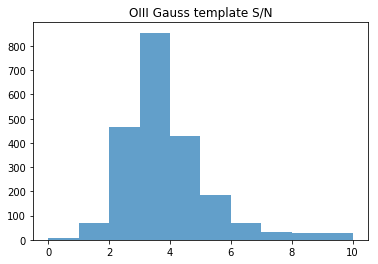

In [13]:
# Gaussian library Hb template (New CC method)
inds_best_Hb = np.argmax(Datacube.CC_Rs_Temps['Hb-OIII_gauss'], axis=1)
SNR_best_Hb = np.array([Datacube.CC_SNRs_Temps['Hb-OIII_gauss'][i,j] for i,j in enumerate(inds_best_Hb)])

plt.hist(SNR_best_Hb,range=[0,10],bins=np.array([0,1,2,3,4,5,6,7,8,10]),alpha=0.7)
plt.title("OIII Gauss template S/N")

cond_b = (SNR_best_Hb>7) & (SNR_best_Ha>3) & (SNR_best_Ha<5.5) & (dist_edge>5) & (~star_cond)  

print(np.sum(cond_b))

16
S/N Ha: 4.773535273632455
Best z: 0.6166719448978689 Best sigma: 5.0015147835707285
SE Object #4  z: 0.617  Peak R: 1.000  Detction S/N: 9.414 Peak S/N: 9.414


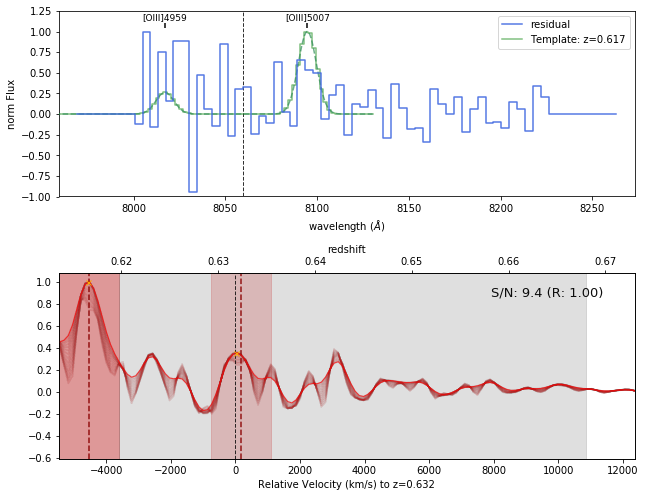

S/N Ha: 4.958704043883902
Best z: 0.6162779160839198 Best sigma: 5.0015147835707285
SE Object #9  z: 0.616  Peak R: 1.001  Detction S/N: 8.794 Peak S/N: 8.794


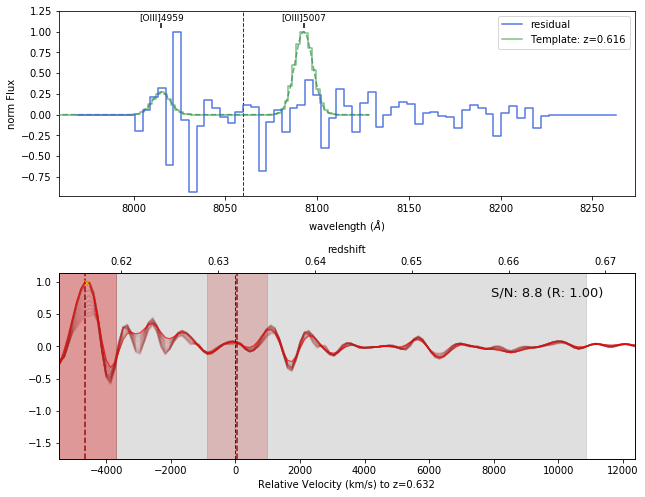

S/N Ha: 4.852525959371835
Best z: 0.6166719448978689 Best sigma: 3.8703060535295823
SE Object #11  z: 0.617  Peak R: 1.000  Detction S/N: 7.566 Peak S/N: 7.566


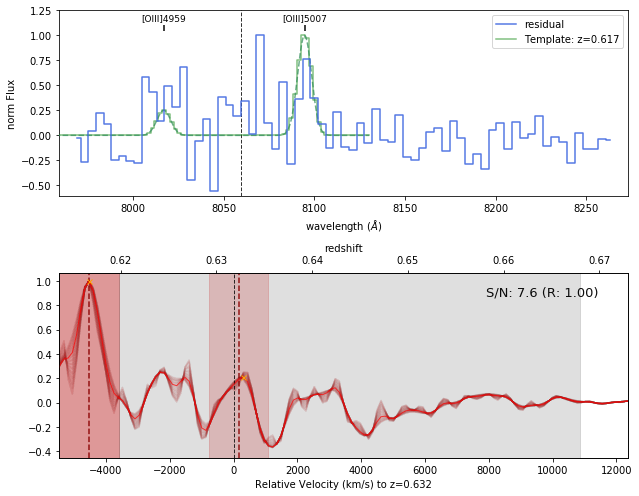

S/N Ha: 4.662648848898612
Best z: 0.6149708517896494 Best sigma: 2.9653390694966655
SE Object #292  z: 0.615  Peak R: 1.000  Detction S/N: 7.263 Peak S/N: 7.263


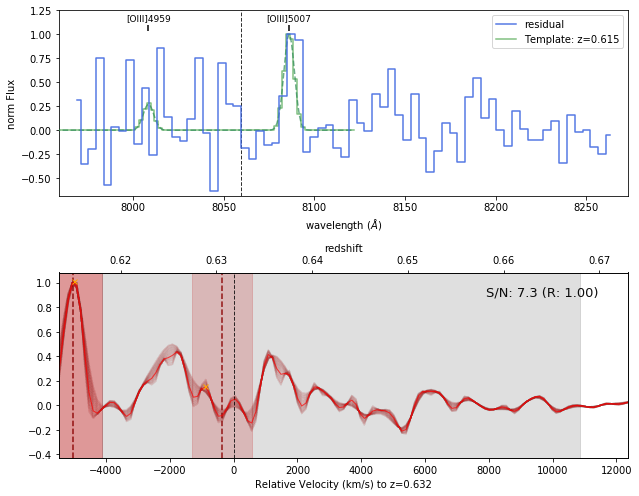

S/N Ha: 5.042100671619301
Best z: 0.620199108966731 Best sigma: 2.286613831471978
SE Object #304  z: 0.620  Peak R: 4.195  Detction S/N: 9.677 Peak S/N: 9.677


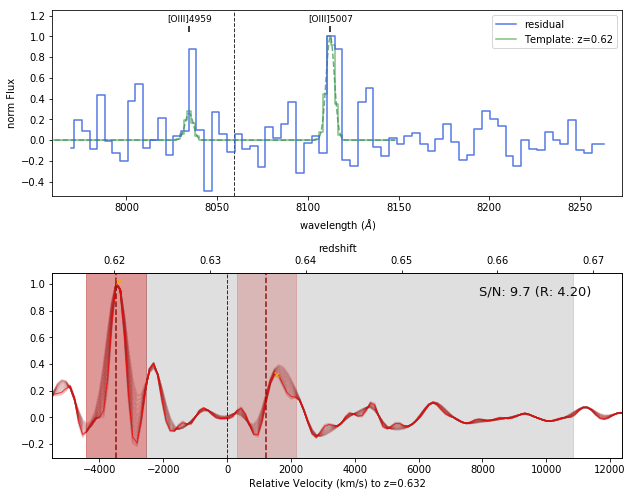

S/N Ha: 3.3939526377847717
Best z: 0.620199108966731 Best sigma: 1.8341303394555193
SE Object #437  z: 0.620  Peak R: 5.587  Detction S/N: 7.303 Peak S/N: 7.303


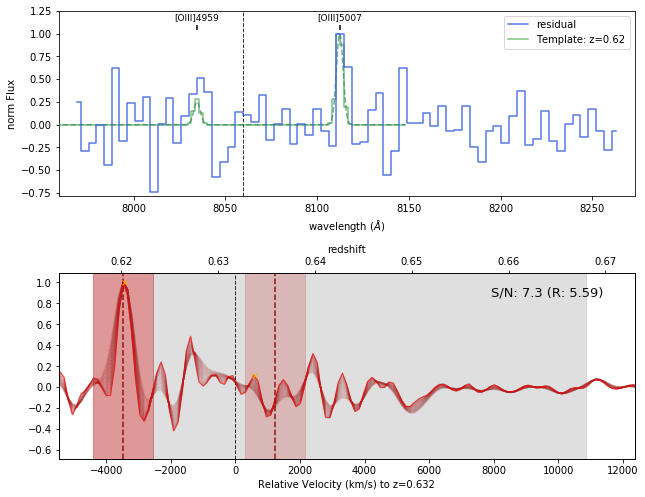

S/N Ha: 4.857721135458466
Best z: 0.6345351569195645 Best sigma: 2.0603720854637486
SE Object #477  z: 0.635  Peak R: 1.840  Detction S/N: 7.030 Peak S/N: 7.030


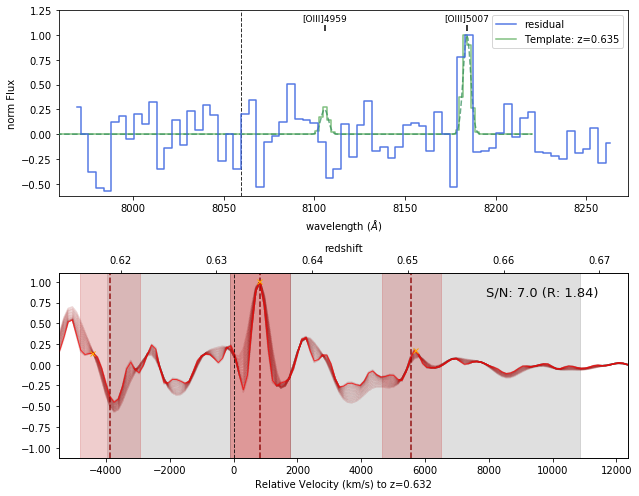

S/N Ha: 4.379776607572297
Best z: 0.6215061732610014 Best sigma: 4.775273037562499
SE Object #591  z: 0.622  Peak R: 3.236  Detction S/N: 7.381 Peak S/N: 7.381


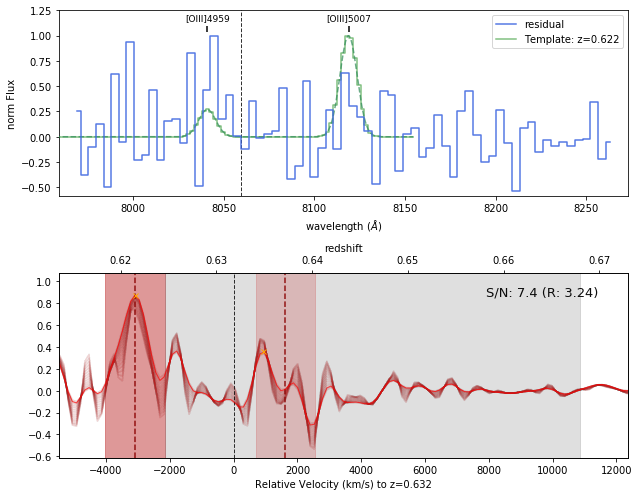

S/N Ha: 4.816355528396018
Best z: 0.6415061664890067 Best sigma: 5.0015147835707285
SE Object #593  z: 0.642  Peak R: 2.358  Detction S/N: 7.314 Peak S/N: 7.314


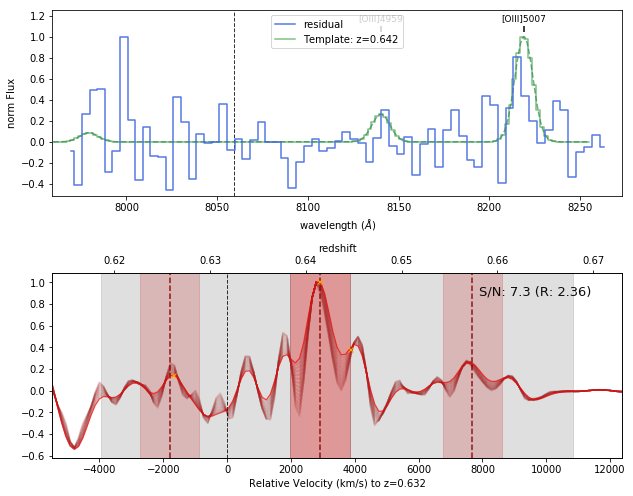

S/N Ha: 4.083579587927479
Best z: 0.6449916712737278 Best sigma: 5.0015147835707285
SE Object #1043  z: 0.645  Peak R: 1.000  Detction S/N: 7.427 Peak S/N: 7.427


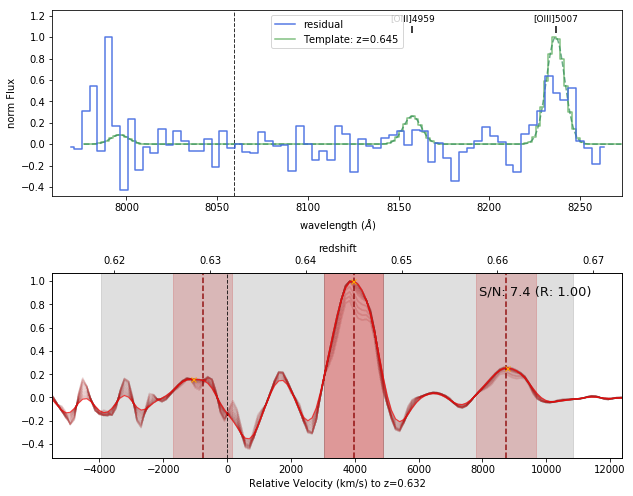

S/N Ha: 4.286999382460456
Best z: 0.6410704783909166 Best sigma: 4.54903129155427
SE Object #1177  z: 0.641  Peak R: 4.646  Detction S/N: 8.696 Peak S/N: 8.696


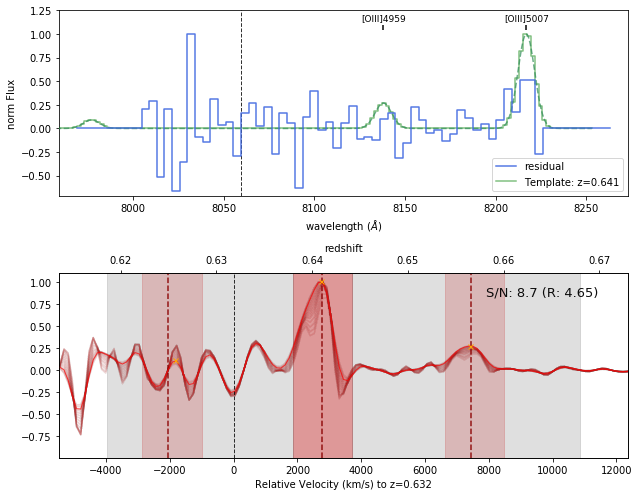

S/N Ha: 3.7278931227992738
Best z: 0.6376266328903365 Best sigma: 1.8341303394555193
SE Object #1209  z: 0.638  Peak R: 1.661  Detction S/N: 7.859 Peak S/N: 7.859


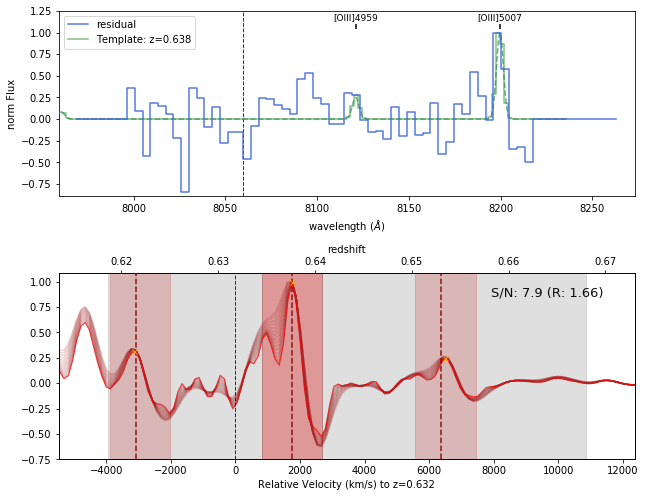

S/N Ha: 5.03360477116629
Best z: 0.6284771828304436 Best sigma: 3.8703060535295823
SE Object #1322  z: 0.628  Peak R: 3.246  Detction S/N: 8.148 Peak S/N: 8.148


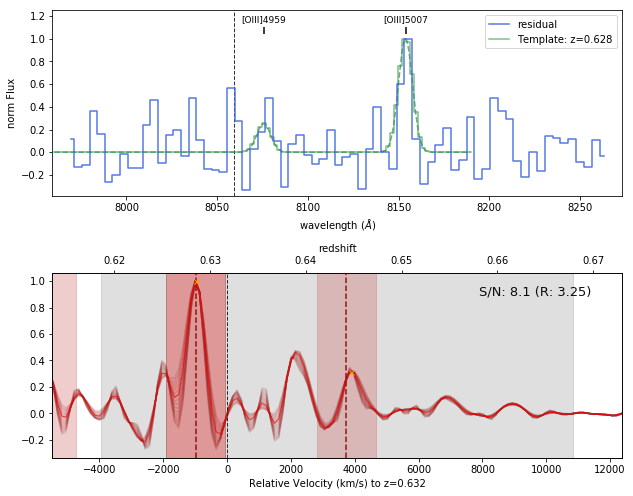

S/N Ha: 4.671401128850652
Best z: 0.6154065398877395 Best sigma: 5.0015147835707285
SE Object #1380  z: 0.615  Peak R: 1.000  Detction S/N: 7.081 Peak S/N: 7.081


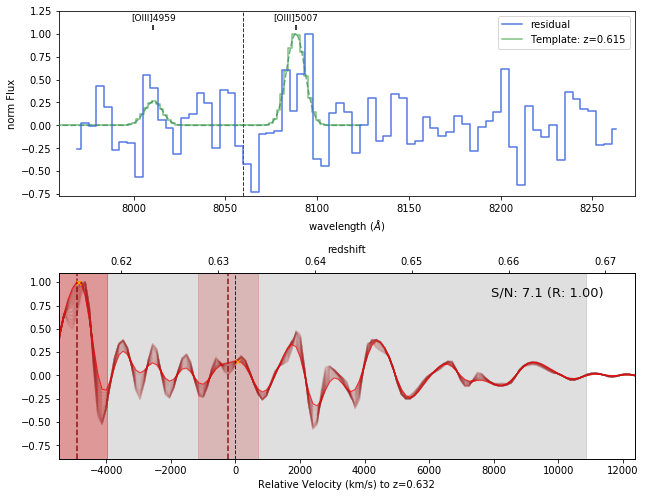

S/N Ha: 3.8775648010761277
Best z: 0.6215061732610014 Best sigma: 5.0015147835707285
SE Object #1970  z: 0.622  Peak R: 3.268  Detction S/N: 8.385 Peak S/N: 8.385


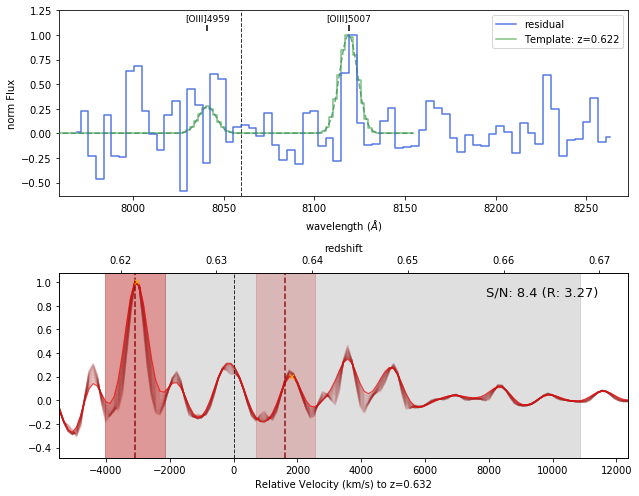

S/N Ha: 4.244045241207182
Best z: 0.6192860734864097 Best sigma: 5.0015147835707285
SE Object #2030  z: 0.619  Peak R: 1.005  Detction S/N: 8.417 Peak S/N: 8.417


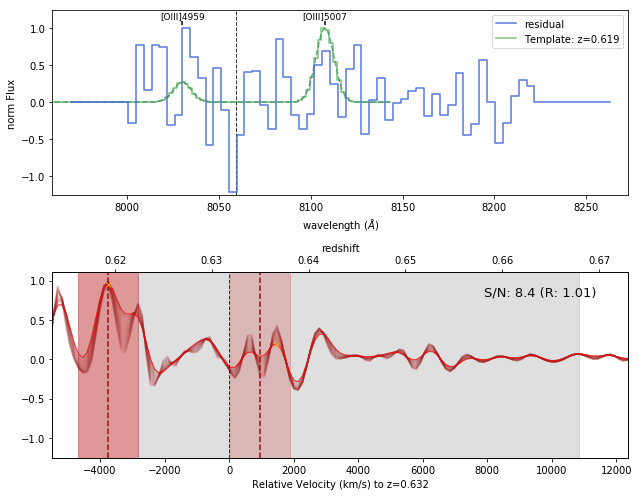

In [15]:
cond = cond_b
print(np.sum(cond))
for j, (cc_num) in enumerate(np.int64(Datacube.cc_nums[cond])):
    print("S/N Ha:",SNR_best_Ha[cc_num-1])
    ccs, rv, z_ccs, Rs, Contrasts, SNRs, SNR_ps = Datacube.cross_correlation(cc_num,
                                                                            temp_type="Hb-OIII", temp_model="gauss")
    plt.savefig("./A2390SE/fig/xcorr_v1/SNc/CC#%d.png"%(cc_num), dpi=150)
    plt.show()
    plt.close()

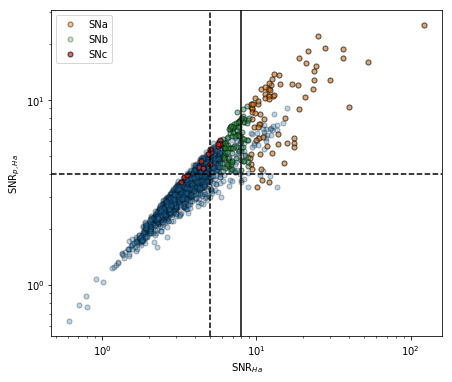

In [27]:
# Ha + Hb
plt.figure(figsize=(7,6))
plt.loglog(SNR_best_Ha, SNRp_best_Ha, ".", ms=10, mec='k', alpha=0.3)
plt.loglog(SNR_best_Ha[cond0], SNRp_best_Ha[cond0], ".", mec='k', ms=10, alpha=0.5, label="SNa")
plt.loglog(SNR_best_Ha[cond2], SNRp_best_Ha[cond2], ".", mec='k', ms=10, alpha=0.3, label="SNb")
plt.loglog(SNR_best_Ha[cond_b], SNRp_best_Ha[cond_b], ".", mec='k', ms=10, alpha=0.7, label="SNc")
plt.axvline(8, ls='-', color='k')
plt.axvline(5, ls='--', color='k')
plt.axhline(4, ls='--', color='k')
plt.xlabel("SNR$_{Ha}$")
plt.ylabel("SNR$_{p,Ha}$")
plt.legend(loc=2)

In [16]:
#Composite 
import re
import glob
el_ls = glob.glob("./A2390SE/fig/xcorr_v1/SNc/*.png")
for el in el_ls:
    img_cc = plt.imread(el)
    ind = re.compile(r'\d+').findall(el)[-1]
    img_spec = plt.imread("./A2390SE/fig/spec/SE#%s.png"%ind)
    img_thumb = plt.imread("./A2390SE/fig/img_thumb/SE#%s.png"%ind)
    plt.figure(figsize=(18,9))
    ax1 = plt.subplot2grid((2, 3), (0, 0), colspan=2, rowspan=2)
    ax2 = plt.subplot2grid((2, 3), (0, 2), colspan=1, rowspan=1)
    ax3 = plt.subplot2grid((2, 3), (1, 2), colspan=1, rowspan=1)
    ax1.imshow(img_cc)
    ax2.imshow(img_spec)
    ax3.imshow(img_thumb)
    ax1.axis("off")
    ax2.axis("off")
    ax3.axis("off")
#     plt.suptitle("Flag: 1",fontsize=18)
    plt.tight_layout()
    plt.savefig("./A2390SE/fig/candidate_v1/SNc/#EL-%s.png"%ind,dpi=150)
    plt.close()

## 5. Centroid Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
import re
import warnings
warnings.filterwarnings('ignore')
from pipeline import *
from utils import *

Datacube = Read_Datacube("/home/qliu/data/A2390F/A2390SE_cube.fits", name="A390SE", z0=0.228, SE_catalog="./A2390SE/SE/A2390SE_run2.cat")
Datacube.read_mask('/home/qliu/data/A2390F/Raw_stack_A2390SE_mask.fits')
Datacube.read_seg('./A2390SE/SE/segment_run2.fits')
Datacube.read_spec('./A2390SE/A2390SE-spec.fits')
Datacube.generate_template(n_ratio=20, n_stddev=15, n_intp=2, sigma=4, ratio_range = (1.2, 9),
                           temp_type="Ha-NII", ratio_prior="uniform", temp_model='gauss')
Datacube.generate_template(n_ratio=8, n_stddev=15, n_intp=2, sigma=4, ratio_range = (2., 4.),
                           temp_type="Hb-OIII", ratio_prior="uniform", temp_model='gauss')
# Datacube.generate_template(n_ratio=8, n_stddev=15, n_intp=2, sigma=4,
#                            temp_type="OII", ratio_prior="uniform", temp_model='gauss')
Datacube.read_cc('./A2390SE/A2390SE-cc_Hb-OIII_gauss_v1.fits')
Datacube.read_cc('./A2390SE/A2390SE-cc_Ha-NII_gauss_v1.fits')

w = WCS(Datacube.hdu[0].header, naxis=2)
Datacube.assign_BCG_coordinate((328.40351201,17.69544013))

X_BCG, Y_BCG = Datacube.wcs.all_world2pix(Datacube.coord_BCG.ra, Datacube.coord_BCG.dec, 1)
Datacube.pos_BCG = (X_BCG, Y_BCG)

Template: Ha-NII_gauss  Total Number: 300
Template: Hb-OIII_gauss  Total Number: 120
Read cross-correlation result... Template:Hb-OIII_gauss
Read cross-correlation result... Template:Ha-NII_gauss
INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied h

In [6]:
el_ls_v = glob.glob("./A2390SE/fig/candidate_v1/visual/*.png")
Num_v = np.sort(np.array([re.compile(r'\d+').findall(el)[-1] for el in el_ls_v]).astype("int"))
ind_v = Num_v-1
Num_v

array([   7,    8,   11,   12,   80,   87,  113,  114,  154,  219,  239,
        283,  313,  325,  337,  353,  378,  437,  438,  440,  449,  477,
        519,  559,  566,  579,  597,  650,  655,  672,  673,  913,  924,
        925,  943,  949, 1005, 1051, 1115, 1175, 1183, 1184, 1225, 1230,
       1231, 1243, 1311, 1322, 1334, 1400, 1526, 1537, 1553, 1588, 1593,
       1602, 1624, 1691, 1699, 1708, 1717, 1733, 1778, 1797, 1868, 1922,
       1970, 2083, 2098, 2119, 2130])

In [32]:
inds_best_Ha = np.argmax(Datacube.CC_Rs_Temps['Ha-NII_gauss'], axis=1)
SNR_best_Ha = np.array([Datacube.CC_SNRs_Temps['Ha-NII_gauss'][i,j] for i,j in enumerate(inds_best_Ha)])
inds_best_Hb = np.argmax(Datacube.CC_Rs_Temps['Hb-OIII_gauss'], axis=1)
SNR_best_Hb = np.array([Datacube.CC_SNRs_Temps['Hb-OIII_gauss'][i,j] for i,j in enumerate(inds_best_Hb)])

Num_va = Num_v[(SNR_best_Ha/SNR_best_Hb>1)[Num_v-1]]
ind_v = Num_va-1

Num_va

array([   7,   80,  114,  219,  239,  283,  313,  325,  337,  353,  378,
        438,  449,  519,  559,  566,  597,  650,  655,  673,  924,  925,
        943,  949, 1005, 1175, 1184, 1225, 1231, 1311, 1526, 1537, 1553,
       1588, 1593, 1602, 1624, 1691, 1699, 1708, 1717, 1733, 1778, 1797,
       1868, 1922, 2098, 2119, 2130])

In [23]:
Num_vp=Num_va[(Datacube.z_best[Num_va-1]<0.24) & (Datacube.z_best[Num_va-1]>0.216)]
ind_v = Num_vp-1
Num_vp

array([   7,   80,  114,  219,  239,  283,  313,  325,  337,  353,  378,
        438,  449,  519,  559,  566,  597,  650,  655,  673,  924,  925,
        943,  949, 1005, 1184, 1231, 1311, 1537, 1553, 1588, 1593, 1624,
       1691, 1699, 1708, 1717, 1733, 1778, 1797, 1868, 1922, 2098, 2119])

69
47
44


Text(0.5,0,'A2390E Candidate Redshift')

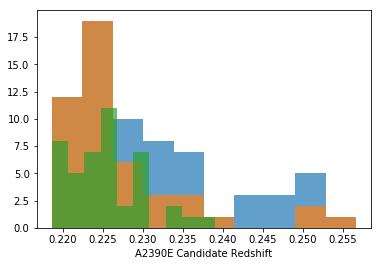

In [24]:
plt.hist(Datacube.z_best[Num_v-1],bins=10,alpha=0.7)
plt.hist(Datacube.z_best[Num_va-1],bins=10,alpha=0.7)
plt.hist(Datacube.z_best[Num_vp-1],bins=10,alpha=0.7)
print(len(Num_v))
print(len(Num_va))
print(len(Num_vp))
plt.xlabel("A2390E Candidate Redshift")

optimal aperture:2.3

PA: 169.706,  Cluster-centric angle: 325.372


(155.66587737820976, 0.4395995588513877, 0.27344999780309304)

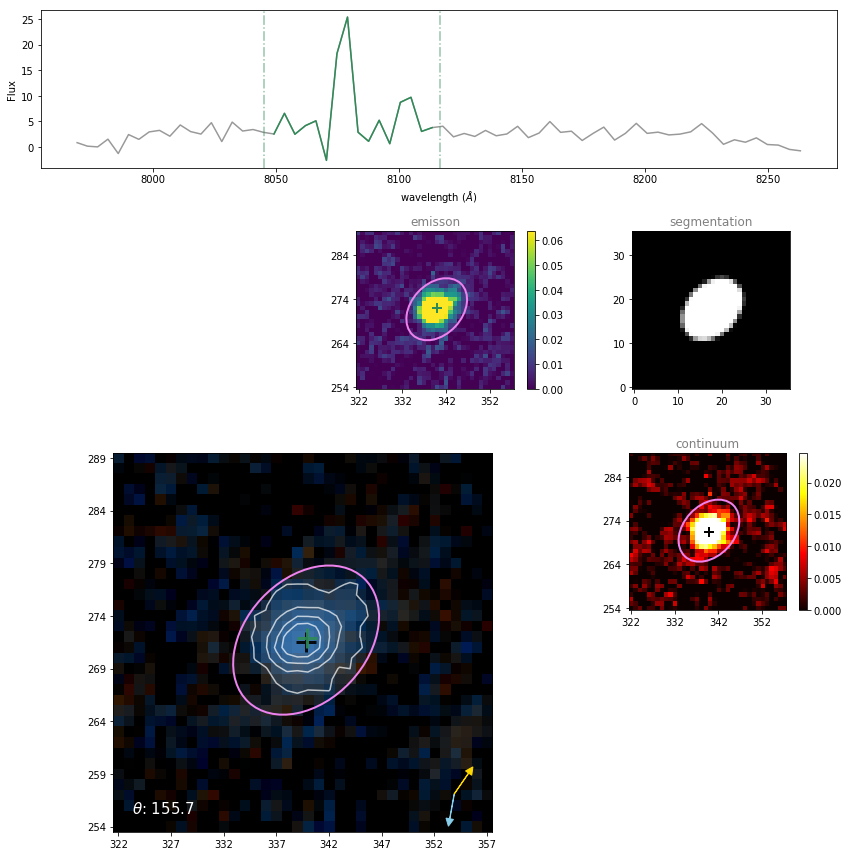

In [7]:
Datacube.centroid_analysis(num=239, centroid_type='APER')

optimal aperture:2.0

PA: 283.780,  Cluster-centric angle: 344.338


(60.55770785792021, 0.1806014289459249, 0.12024742669149051)

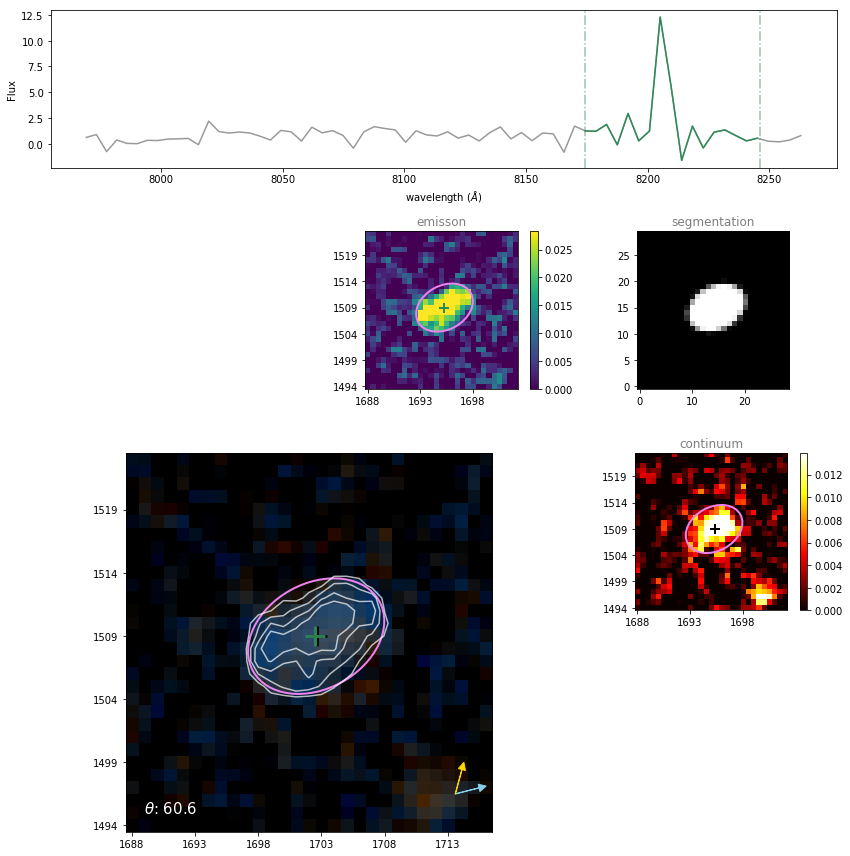

In [31]:
Datacube.centroid_analysis(num=1602, centroid_type='APER')

In [10]:
Datacube.pos_BCG = (2104.09836227, 2906.58511366)
X_BCG, Y_BCG = Datacube.wcs.all_world2pix(Datacube.coord_BCG.ra, Datacube.coord_BCG.dec, 1)
Datacube.pos_BCG = (X_BCG, Y_BCG)

In [10]:
Datacube.centroid_analysis_all(Num_v, centroid_type='APER')

Current Model:  Ha-NII_gauss
#EL-1
optimal aperture:2.9

PA: 175.410,  Cluster-centric angle: 344.107
#EL-2
optimal aperture:4.3

PA: 47.176,  Cluster-centric angle: 344.356
#EL-3
optimal aperture:4.4

PA: 178.094,  Cluster-centric angle: 338.765
#EL-4
optimal aperture:2.7

PA: 10.671,  Cluster-centric angle: 349.667
#EL-5
optimal aperture:4.2

PA: 11.285,  Cluster-centric angle: 340.671
#EL-6
optimal aperture:2.9

PA: 70.937,  Cluster-centric angle: 355.371
#EL-7
optimal aperture:2.0

PA: 307.029,  Cluster-centric angle: 355.856
#EL-8
optimal aperture:1.8

PA: 203.427,  Cluster-centric angle: 327.899
#EL-9
optimal aperture:2.4

PA: 0.238,  Cluster-centric angle: 336.508
#EL-10
optimal aperture:2.4

PA: 12.409,  Cluster-centric angle: 335.798
#EL-11
optimal aperture:2.2

PA: 182.817,  Cluster-centric angle: 329.408
#EL-12
optimal aperture:2.4

PA: 69.931,  Cluster-centric angle: 341.676
#EL-13
optimal aperture:2.4

PA: 133.277,  Cluster-centric angle: 343.903
#EL-14
optimal aperture:1.

optimal aperture:2.6

PA: 294.847,  Cluster-centric angle: 346.292
#EL-122
optimal aperture:2.2

PA: 228.937,  Cluster-centric angle: 336.680
#EL-123
optimal aperture:2.1

PA: 67.050,  Cluster-centric angle: 322.909
#EL-124
optimal aperture:2.5

PA: 123.586,  Cluster-centric angle: 343.878
#EL-125
optimal aperture:3.3

PA: 350.413,  Cluster-centric angle: 357.316
#EL-126
optimal aperture:2.0

PA: 75.477,  Cluster-centric angle: 357.003
#EL-127
optimal aperture:1.6

PA: 346.197,  Cluster-centric angle: 333.065
#EL-128
optimal aperture:2.0

PA: 207.622,  Cluster-centric angle: 322.991
#EL-129
optimal aperture:2.6

PA: 291.409,  Cluster-centric angle: 323.653
#EL-130
optimal aperture:2.0

PA: 219.678,  Cluster-centric angle: 354.848
#EL-131
optimal aperture:2.6

PA: 260.740,  Cluster-centric angle: 350.523
#EL-132
optimal aperture:1.9

PA: 170.889,  Cluster-centric angle: 331.751
#EL-133
optimal aperture:3.0

PA: 242.769,  Cluster-centric angle: 328.049
#EL-134
optimal aperture:2.2

PA: 9

optimal aperture:2.3

PA: 110.889,  Cluster-centric angle: 345.970
#EL-252
optimal aperture:2.9

PA: 254.422,  Cluster-centric angle: 327.264
#EL-253
optimal aperture:3.0

PA: 273.557,  Cluster-centric angle: 356.134
#EL-254
optimal aperture:1.8

PA: 123.110,  Cluster-centric angle: 352.751
#EL-255
optimal aperture:1.6

PA: 70.008,  Cluster-centric angle: 328.474
#EL-256
optimal aperture:1.8

PA: 140.228,  Cluster-centric angle: 355.148
#EL-257
optimal aperture:1.7

PA: 121.788,  Cluster-centric angle: 326.191
#EL-258
optimal aperture:2.6

PA: 343.293,  Cluster-centric angle: 322.770
#EL-259
optimal aperture:2.0

PA: 2.693,  Cluster-centric angle: 346.152
#EL-260
optimal aperture:2.9

PA: 50.563,  Cluster-centric angle: 338.615
#EL-261
optimal aperture:2.3

PA: 279.113,  Cluster-centric angle: 349.132
#EL-262
optimal aperture:2.1

PA: 20.585,  Cluster-centric angle: 358.591
#EL-263
optimal aperture:1.9

PA: 202.613,  Cluster-centric angle: 349.825
#EL-264
optimal aperture:3.1

PA: 242.


PA: 246.274,  Cluster-centric angle: 341.018
#EL-362
optimal aperture:2.1

PA: 87.495,  Cluster-centric angle: 345.881
#EL-363
optimal aperture:2.0

PA: 147.798,  Cluster-centric angle: 329.990
#EL-364
optimal aperture:2.3

PA: 49.616,  Cluster-centric angle: 351.093
#EL-365
optimal aperture:2.7

PA: 37.990,  Cluster-centric angle: 353.432
#EL-366
optimal aperture:2.8

PA: 145.107,  Cluster-centric angle: 330.275
#EL-367
optimal aperture:1.6

PA: 11.036,  Cluster-centric angle: 355.806
#EL-368
optimal aperture:2.0

PA: 286.167,  Cluster-centric angle: 354.552
#EL-369
optimal aperture:1.9

PA: 14.892,  Cluster-centric angle: 349.362
#EL-370
optimal aperture:2.3

PA: 341.276,  Cluster-centric angle: 350.820
#EL-371
optimal aperture:1.6

PA: 72.103,  Cluster-centric angle: 325.256
#EL-372
optimal aperture:2.2

PA: 288.771,  Cluster-centric angle: 340.549
#EL-373
optimal aperture:2.6

PA: 9.087,  Cluster-centric angle: 349.237
#EL-374
optimal aperture:1.8

PA: 108.954,  Cluster-centric an


PA: 307.236,  Cluster-centric angle: 323.607
#EL-473
optimal aperture:1.9

PA: 323.867,  Cluster-centric angle: 325.729
#EL-474
optimal aperture:2.0

PA: 312.519,  Cluster-centric angle: 326.278
#EL-475
optimal aperture:3.1

PA: 63.502,  Cluster-centric angle: 322.695
#EL-476
optimal aperture:3.4

PA: 236.921,  Cluster-centric angle: 356.514
#EL-477
optimal aperture:1.7

PA: 33.684,  Cluster-centric angle: 319.034
#EL-478
optimal aperture:1.9

PA: 318.049,  Cluster-centric angle: 341.936
#EL-479
optimal aperture:2.2

PA: 86.119,  Cluster-centric angle: 332.498
#EL-480
optimal aperture:2.2

PA: 273.433,  Cluster-centric angle: 354.324
#EL-481
optimal aperture:2.0

PA: 314.043,  Cluster-centric angle: 343.658
#EL-482
optimal aperture:1.9

PA: 10.263,  Cluster-centric angle: 319.604
#EL-483
optimal aperture:2.0

PA: 93.818,  Cluster-centric angle: 328.692
#EL-484
optimal aperture:1.7

PA: 32.276,  Cluster-centric angle: 338.612
#EL-485
optimal aperture:2.2

PA: 61.140,  Cluster-centric a

optimal aperture:1.9

PA: 104.873,  Cluster-centric angle: 336.177
#EL-601
optimal aperture:2.0

PA: 28.073,  Cluster-centric angle: 356.277
#EL-602
optimal aperture:2.6

PA: 283.937,  Cluster-centric angle: 325.600
#EL-603
optimal aperture:2.0

PA: 336.689,  Cluster-centric angle: 334.214
#EL-604
optimal aperture:1.9

PA: 146.250,  Cluster-centric angle: 321.798
#EL-605
optimal aperture:3.6

PA: 339.379,  Cluster-centric angle: 318.846
#EL-606
optimal aperture:2.4

PA: 217.467,  Cluster-centric angle: 341.975
#EL-607
optimal aperture:2.0

PA: 37.437,  Cluster-centric angle: 355.124
#EL-608
optimal aperture:2.1

PA: 352.394,  Cluster-centric angle: 322.582
#EL-609
optimal aperture:2.3

PA: 38.177,  Cluster-centric angle: 337.651
#EL-610
optimal aperture:2.7

PA: 259.534,  Cluster-centric angle: 325.997
#EL-611
optimal aperture:2.0

PA: 167.314,  Cluster-centric angle: 322.065
#EL-612
optimal aperture:4.5

PA: 90.244,  Cluster-centric angle: 347.118
#EL-613
optimal aperture:2.5

PA: 146

optimal aperture:3.8

PA: 122.635,  Cluster-centric angle: 317.693
#EL-712
optimal aperture:2.1

PA: 247.604,  Cluster-centric angle: 346.590
#EL-713
optimal aperture:2.7

PA: 24.689,  Cluster-centric angle: 330.973
#EL-714
optimal aperture:2.8

PA: 166.108,  Cluster-centric angle: 328.361
#EL-715
optimal aperture:2.3

PA: 337.477,  Cluster-centric angle: 316.919
#EL-716
optimal aperture:2.1

PA: 231.253,  Cluster-centric angle: 329.701
#EL-717
optimal aperture:1.8

PA: 280.215,  Cluster-centric angle: 333.133
#EL-718
optimal aperture:1.9

PA: 91.369,  Cluster-centric angle: 322.587
#EL-719
optimal aperture:2.5

PA: 56.434,  Cluster-centric angle: 317.597
#EL-720
optimal aperture:3.4

PA: 92.572,  Cluster-centric angle: 352.195
#EL-721
optimal aperture:2.5

PA: 190.426,  Cluster-centric angle: 347.708
#EL-722
optimal aperture:2.2

PA: 152.018,  Cluster-centric angle: 341.296
#EL-723
optimal aperture:1.9

PA: 26.759,  Cluster-centric angle: 338.419
#EL-724
optimal aperture:2.7

PA: 86.8


PA: 16.504,  Cluster-centric angle: 354.647
#EL-822
optimal aperture:2.2

PA: 198.313,  Cluster-centric angle: 340.405
#EL-823
optimal aperture:2.0

PA: 66.710,  Cluster-centric angle: 324.222
#EL-824
optimal aperture:3.1

PA: 165.114,  Cluster-centric angle: 327.997
#EL-825
optimal aperture:3.3

PA: 75.265,  Cluster-centric angle: 335.692
#EL-826
optimal aperture:1.9

PA: 129.822,  Cluster-centric angle: 338.950
#EL-827
optimal aperture:2.3

PA: 333.418,  Cluster-centric angle: 328.108
#EL-828
optimal aperture:4.4

PA: 49.156,  Cluster-centric angle: 330.413
#EL-829
optimal aperture:2.6

PA: 331.116,  Cluster-centric angle: 351.241
#EL-830
optimal aperture:2.8

PA: 221.621,  Cluster-centric angle: 322.774
#EL-831
optimal aperture:2.5

PA: 43.302,  Cluster-centric angle: 336.918
#EL-832
optimal aperture:2.1

PA: 288.162,  Cluster-centric angle: 334.096
#EL-833
optimal aperture:4.3

PA: 51.771,  Cluster-centric angle: 316.709
#EL-834
optimal aperture:2.9

PA: 357.197,  Cluster-centric 

PA: 330.539,  Cluster-centric angle: 331.811
#EL-938
optimal aperture:2.0

PA: 274.179,  Cluster-centric angle: 314.800
#EL-939
optimal aperture:4.5

PA: 129.926,  Cluster-centric angle: 333.270
#EL-940
optimal aperture:2.5

PA: 98.766,  Cluster-centric angle: 325.412
#EL-941
optimal aperture:2.2

PA: 40.845,  Cluster-centric angle: 335.106
#EL-942
optimal aperture:2.1

PA: 334.393,  Cluster-centric angle: 333.657
#EL-943
optimal aperture:1.9

PA: 121.188,  Cluster-centric angle: 345.801
#EL-944
optimal aperture:2.0

PA: 45.166,  Cluster-centric angle: 313.112
#EL-945
optimal aperture:2.8

PA: 310.735,  Cluster-centric angle: 355.853
#EL-946
optimal aperture:2.2

PA: 325.119,  Cluster-centric angle: 317.263
#EL-947
optimal aperture:1.8

PA: 173.493,  Cluster-centric angle: 334.881
#EL-948
optimal aperture:2.0

PA: 30.243,  Cluster-centric angle: 320.037
#EL-949
optimal aperture:2.4

PA: 334.305,  Cluster-centric angle: 317.926
#EL-950
optimal aperture:2.1

PA: 329.737,  Cluster-centric


PA: 284.332,  Cluster-centric angle: 334.167
#EL-1055
optimal aperture:2.2

PA: 71.293,  Cluster-centric angle: 339.028
#EL-1056
optimal aperture:2.0

PA: 342.587,  Cluster-centric angle: 313.602
#EL-1057
optimal aperture:1.9

PA: 350.588,  Cluster-centric angle: 320.912
#EL-1058
optimal aperture:2.1

PA: 301.193,  Cluster-centric angle: 336.890
#EL-1059
optimal aperture:2.1

PA: 7.079,  Cluster-centric angle: 315.287
#EL-1060
optimal aperture:2.6

PA: 238.653,  Cluster-centric angle: 320.755
#EL-1061
optimal aperture:2.2

PA: 218.329,  Cluster-centric angle: 339.017
#EL-1062
optimal aperture:4.4

PA: 262.675,  Cluster-centric angle: 314.479
#EL-1063
optimal aperture:1.9

PA: 94.580,  Cluster-centric angle: 318.072
#EL-1064
optimal aperture:2.7

PA: 38.431,  Cluster-centric angle: 311.696
#EL-1065
optimal aperture:3.9

PA: 344.704,  Cluster-centric angle: 344.860
#EL-1066
optimal aperture:2.9

PA: 170.279,  Cluster-centric angle: 350.547
#EL-1067
optimal aperture:2.3

PA: 19.598,  Clu

PA: 158.379,  Cluster-centric angle: 327.194
#EL-1175
optimal aperture:2.4

PA: 195.933,  Cluster-centric angle: 311.568
#EL-1176
optimal aperture:2.4

PA: 348.543,  Cluster-centric angle: 313.708
#EL-1177
optimal aperture:2.6

PA: 347.336,  Cluster-centric angle: 297.838
#EL-1178
optimal aperture:2.0

PA: 89.347,  Cluster-centric angle: 322.083
#EL-1179
optimal aperture:1.7

PA: 354.334,  Cluster-centric angle: 299.989
#EL-1180
optimal aperture:2.1

PA: 207.407,  Cluster-centric angle: 313.511
#EL-1181
optimal aperture:2.5

PA: 345.602,  Cluster-centric angle: 338.597
#EL-1182
optimal aperture:2.0

PA: 172.971,  Cluster-centric angle: 316.230
#EL-1183
optimal aperture:2.0

PA: 191.064,  Cluster-centric angle: 297.747
#EL-1184
optimal aperture:2.4

PA: 349.685,  Cluster-centric angle: 299.423
#EL-1185
optimal aperture:2.1

PA: 188.210,  Cluster-centric angle: 317.592
#EL-1186
optimal aperture:2.3

PA: 179.619,  Cluster-centric angle: 311.056
#EL-1187
optimal aperture:2.1

PA: 144.146, 

optimal aperture:2.0

PA: 163.280,  Cluster-centric angle: 318.045
#EL-1298
optimal aperture:2.0

PA: 82.874,  Cluster-centric angle: 306.332
#EL-1299
optimal aperture:2.2

PA: 212.711,  Cluster-centric angle: 304.031
#EL-1300
optimal aperture:1.8

PA: 83.124,  Cluster-centric angle: 330.622
#EL-1301
optimal aperture:2.1

PA: 182.116,  Cluster-centric angle: 298.384
#EL-1302
optimal aperture:2.0

PA: 128.087,  Cluster-centric angle: 306.090
#EL-1303
optimal aperture:2.0

PA: 154.274,  Cluster-centric angle: 318.540
#EL-1304
optimal aperture:2.3

PA: 222.546,  Cluster-centric angle: 316.307
#EL-1305
optimal aperture:2.3

PA: 250.811,  Cluster-centric angle: 314.106
#EL-1306
optimal aperture:2.0

PA: 177.357,  Cluster-centric angle: 302.116
#EL-1307
optimal aperture:2.1

PA: 139.963,  Cluster-centric angle: 346.640
#EL-1308
optimal aperture:2.5

PA: 32.135,  Cluster-centric angle: 356.613
#EL-1309
optimal aperture:3.0

PA: 169.349,  Cluster-centric angle: 314.657
#EL-1310
optimal apertur

optimal aperture:1.8

PA: 278.850,  Cluster-centric angle: 302.233
#EL-1411
optimal aperture:2.1

PA: 358.157,  Cluster-centric angle: 320.641
#EL-1412
optimal aperture:3.5

PA: 244.402,  Cluster-centric angle: 309.847
#EL-1413
optimal aperture:3.0

PA: 202.284,  Cluster-centric angle: 321.815
#EL-1414
optimal aperture:3.8

PA: 193.319,  Cluster-centric angle: 311.451
#EL-1415
optimal aperture:2.3

PA: 324.347,  Cluster-centric angle: 314.404
#EL-1416
optimal aperture:3.0

PA: 2.074,  Cluster-centric angle: 357.095
#EL-1417
optimal aperture:2.0

PA: 215.865,  Cluster-centric angle: 315.444
#EL-1418
optimal aperture:2.7

PA: 210.946,  Cluster-centric angle: 307.931
#EL-1419
optimal aperture:2.0

PA: 16.427,  Cluster-centric angle: 299.871
#EL-1420
optimal aperture:2.6

PA: 74.554,  Cluster-centric angle: 306.170
#EL-1421
optimal aperture:1.9

PA: 237.737,  Cluster-centric angle: 343.994
#EL-1422
optimal aperture:2.1

PA: 266.815,  Cluster-centric angle: 304.153
#EL-1423
optimal aperture


PA: 85.524,  Cluster-centric angle: 309.999
#EL-1530
optimal aperture:2.1

PA: 84.173,  Cluster-centric angle: 329.693
#EL-1531
optimal aperture:2.0

PA: 195.131,  Cluster-centric angle: 329.314
#EL-1532
optimal aperture:3.0

PA: 159.192,  Cluster-centric angle: 330.069
#EL-1533
optimal aperture:2.1

PA: 73.802,  Cluster-centric angle: 309.837
#EL-1534
optimal aperture:2.5

PA: 39.337,  Cluster-centric angle: 318.153
#EL-1535
optimal aperture:1.9

PA: 40.271,  Cluster-centric angle: 313.037
#EL-1536
optimal aperture:2.3

PA: 307.632,  Cluster-centric angle: 353.396
#EL-1537
optimal aperture:2.3

PA: 177.695,  Cluster-centric angle: 308.642
#EL-1538
optimal aperture:2.2

PA: 192.149,  Cluster-centric angle: 324.374
#EL-1539
optimal aperture:2.3

PA: 17.110,  Cluster-centric angle: 312.370
#EL-1540
optimal aperture:2.0

PA: 202.208,  Cluster-centric angle: 351.815
#EL-1541
optimal aperture:2.1

PA: 338.444,  Cluster-centric angle: 304.782
#EL-1542
optimal aperture:2.0

PA: 182.333,  Clu

optimal aperture:1.9

PA: 154.437,  Cluster-centric angle: 355.920
#EL-1656
optimal aperture:2.4

PA: 225.097,  Cluster-centric angle: 317.687
#EL-1657
optimal aperture:2.0

PA: 286.053,  Cluster-centric angle: 324.654
#EL-1658
optimal aperture:3.6

PA: 346.444,  Cluster-centric angle: 318.598
#EL-1659
optimal aperture:2.7

PA: 134.594,  Cluster-centric angle: 327.668
#EL-1660
optimal aperture:2.4

PA: 82.932,  Cluster-centric angle: 323.764
#EL-1661
optimal aperture:2.0

PA: 333.779,  Cluster-centric angle: 332.310
#EL-1662
optimal aperture:2.4

PA: 167.608,  Cluster-centric angle: 339.467
#EL-1663
optimal aperture:1.9

PA: 213.876,  Cluster-centric angle: 351.260
#EL-1664
optimal aperture:2.0

PA: 288.827,  Cluster-centric angle: 312.656
#EL-1665
optimal aperture:2.5

PA: 282.706,  Cluster-centric angle: 330.389
#EL-1666
optimal aperture:2.6

PA: 207.863,  Cluster-centric angle: 318.615
#EL-1667
optimal aperture:2.0

PA: 166.030,  Cluster-centric angle: 335.248
#EL-1668
optimal apert

PA: 44.220,  Cluster-centric angle: 331.604
#EL-1765
optimal aperture:2.3

PA: 324.685,  Cluster-centric angle: 307.876
#EL-1766
optimal aperture:2.1

PA: 336.693,  Cluster-centric angle: 315.364
#EL-1767
optimal aperture:3.7

PA: 63.823,  Cluster-centric angle: 342.333
#EL-1768
optimal aperture:1.9

PA: 198.613,  Cluster-centric angle: 304.554
#EL-1769
optimal aperture:2.0

PA: 73.352,  Cluster-centric angle: 329.980
#EL-1770
optimal aperture:2.2

PA: 149.317,  Cluster-centric angle: 335.704
#EL-1771
optimal aperture:2.6

PA: 55.508,  Cluster-centric angle: 308.266
#EL-1772
optimal aperture:2.2

PA: 134.212,  Cluster-centric angle: 352.401
#EL-1773
optimal aperture:3.7

PA: 239.547,  Cluster-centric angle: 307.928
#EL-1774
optimal aperture:2.2

PA: 305.758,  Cluster-centric angle: 321.143
#EL-1775
optimal aperture:2.2

PA: 127.690,  Cluster-centric angle: 327.196
#EL-1776
optimal aperture:2.5

PA: 147.467,  Cluster-centric angle: 321.001
#EL-1777
optimal aperture:1.8

PA: 234.951,  Cl


PA: 84.694,  Cluster-centric angle: 322.332
#EL-1876
optimal aperture:2.3

PA: 281.454,  Cluster-centric angle: 317.586
#EL-1877
optimal aperture:2.2

PA: 329.826,  Cluster-centric angle: 342.873
#EL-1878
optimal aperture:1.2

PA: 210.618,  Cluster-centric angle: 344.803
#EL-1879
optimal aperture:3.9

PA: 328.110,  Cluster-centric angle: 315.783
#EL-1880
optimal aperture:3.1

PA: 160.920,  Cluster-centric angle: 356.093
#EL-1881
optimal aperture:2.1

PA: 344.357,  Cluster-centric angle: 321.539
#EL-1882
optimal aperture:2.0

PA: 97.686,  Cluster-centric angle: 353.291
#EL-1883
optimal aperture:3.6

PA: 235.058,  Cluster-centric angle: 312.380
#EL-1884
optimal aperture:1.8

PA: 88.304,  Cluster-centric angle: 319.798
#EL-1885
optimal aperture:1.7

PA: 132.955,  Cluster-centric angle: 353.024
#EL-1886
optimal aperture:2.2

PA: 326.471,  Cluster-centric angle: 347.041
#EL-1887
optimal aperture:2.4

PA: 21.229,  Cluster-centric angle: 350.231
#EL-1888
optimal aperture:1.9

PA: 69.400,  Cl


PA: 247.828,  Cluster-centric angle: 305.184
#EL-1987
optimal aperture:2.1

PA: 241.031,  Cluster-centric angle: 327.230
#EL-1988
optimal aperture:2.1

PA: 218.653,  Cluster-centric angle: 326.508
#EL-1989
optimal aperture:1.9

PA: 90.562,  Cluster-centric angle: 308.023
#EL-1990
optimal aperture:2.6

PA: 170.721,  Cluster-centric angle: 346.945
#EL-1991
optimal aperture:1.8

PA: 218.398,  Cluster-centric angle: 334.236
#EL-1992
optimal aperture:2.5

PA: 217.988,  Cluster-centric angle: 326.222
#EL-1993
optimal aperture:2.2

PA: 73.671,  Cluster-centric angle: 321.358
#EL-1994
optimal aperture:2.3

PA: 232.438,  Cluster-centric angle: 317.384
#EL-1995
optimal aperture:1.9

PA: 101.732,  Cluster-centric angle: 349.775
#EL-1996
optimal aperture:2.1

PA: 218.869,  Cluster-centric angle: 356.704
#EL-1997
optimal aperture:1.8

PA: 51.630,  Cluster-centric angle: 315.686
#EL-1998
optimal aperture:1.9

PA: 185.046,  Cluster-centric angle: 340.476
#EL-1999
optimal aperture:2.5

PA: 296.341,  


PA: 115.279,  Cluster-centric angle: 320.584
#EL-2110
optimal aperture:2.0

PA: 321.868,  Cluster-centric angle: 298.870
#EL-2111
optimal aperture:2.2

PA: 195.770,  Cluster-centric angle: 333.571
#EL-2112
optimal aperture:2.9

PA: 211.122,  Cluster-centric angle: 338.623
#EL-2113
optimal aperture:1.7

PA: 278.892,  Cluster-centric angle: 347.512
#EL-2114
optimal aperture:2.8

PA: 19.933,  Cluster-centric angle: 339.188
#EL-2115
optimal aperture:2.0

PA: 210.855,  Cluster-centric angle: 294.172
#EL-2116
optimal aperture:2.3

PA: 198.735,  Cluster-centric angle: 300.357
#EL-2117
optimal aperture:2.7

PA: 314.453,  Cluster-centric angle: 299.060
#EL-2118
optimal aperture:2.2

PA: 102.506,  Cluster-centric angle: 336.472
#EL-2119
optimal aperture:1.9

PA: 131.863,  Cluster-centric angle: 294.448
#EL-2120
optimal aperture:2.1

PA: 145.912,  Cluster-centric angle: 318.660
#EL-2121
optimal aperture:3.2

PA: 252.086,  Cluster-centric angle: 331.205
#EL-2122
optimal aperture:2.7

PA: 96.323, 

-2.0950933370728686


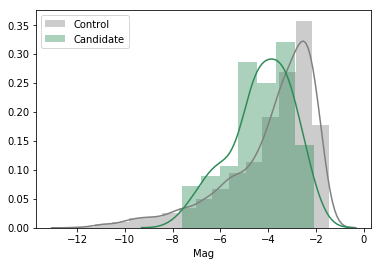

In [11]:
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

mag_all = -2.5*np.log10(Datacube.Tab_SE["FLUX_AUTO"])
ind_notv = np.setdiff1d(Datacube.Tab_SE["NUMBER"]-1, ind_v)
mag_ctrl = pd.Series(mag_all[ind_notv]).dropna()
# mag_cut = (np.percentile(mag_no_nan, 2.5), np.percentile(mag_no_nan, 97.5))


sns.distplot(mag_ctrl,label="Control",color="gray",bins=15)
mag_el = pd.Series(mag_all[ind_v])
mag_cut = mag_el.max()
print (mag_cut)
sns.distplot(mag_el,label="Candidate",color="seagreen")
# plt.axvline(mag_cut[0],color='k',ls='--')
# plt.axvline(mag_cut[1],color='k',ls='--')
plt.xlabel("Mag")
plt.legend()

In [12]:
Datacube.construct_control(Num_v=Num_v, mag_cut=(mag_el.min(),mag_el.max()), dist_cut=50, bootstraped=False)

Datacube.diff_angles_v = Datacube.diff_angles[ind_v]
Datacube.diff_centroids_v = Datacube.diff_centroids[ind_v]
Datacube.dist_clus_cens_v = Datacube.dist_clus_cens[ind_v]
import warnings
warnings.filterwarnings('ignore')

Isophotal area threshold:  13.0
Distance to field edge threshold:  50
Control Sample : n=1227


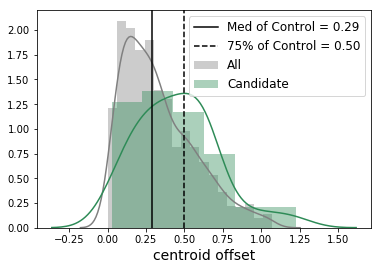

In [14]:
#ISO p (distortion corrected)
draw_centroid_offset(Datacube.diff_centroids_v, Datacube.diff_centroids_c, crit=[0.5,0.75])

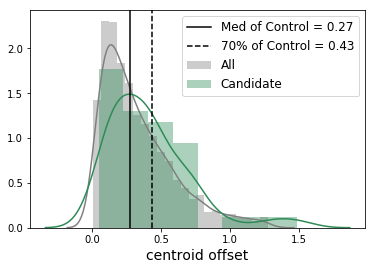

In [11]:
#APER p (distortion corrected)
draw_centroid_offset(Datacube.diff_centroids_v, Datacube.diff_centroids_c, crit=[0.5,0.7])

# of offset > 50% : 33
# of offset > 75% : 20


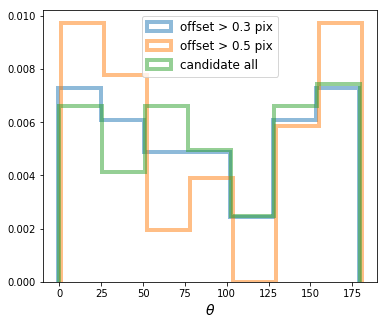

In [15]:
#ISO p (distortion corrected)
plt.figure(figsize=(6,5))
draw_angle_candidate(Datacube.diff_angles_v, Datacube.diff_centroids_v, Datacube.diff_centroids_c, crit=[0.5, 0.75], b=8)

# of offset > 50% : 30
# of offset > 70% : 18


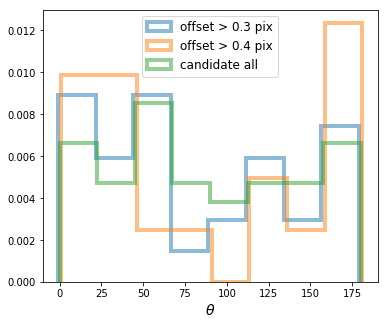

In [12]:
#APER p (distortion corrected)
plt.figure(figsize=(6,5))
draw_angle_candidate(Datacube.diff_angles_v, Datacube.diff_centroids_v, Datacube.diff_centroids_c, crit=[0.5, 0.7], b=9)

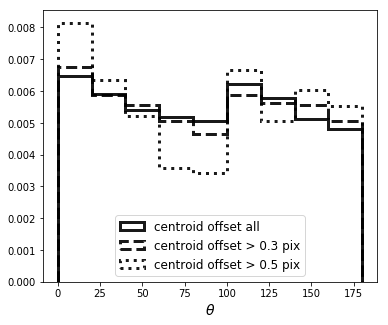

In [16]:
#ISO iter p (new CC)
plt.figure(figsize=(6,5))
draw_angle_control(Datacube.diff_angles_c,Datacube.diff_centroids_c, crit=[0.5,0.75],b=10)

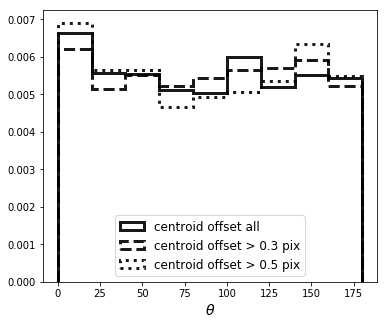

In [17]:
#APER iter p (new CC)
plt.figure(figsize=(6,5))
draw_angle_control(Datacube.diff_angles_c,Datacube.diff_centroids_c, crit=[0.5,0.75],b=10)

In [17]:
from scipy.stats import kstest,ks_2samp,norm, anderson_ksamp
#ISO iter p (new CC)
p = np.percentile(Datacube.diff_centroids_c,50)
q = np.percentile(Datacube.diff_centroids_c,75)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>p], Datacube.diff_angles_c[Datacube.diff_centroids_c>p]).pvalue)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>q], Datacube.diff_angles_c[Datacube.diff_centroids_c>q]).pvalue)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>p], Datacube.diff_angles_c).pvalue)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>q], Datacube.diff_angles_c).pvalue)

print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>p],Datacube.diff_angles_c[Datacube.diff_centroids_c>p]]))
print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>q],Datacube.diff_angles_c[Datacube.diff_centroids_c>q]]))
print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>p],Datacube.diff_angles_c]))
print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>q],Datacube.diff_angles_c]))

K-S: p-value=0.551
K-S: p-value=0.619
K-S: p-value=0.512
K-S: p-value=0.499
Anderson_ksampResult(statistic=-0.23851566968889742, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.44680815904120597)
Anderson_ksampResult(statistic=-0.42697254691306324, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.5453035431800698)
Anderson_ksampResult(statistic=-0.019939238376678933, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.3554298397018989)
Anderson_ksampResult(statistic=0.18535832202427127, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.2873289393369083)


In [14]:
from scipy.stats import kstest,ks_2samp,norm, anderson_ksamp
#APER iter p (new CC)
p = np.percentile(Datacube.diff_centroids_c,50)
q = np.percentile(Datacube.diff_centroids_c,75)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>p], Datacube.diff_angles_c[Datacube.diff_centroids_c>p]).pvalue)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>q], Datacube.diff_angles_c[Datacube.diff_centroids_c>q]).pvalue)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>p], Datacube.diff_angles_c).pvalue)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>q], Datacube.diff_angles_c).pvalue)

print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>p],Datacube.diff_angles_c[Datacube.diff_centroids_c>p]]))
print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>q],Datacube.diff_angles_c[Datacube.diff_centroids_c>q]]))
print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>p],Datacube.diff_angles_c]))
print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>q],Datacube.diff_angles_c]))

K-S: p-value=0.156
K-S: p-value=0.091
K-S: p-value=0.223
K-S: p-value=0.085
Anderson_ksampResult(statistic=0.04278155963816326, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.3329922720021404)
Anderson_ksampResult(statistic=0.6661024186611936, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.17607175379608234)
Anderson_ksampResult(statistic=-0.2986743231460777, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.47605165632915436)
Anderson_ksampResult(statistic=0.8295595014999784, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.1494617871367127)


In [18]:
import pandas as pd
df = pd.DataFrame({"diff_angle":np.concatenate([Datacube.diff_angles_v, Datacube.diff_angles_c]),
                 "diff_centroid":np.concatenate([Datacube.diff_centroids_v, Datacube.diff_centroids_c]),
                 "type":np.concatenate([['v']*len(Datacube.diff_centroids_v), ['c']*len(Datacube.diff_centroids_c)])})
df.to_csv('./A2390SE/centroid_analysis_A2390SE_iso.csv',sep=',',index=None)

In [13]:
import pandas as pd
coords = w.pixel_to_world(Datacube.Tab_SE["X_IMAGE"], Datacube.Tab_SE["Y_IMAGE"])
ind_v = Num_v-1
ind_c = Datacube.Num_c-1

inds_best_Ha = np.argmax(Datacube.CC_Rs_Temps['Ha-NII_gauss'], axis=1)
SNR_best_Ha = np.array([Datacube.CC_SNRs_Temps['Ha-NII_gauss'][i,j] for i,j in enumerate(inds_best_Ha)])
inds_best_Hb = np.argmax(Datacube.CC_Rs_Temps['Hb-OIII_gauss'], axis=1)
SNR_best_Hb = np.array([Datacube.CC_SNRs_Temps['Hb-OIII_gauss'][i,j] for i,j in enumerate(inds_best_Hb)])


df = pd.DataFrame({"ID":np.concatenate([ind_v + 1, Datacube.Num_c]),
                   "ra":np.concatenate([coords.ra[ind_v], coords.ra[ind_c]]),
                   "dec":np.concatenate([coords.dec[ind_v], coords.dec[ind_c]]),
                   "redshift":np.concatenate([Datacube.z_best[ind_v], Datacube.z_best[ind_c]]),
                   "SNR_Ha": np.concatenate([SNR_best_Ha[ind_v], SNR_best_Ha[ind_c]]),
                   "SNR_OIII": np.concatenate([SNR_best_Hb[ind_v], SNR_best_Hb[ind_c]]),
                   "dist_edge": np.concatenate([Datacube.dist_edge[ind_v], Datacube.dist_edge[ind_c]]),
                   "diff_angle":np.concatenate([Datacube.diff_angles_v, Datacube.diff_angles_c]),
                   "diff_centroid":np.concatenate([Datacube.diff_centroids_v, Datacube.diff_centroids_c]),
                   "type":np.concatenate([['v']*len(Datacube.diff_centroids_v), ['c']*len(Datacube.diff_centroids_c)])})
df.to_csv('./A2390SE/centroid_analysis_A2390SE_aper_all.csv',sep=',',index=None)

### Cross-match with Central Field

In [72]:
# Read flanking field
Datacube = Read_Datacube("/home/qliu/data/A2390F/A2390SE_cube.fits", name="A2390SE", z0=0.228, 
                         SE_catalog="./A2390SE/SE/A2390SE_run2.cat")

Datacube.pos_BCG = (2104.09836227, 2906.58511366)

w = WCS(Datacube.hdu[0].header, naxis=2)
Datacube.assign_BCG_coordinate((328.40351201,17.69544013))

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
INFO: 
             

In [73]:
# Convert pix to world for SE field
RAs, DECs = w.all_pix2world(Datacube.Tab_SE["X_IMAGE"], Datacube.Tab_SE["Y_IMAGE"], 1)
Coords = SkyCoord(RAs, DECs, frame='icrs', unit="deg")
Coords

<SkyCoord (ICRS): (ra, dec) in deg
    [(328.47188012, 17.46668761), (328.47074739, 17.46671921),
     (328.50147387, 17.45528587), ..., (328.53343407, 17.62480058),
     (328.46989142, 17.62292777), (328.42048388, 17.62165862)]>

In [74]:
# Read central field
Datacube_C = Read_Datacube("/home/qliu/data/A2390C_cube.fits", name="A390C", z0=0.228, 
                           SE_catalog="./A2390C/SE/A2390C_run3.cat")

id_BCG_C = np.argmin((Datacube_C.Tab_SE["X_IMAGE"]-980)**2 + (Datacube_C.Tab_SE["Y_IMAGE"]-1315)**2)
Datacube_C.assign_BCG_position(id_BCG=id_BCG_C)

w_C = WCS(Datacube_C.hdu[0].header, naxis=2)
ra_BCG_C, dec_BCG_C = w_C.all_pix2world(Datacube_C.pos_BCG[0], Datacube_C.pos_BCG[1], 1)
Datacube_C.assign_BCG_coordinate((ra_BCG_C,dec_BCG_C))

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
INFO: 
             

In [119]:
RAs_C, DECs_C = w_C.all_pix2world(Datacube_C.Tab_SE["X_IMAGE"], Datacube_C.Tab_SE["Y_IMAGE"], 1)
Coords_C = SkyCoord(RAs_C, DECs_C, frame='icrs', unit="deg")
Coords_C

<SkyCoord (ICRS): (ra, dec) in deg
    [(328.42967535, 17.64398462), (328.39814878, 17.59551301),
     (328.39921577, 17.59424771), ..., (328.39642645, 17.71354617),
     (328.43121103, 17.67202567), (328.4844344 , 17.75326277)]>

<Table length=7>
NUMBER EXT_NUMBER FLUX_ISO FLUXERR_ISO ... FLAGS ELONGATION CLASS_STAR
                     ct         ct     ...                            
int64    int64    float64    float64   ... int64  float64    float64  
------ ---------- -------- ----------- ... ----- ---------- ----------
    14          1 63.32879    10.83447 ...    16      1.394      0.013
   100          1 13.47228    5.012318 ...     0      1.274      0.014
   114          1 19.82572    6.067539 ...     0       1.58      0.295
   167          1 25.72945    6.930779 ...     0      1.412      0.003
   325          1  27.8835    7.192838 ...     0      1.224       0.02
   375          1 224.5494    20.26513 ...     0      1.568      0.029
   397          1 421.2461    27.70772 ...     0      1.556      0.029

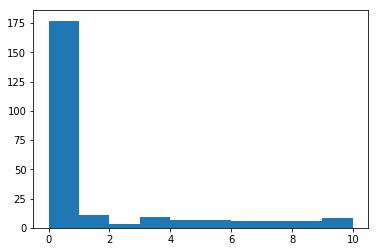

In [164]:
el_ls_C_v = glob.glob("./A2390C/fig/candidate_v3/visual/*.png")
Num_C_v = np.sort(np.array([re.compile(r'\d+').findall(el)[-1] for el in el_ls_C_v]).astype("int"))

# Match two catalogs
idx, d2d, d3d = Coords.match_to_catalog_sky(Coords_C)
plt.hist(d2d.to(u.arcsec).value, range=[0,10])

Num_C_match = Datacube_C.Tab_SE["NUMBER"][idx[d2d<2*u.arcsec]]
Num_C_v_match = np.intersect1d(Num_C_match, Num_C_v)
Tab_match_C = Datacube_C.Tab_SE[Num_C_match-1]
Tab_match_C_v = Datacube_C.Tab_SE[Num_C_v_match-1]
Tab_match_C_v

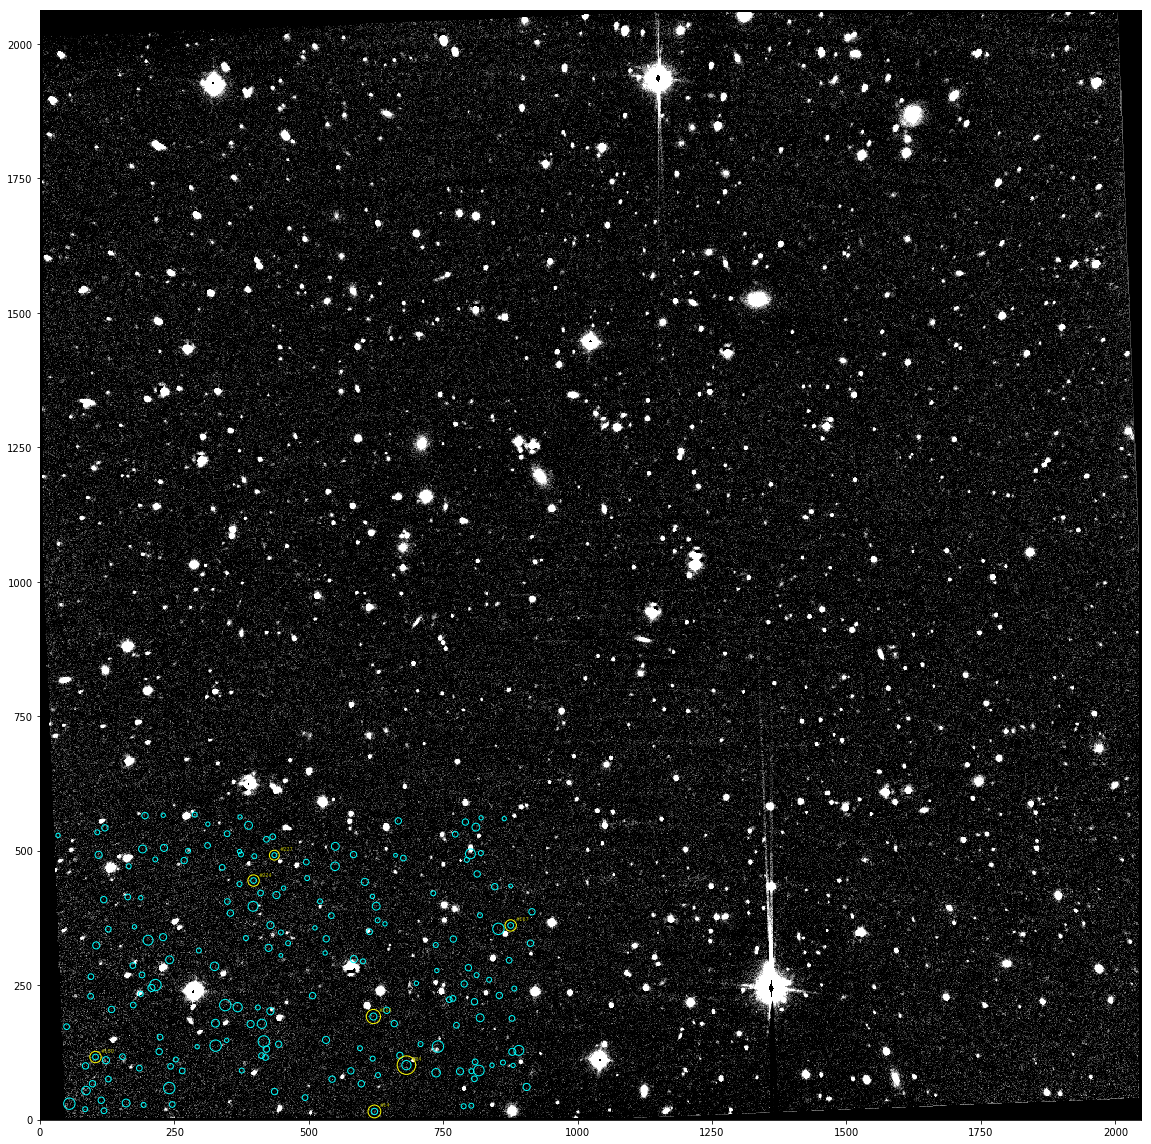

In [165]:
import pyregion
region_str = "\n".join(["circle(%.4f,%.4f,%.1f)"%(gal["X_IMAGE"],gal["Y_IMAGE"], gal["PETRO_RADIUS"]) for gal in Tab_match_C])
region_str = "# Region file format: DS9 version 4.1\nglobal color=cyan dashlist=8 3 width=1\nimage\n"+region_str
regs = pyregion.parse(region_str)


region_str_v = "\n".join(["circle(%.4f,%.4f,%.1f)"%(gal["X_IMAGE"],gal["Y_IMAGE"], 2*gal["PETRO_RADIUS"]) for gal in Tab_match_C_v])
region_str_v = "# Region file format: DS9 version 4.1\nglobal color=yellow dashlist=8 3 width=1\nimage\n"+region_str_v
regs_v = pyregion.parse(region_str_v)

hdu_field = fits.open('/home/qliu/Desktop/Cluster/A2390C/SE/A2390C_stack.fits')
stack_field = hdu_field[0].data
plt.figure(figsize=(16,16))
ax = plt.subplot(111)
ax.imshow(stack_field,vmin=0.001,vmax=1,origin="lower",cmap="gray")

patch_list, artist_list = regs.get_mpl_patches_texts()
for p in patch_list:
    ax.add_patch(p)
    
patch_list, artist_list = regs_v.get_mpl_patches_texts()
for p in patch_list:
    ax.add_patch(p)

Pos_C_v = np.array([(x,y) for (x,y) in zip(Tab_match_C_v["X_IMAGE"], Tab_match_C_v["Y_IMAGE"])])
for num, pos in zip(Num_C_v, Pos_C_v):
    ax.text(pos[0]+8, pos[1]+8, "#%d"%num, color="y", fontsize=5, alpha=1.0, zorder=3)
    
plt.tight_layout()
plt.savefig("/home/qliu/Pictures/cross_match-C.pdf",dpi=250)

##### Find Number in SE field that appeared in C field

<Table length=5>
NUMBER EXT_NUMBER FLUX_ISO FLUXERR_ISO ... FLAGS ELONGATION CLASS_STAR
                     ct         ct     ...                            
int64    int64    float64    float64   ... int64  float64    float64  
------ ---------- -------- ----------- ... ----- ---------- ----------
  1175          1 726.6119    36.39463 ...     2       1.28      0.029
  1243          1 31.84675    7.693866 ...     0      1.201       0.03
  1400          1 28.48849    7.292747 ...     0      1.659      0.001
  1602          1  77.1268    11.90831 ...     0       1.37      0.019
  2130          1 566.0417    32.09708 ...     0      1.318      0.029

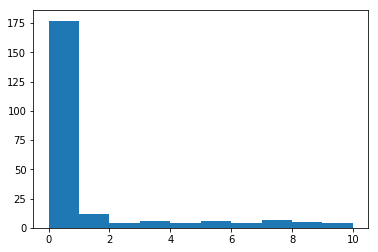

In [159]:
# Match two catalogs
idx, d2d, d3d = Coords_C.match_to_catalog_sky(Coords)
plt.hist(d2d.to(u.arcsec).value, range=[0,10],bins=10)

Num_match = Datacube.Tab_SE["NUMBER"][idx]
Num_v_match = np.intersect1d(Num_match[d2d<2*u.arcsec], Num_v)
Tab_v = Datacube.Tab_SE[Num_v-1]

ind_match = Num_v_match-1
Tab_match = Datacube.Tab_SE[ind_match]
Tab_match

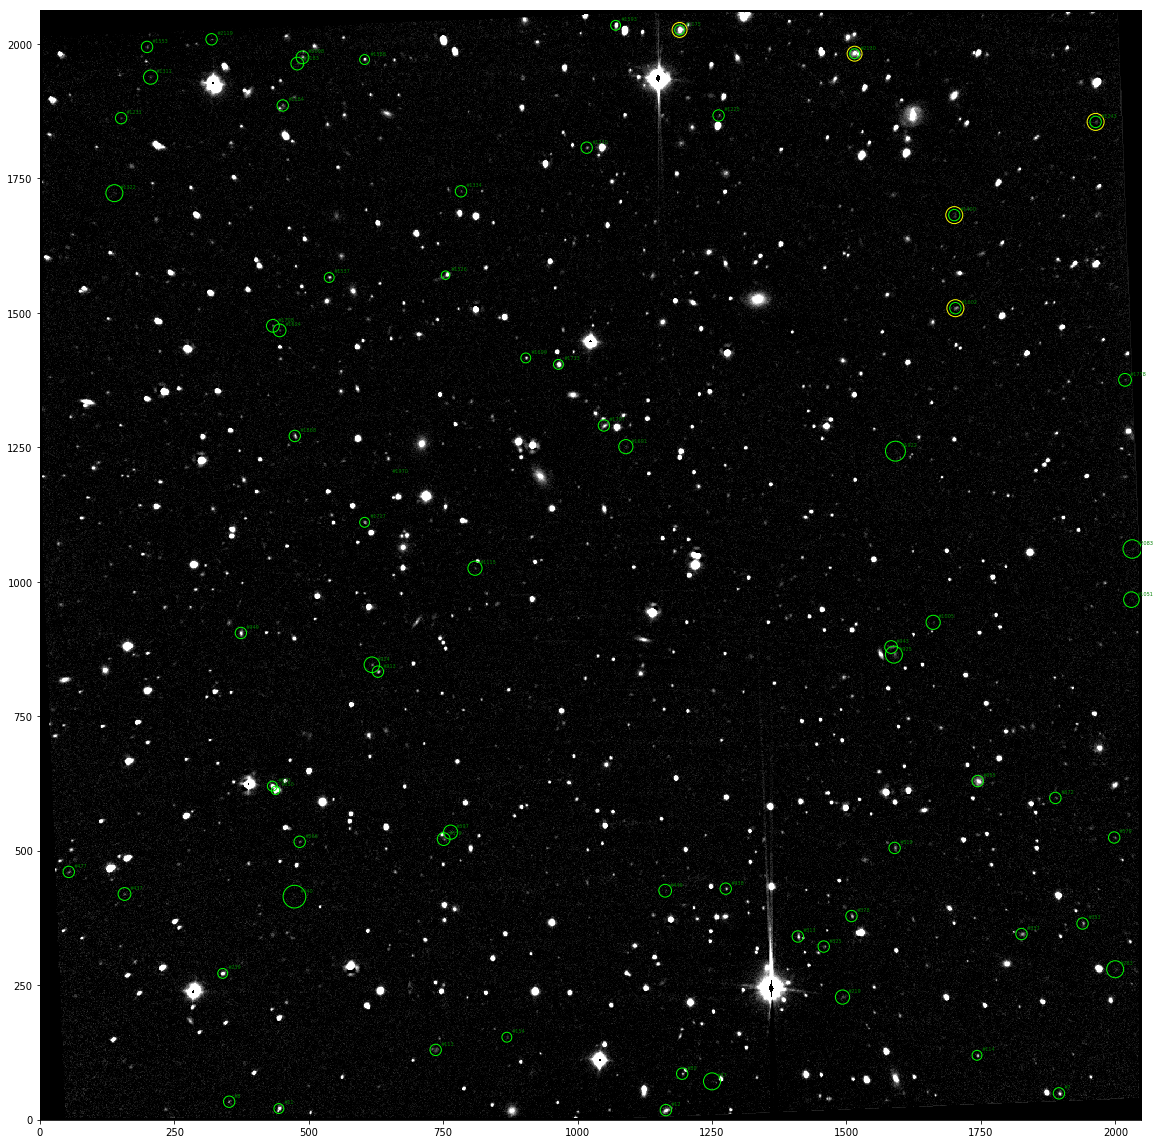

In [163]:
import pyregion
region_str = "\n".join(["circle(%.4f,%.4f,%.1f)"%(gal["X_IMAGE"],gal["Y_IMAGE"], 3*gal["PETRO_RADIUS"]) for gal in Tab_match])
region_str = "# Region file format: DS9 version 4.1\nglobal color=yellow dashlist=8 3 width=1\nimage\n"+region_str
regs = pyregion.parse(region_str)


region_str_v = "\n".join(["circle(%.4f,%.4f,%.1f)"%(gal["X_IMAGE"],gal["Y_IMAGE"], 2*gal["PETRO_RADIUS"]) for gal in Tab_v])
region_str_v = "# Region file format: DS9 version 4.1\nglobal color=green dashlist=8 3 width=1\nimage\n"+region_str_v
regs_v = pyregion.parse(region_str_v)

hdu_field = fits.open('/home/qliu/Desktop/Cluster/A2390SE/SE/A2390SE_stack.fits')
stack_field = hdu_field[0].data

plt.figure(figsize=(16,16))
ax = plt.subplot(111)
ax.imshow(stack_field,vmin=0.001,vmax=3,origin="lower",cmap="gray")

patch_list, artist_list = regs.get_mpl_patches_texts()
for p in patch_list:
    ax.add_patch(p)
    
patch_list, artist_list = regs_v.get_mpl_patches_texts()
for p in patch_list:
    ax.add_patch(p)
    
Pos_v = np.array([(x,y) for (x,y) in zip(Tab_v["X_IMAGE"], Tab_v["Y_IMAGE"])])
for num, pos in zip(Num_v, Pos_v):
    ax.text(pos[0]+8, pos[1]+8, "#%d"%num, color="green", fontsize=5, alpha=1.0, zorder=3)
    
plt.tight_layout()
plt.savefig("/home/qliu/Pictures/cross_match-SE.pdf",dpi=250)